In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mp_api.client import MPRester
from emmet.core.summary import HasProps

sns.set_theme()

In [23]:
with MPRester('oPsLWq6IqZdF9mRNMhRHH7M5gl622DXk') as mpr:
    data = mpr.summary.search(
        has_props=[HasProps.elasticity],
        fields=[
            'material_id',
            'k_reuss',
            'k_voigt',
            'k_vrh',
            'g_vrh',
            'universal_anisotropy',
            'homogeneous_poisson',
            'theoretical'
        ]
    )
    
df = pd.DataFrame([d.dict() for d in data])

df.drop(df[df.theoretical == True].index, inplace=True)
df.drop(df[(df.k_voigt < 0) | (df.k_reuss < 0) | (df.k_vrh < 0)].index, inplace=True)
df.drop(columns=['fields_not_requested', 'theoretical'], inplace=True)
df.dropna()
display(df)

Retrieving SummaryDoc documents:   0%|          | 0/7108 [00:00<?, ?it/s]

,material_id,k_voigt,k_reuss,k_vrh,g_vrh,universal_anisotropy,homogeneous_poisson
0,mp-5784,53.780124,52.594577,53.187351,27.689745,0.493929,0.278188
1,mp-23004,13.854623,12.956739,13.405681,5.178690,6.485755,0.328882
2,mp-4681,88.850213,83.266084,86.058148,51.428591,0.854911,0.250833
4,mp-555064,54.364652,32.837697,43.601175,22.561731,4.615468,0.279333
6,mp-19120,68.012520,60.267673,64.140096,41.398371,0.356484,0.234420
...,...,...,...,...,...,...,...
7099,mp-1434,50.407818,3.076246,26.742032,17.918263,140.406540,0.226144
7100,mp-8192,22.148892,21.062368,21.605630,9.558323,1.295264,0.307228
7101,mp-27545,79.026593,71.008980,75.017787,50.950662,0.736275,0.223098
7102,mp-30536,89.581167,89.028191,89.304679,53.261847,0.941901,0.251249


In [24]:
m_id = ','.join(df.material_id)

with MPRester('oPsLWq6IqZdF9mRNMhRHH7M5gl622DXk') as mpr:
    data = mpr.materials.search(material_ids=m_id, fields=['material_id', 'symmetry'])

ma = pd.DataFrame([d.dict() for d in data])

ma.drop(columns=['fields_not_requested'], inplace=True)
ma.dropna()

ma['crystal_system'] = [s['crystal_system'] for s in ma.symmetry]
ma.drop(columns=['symmetry'], inplace=True)

Retrieving MaterialsDoc documents:   0%|          | 0/4919 [00:00<?, ?it/s]

In [25]:
df = pd.merge(df, ma, on='material_id', how='left')

df.drop(df[(df.crystal_system == 'Trigonal') | (df.crystal_system == 'Triclinic')].index, inplace=True)
display(df)

,material_id,k_voigt,k_reuss,k_vrh,g_vrh,universal_anisotropy,homogeneous_poisson,crystal_system
0,mp-5784,53.780124,52.594577,53.187351,27.689745,0.493929,0.278188,Orthorhombic
1,mp-23004,13.854623,12.956739,13.405681,5.178690,6.485755,0.328882,Hexagonal
2,mp-4681,88.850213,83.266084,86.058148,51.428591,0.854911,0.250833,Orthorhombic
3,mp-555064,54.364652,32.837697,43.601175,22.561731,4.615468,0.279333,Monoclinic
4,mp-19120,68.012520,60.267673,64.140096,41.398371,0.356484,0.234420,Orthorhombic
...,...,...,...,...,...,...,...,...
4912,mp-13089,45.747872,45.730010,45.738941,19.919412,0.747586,0.309852,Orthorhombic
4913,mp-11869,122.433872,122.433872,122.433872,57.654809,0.179926,0.296492,Cubic
4916,mp-27545,79.026593,71.008980,75.017787,50.950662,0.736275,0.223098,Monoclinic
4917,mp-30536,89.581167,89.028191,89.304679,53.261847,0.941901,0.251249,Tetragonal


In [20]:
%%time

# substrates = []

# with MPRester('oPsLWq6IqZdF9mRNMhRHH7M5gl622DXk') as mpr:
#     for mp in df.material_id:
#         area = []
#         energy = []
#         for substrate in mpr.substrates.search(film_id=mp, fields=['area', 'energy']):
#             if ('area' in substrate.fields_not_requested) | ('energy' in substrate.fields_not_requested):
#                 break
#             area.append(substrate.area)
#             energy.append(substrate.energy)
#         substrates.append({'material_id': mp, 'area': np.average(np.array(area)), 'energy': np.average(np.array(energy))})

mps = df.material_id.truncate(after=20)

with MPRester('oPsLWq6IqZdF9mRNMhRHH7M5gl622DXk') as mpr:
    for mp in mps:
        for s in mpr.substrates.search(film_id=mp, fields=['area', 'energy']):
            display(s)

Retrieving SubstratesDoc documents:   0%|          | 0/184 [00:00<?, ?it/s]

MPDataDoc<SubstratesDoc>(
area=138.39986018680202,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=347.2283252408728,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=152.11911156942503,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=138.39986018680202,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=157.83105692766944,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.96347969873722,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=88.2662634785992,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=88.2662634785992,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=54.79327461962744,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=31.56621138553389,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=176.5325269571984,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=138.39986018680202,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.96347969873725,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=138.39986018680202,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=284.095902469805,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=138.39986018680202,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.96347969873725,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.96347969873725,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=284.095902469805,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=54.79327461962744,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=88.2662634785992,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=94.69863415660167,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=264.7987904357976,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=273.9663730981372,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.96347969873725,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.96347969873727,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=264.7987904357976,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=264.7987904357976,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=138.39986018680202,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=273.9663730981372,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.96347969873725,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.96347969873725,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=284.095902469805,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=284.095902469805,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=207.59979028020305,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=138.39986018680202,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=273.9663730981372,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=219.17309847850976,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=264.7987904357976,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.96347969873725,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=76.05955578471251,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=63.23550145905477,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.96347969873725,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=252.52969108427112,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=228.1786673541376,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=252.52969108427112,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=157.83105692766944,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=207.59979028020305,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=264.7987904357976,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=252.52969108427112,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=284.095902469805,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=219.17309847850976,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=304.23822313885006,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=157.83105692766944,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=284.095902469805,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=207.59979028020305,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=157.83105692766944,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=54.79327461962744,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=264.7987904357976,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=189.7065043771643,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=252.52969108427112,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=94.69863415660167,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=76.05955578471251,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=273.9663730981372,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=252.52969108427112,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=157.83105692766944,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=219.17309847850976,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=138.39986018680202,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=152.11911156942503,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=138.39986018680202,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=157.83105692766944,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=252.52969108427112,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=219.17309847850976,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.96347969873725,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=157.83105692766944,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=207.59979028020305,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=281.2227421944878,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=88.2662634785992,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=126.26484554213556,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=281.2227421944878,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=347.2283252408729,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=54.79327461962744,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=164.37982385888233,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=347.2283252408729,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.96347969873725,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=304.2382231388502,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=157.83105692766944,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=94.69863415660167,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=69.19993009340101,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=54.79327461962744,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=281.2227421944878,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=88.2662634785992,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=347.2283252408729,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=164.37982385888233,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=264.7987904357976,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=281.2227421944878,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=276.7997203736041,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=273.9663730981372,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.96347969873725,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=157.83105692766944,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=276.79972037360403,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=189.39726831320334,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=264.7987904357976,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=138.39986018680202,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=284.0959024698049,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=284.095902469805,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=273.9663730981372,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=94.69863415660167,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=189.39726831320334,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=189.39726831320334,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=88.2662634785992,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=219.17309847850976,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=94.69863415660167,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=252.52969108427118,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=207.59979028020305,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=264.7987904357976,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=157.83105692766944,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=157.83105692766944,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=228.17866735413762,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=252.52969108427112,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=152.11911156942503,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=152.11911156942503,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=207.59979028020305,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=228.17866735413762,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.96347969873725,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=63.13242277106778,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=252.52969108427118,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=252.52969108427118,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=252.52969108427112,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=252.52969108427112,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=328.75964771776466,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=76.05955578471251,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=152.11911156942503,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=304.23822313885006,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=176.5325269571984,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=76.05955578471251,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=304.23822313885006,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=228.1786673541376,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=152.11911156942503,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=304.23822313885006,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=157.83105692766944,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=207.59979028020305,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=228.17866735413762,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=164.37982385888233,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=76.05955578471251,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=347.2283252408729,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=252.52969108427112,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=273.9663730981372,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=189.39726831320334,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=252.52969108427112,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=219.17309847850976,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=252.52969108427118,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=264.7987904357976,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=252.52969108427112,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=304.2382231388502,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=281.2227421944878,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=94.69863415660167,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.96347969873725,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=157.83105692766944,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=328.7596477177648,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=347.2283252408729,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=157.83105692766944,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=207.59979028020305,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=252.52969108427112,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=126.26484554213556,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.96347969873725,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=189.3972683132034,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=273.9663730981372,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=273.9663730981372,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=207.59979028020305,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=31.56621138553389,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=273.9663730981372,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=207.59979028020308,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=264.7987904357976,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=69.19993009340101,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=284.095902469805,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=264.7987904357976,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=189.39726831320334,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=315.6621138553388,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=315.6621138553389,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=157.83105692766944,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=264.7987904357976,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=315.6621138553389,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=284.095902469805,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

Retrieving SubstratesDoc documents:   0%|          | 0/137 [00:00<?, ?it/s]

MPDataDoc<SubstratesDoc>(
area=142.7888429776704,
energy=3.0518339888268703e-07,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=47.5962809925568,
energy=1.395772982110158e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=142.7888429776704,
energy=2.1141541821477256e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=92.95229764973193,
energy=2.222828591305972e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=278.8568929491958,
energy=2.3303908888654302e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=280.5521854091699,
energy=4.200197748679152e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=133.04793683351147,
energy=4.318236281874398e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=278.85689294919575,
energy=7.587886473426939e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=190.3851239702272,
energy=8.309865073769376e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=333.17396694789767,
energy=8.588635875051176e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=199.57190525026718,
energy=8.692740540479559e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=232.38074412432982,
energy=9.101802736344171e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=139.4284464745979,
energy=9.19785628887786e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=232.38074412432982,
energy=9.34831514466246e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=278.85689294919575,
energy=1.0031085486216788e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=325.3330417740618,
energy=1.520297705039423e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=333.17396694789767,
energy=1.5719063858265236e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=332.6198420837786,
energy=1.6121368518634828e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=280.5521854091699,
energy=1.916519312006627e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=325.3330417740617,
energy=2.1584408195204758e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=333.17396694789767,
energy=2.169556621721628e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=325.3330417740618,
energy=2.4081217519228746e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=325.3330417740618,
energy=2.4141095028600723e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=232.38074412432982,
energy=2.9904866518483727e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=280.5521854091699,
energy=3.18299635203117e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=232.3807441243298,
energy=3.399703647995155e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=232.38074412432982,
energy=3.411764733079783e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=46.476148824865966,
energy=3.7849917086189185e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=190.3851239702272,
energy=3.845496581096767e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=232.38074412432982,
energy=3.9117671370750645e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=332.6198420837786,
energy=4.950193746576691e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=241.49715331440126,
energy=5.456369065327107e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=280.5521854091699,
energy=5.559107803651558e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=142.7888429776704,
energy=5.59097566061568e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=325.33304177406177,
energy=5.706857424630097e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=325.3330417740618,
energy=6.00747227964393e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=232.38074412432982,
energy=6.359645777183931e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=333.17396694789767,
energy=7.070052025620613e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=160.99810220960083,
energy=7.277393088540281e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=199.57190525026718,
energy=7.923851547591112e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=232.38074412432982,
energy=7.937882243506649e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=280.5521854091699,
energy=7.955500245057889e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=190.3851239702272,
energy=8.559965544070877e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=232.38074412432982,
energy=8.612692303833487e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=232.3807441243298,
energy=8.875072393711296e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=199.57190525026718,
energy=8.929606274412167e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=280.5521854091699,
energy=8.994799602859952e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=266.09587366702294,
energy=9.04125634568897e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=232.38074412432982,
energy=9.245822385393856e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=266.09587366702294,
energy=9.336055606428639e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=232.38074412432982,
energy=9.413318537741893e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=80.49905110480042,
energy=9.481448869227288e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=232.38074412432982,
energy=9.677856436413065e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=160.99810220960083,
energy=9.898183345197057e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=266.09587366702294,
energy=9.928974129809544e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=325.3330417740618,
energy=0.00010612143952051033,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=160.99810220960083,
energy=0.00011019544118062163,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=325.33304177406177,
energy=0.00011037593996304235,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=187.03479027277993,
energy=0.00011053964889017409,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=237.98140496278396,
energy=0.00011092588075689421,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=266.09587366702294,
energy=0.00011553980866543212,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=139.4284464745979,
energy=0.0001173028777150497,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=266.09587366702294,
energy=0.00011867393496288129,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=325.3330417740618,
energy=0.00012044681267438287,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=237.98140496278398,
energy=0.00012194683075568915,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=333.1739669478976,
energy=0.00012244327348954332,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=232.38074412432982,
energy=0.00012304844010408296,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=160.99810220960083,
energy=0.00012387913792007236,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=266.09587366702294,
energy=0.00012389905277283546,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=325.3330417740618,
energy=0.00012590459834618982,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=333.17396694789767,
energy=0.00013256512850255933,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=142.7888429776704,
energy=0.00013553135786043666,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=139.4284464745979,
energy=0.00013928299120704397,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=325.3330417740618,
energy=0.00014236722573765368,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=190.3851239702272,
energy=0.00014259155503018754,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=190.3851239702272,
energy=0.00014275551172768144,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=139.4284464745979,
energy=0.0001462398845874184,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=139.4284464745979,
energy=0.0001466520517875962,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=232.38074412432982,
energy=0.00015336280474066325,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=160.99810220960083,
energy=0.0001545394565551394,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=232.38074412432982,
energy=0.00015548081532673708,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=325.3330417740617,
energy=0.0001567510309804657,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=241.49715331440123,
energy=0.00016024860790047384,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=232.38074412432982,
energy=0.00016045741798082123,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=160.99810220960083,
energy=0.00016229788889060272,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=80.49905110480042,
energy=0.0001625026867565593,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=160.99810220960083,
energy=0.00016281217934665395,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=160.99810220960083,
energy=0.00016371080017640464,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=278.85689294919575,
energy=0.00016599255209132758,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=190.3851239702272,
energy=0.00016923587781609206,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=160.99810220960083,
energy=0.0001721978708881138,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=190.3851239702272,
energy=0.00017221569997438545,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=266.09587366702294,
energy=0.00017415308364808057,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=325.3330417740618,
energy=0.00017601391034381602,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=190.3851239702272,
energy=0.00017676724579170604,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=160.99810220960083,
energy=0.0001784132524827765,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=80.49905110480042,
energy=0.00018300269174663765,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=280.55218540916985,
energy=0.0001859138432191808,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=333.1739669478976,
energy=0.00018825304931065632,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=160.99810220960083,
energy=0.0001883043726051799,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=266.09587366702294,
energy=0.0001918826100473611,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=199.57190525026718,
energy=0.00019341011383312853,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=185.90459529946386,
energy=0.00019556200409088278,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=199.57190525026718,
energy=0.00019864027544504878,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=280.5521854091699,
energy=0.00020060598552054323,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=185.90459529946386,
energy=0.00020150139147241626,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=266.09587366702294,
energy=0.00020289377055903926,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=325.3330417740617,
energy=0.0002078502464282961,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=46.476148824865966,
energy=0.00021285848226883824,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=190.3851239702272,
energy=0.00021595040030200342,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=333.17396694789767,
energy=0.0002162816161300868,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=325.3330417740618,
energy=0.00021716712970801165,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=142.7888429776704,
energy=0.00021739757793105317,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=333.1739669478976,
energy=0.00023020658699441482,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=333.17396694789767,
energy=0.00023116598376531034,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=325.3330417740617,
energy=0.00023401155718213046,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=232.38074412432982,
energy=0.0002439198297850205,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=325.3330417740618,
energy=0.00026264141370540905,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=190.3851239702272,
energy=0.00026287686371921073,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=237.98140496278396,
energy=0.00026478455266803813,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=160.99810220960083,
energy=0.0002667941723385785,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=232.38074412432982,
energy=0.0002702850070950469,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=190.3851239702272,
energy=0.0002769175685489589,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=47.5962809925568,
energy=0.00028358594406656016,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=325.33304177406177,
energy=0.0002850296169442497,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=160.99810220960083,
energy=0.0003020618325266322,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=333.1739669478976,
energy=0.0003582996866859109,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=139.42844647459788,
energy=0.00035846148597034065,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=160.99810220960083,
energy=0.00036540723213002987,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=232.38074412432982,
energy=0.00038767846454978874,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=190.3851239702272,
energy=0.0004090280400372596,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=160.99810220960083,
energy=0.00041190276540544314,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=185.90459529946386,
energy=0.00041579710734832357,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=139.4284464745979,
energy=0.0004384222973441351,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=190.3851239702272,
energy=0.000441987430946501,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=46.476148824865966,
energy=0.0004463231350357587,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=190.3851239702272,
energy=0.00048501385317576876,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

Retrieving SubstratesDoc documents:   0%|          | 0/219 [00:00<?, ?it/s]

MPDataDoc<SubstratesDoc>(
area=256.2327709200148,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=44.088037742621246,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=54.494202315047886,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=44.088037742621246,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=32.02909636500185,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=288.26186728501665,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=176.35215097048498,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=326.96521389028726,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=160.14548182500926,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=32.02909636500185,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=352.70430194096997,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=160.14548182500926,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=54.494202315047886,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=308.61626419834874,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=217.97680926019154,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=44.088037742621246,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=219.93702954259385,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=160.14548182500926,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=160.14548182500926,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=308.61626419834874,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=140.95422848919478,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.44018871310624,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=44.088037742621246,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=32.02909636500185,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=274.9212869282423,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=54.494202315047886,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=192.17457819001106,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=224.20367455501295,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=54.494202315047886,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=32.02909636500185,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=96.08728909500556,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=272.4710115752394,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=217.97680926019154,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=308.61626419834874,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=108.98840463009577,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=108.98840463009577,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=268.1540595749687,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=256.2327709200148,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=89.38468652498956,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=88.17607548524249,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=140.95422848919478,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=32.02909636500185,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=54.494202315047886,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=134.07702978748435,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=140.95422848919478,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=160.14548182500926,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.44018871310624,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=308.61626419834874,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=108.98840463009577,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=211.43134273379218,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=140.95422848919478,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=44.088037742621246,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=32.02909636500185,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=264.52822645572746,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=160.14548182500926,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=88.17607548524249,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=96.08728909500556,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=251.1146548742214,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=352.3200600150203,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=251.1146548742214,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=108.98840463009577,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=176.35215097048498,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=192.17457819001112,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=256.23277092001484,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=308.61626419834874,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=62.77866371855535,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=281.90845697838955,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=288.2618672850167,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=326.96521389028726,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=128.11638546000742,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=44.088037742621246,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=32.02909636500185,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=44.088037742621246,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=88.17607548524249,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=272.4710115752394,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=288.2618672850167,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=32.02909636500185,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=62.77866371855535,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=288.26186728501665,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=288.26186728501665,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=352.3200600150203,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=224.20367455501295,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=32.02909636500185,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=132.26411322786373,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=132.26411322786373,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=44.088037742621246,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=32.02909636500185,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=281.9084569783895,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=329.9055443138908,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=352.70430194096997,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=160.14548182500926,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=160.14548182500926,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.44018871310624,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=44.088037742621246,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=352.70430194096997,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=44.088037742621246,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=96.08728909500556,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=160.14548182500926,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=96.08728909500556,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=281.90845697838955,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=140.95422848919478,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=251.1146548742214,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=125.5573274371107,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=32.02909636500185,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=219.93702954259385,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=160.14548182500926,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=44.69234326249478,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=211.43134273379218,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=192.17457819001112,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=251.1146548742214,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=256.2327709200148,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=160.14548182500926,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=288.26186728501665,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=160.14548182500926,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=54.494202315047886,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=256.2327709200148,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=274.9212869282423,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=352.3200600150203,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=160.14548182500926,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=160.14548182500926,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.44018871310624,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=308.61626419834874,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=352.32006001502043,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=44.088037742621246,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=108.98840463009577,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=308.6162641983487,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=308.6162641983487,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=108.98840463009577,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=96.08728909500554,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=272.4710115752394,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=312.8464028374635,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=217.97680926019154,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=211.43134273379218,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=64.0581927300037,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=62.77866371855535,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=32.02909636500185,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=54.494202315047886,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=128.1163854600074,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=264.52822645572746,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=140.95422848919478,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=54.98425738564846,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=54.494202315047886,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=217.97680926019154,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=288.26186728501665,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=96.08728909500556,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=160.14548182500926,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=274.9212869282423,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=160.14548182500926,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=62.77866371855535,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=326.9652138902873,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=224.20367455501295,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=288.26186728501665,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=96.08728909500556,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=108.98840463009577,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=264.52822645572746,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=272.4710115752394,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=32.02909636500185,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=44.088037742621246,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=219.93702954259385,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=44.088037742621246,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=62.77866371855535,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=164.9527721569454,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=54.494202315047886,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=326.96521389028726,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=62.77866371855535,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=288.26186728501665,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=163.48260694514363,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=54.494202315047886,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=160.14548182500926,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=44.088037742621246,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=352.70430194096997,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=224.20367455501295,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=288.26186728501665,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=62.77866371855535,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=326.96521389028726,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=54.494202315047886,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=352.70430194096997,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=44.088037742621246,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=64.0581927300037,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=128.11638546000742,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=272.4710115752394,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=32.02909636500185,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=281.90845697838955,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=188.33599115566605,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=160.14548182500926,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=62.77866371855535,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=320.2909636500185,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=160.14548182500926,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=192.1745781900111,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=160.14548182500926,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=308.61626419834874,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=70.47711424459739,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=70.47711424459739,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=44.088037742621246,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=160.14548182500926,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=125.5573274371107,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=128.1163854600074,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=251.1146548742214,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=160.14548182500926,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=288.26186728501665,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=251.1146548742214,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=188.33599115566605,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=96.08728909500556,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=288.26186728501665,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=88.17607548524249,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=62.77866371855535,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=192.17457819001112,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=217.97680926019154,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=128.1163854600074,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=88.17607548524249,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=88.17607548524249,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=108.98840463009577,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=308.61626419834874,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=308.61626419834874,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=54.494202315047886,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.44018871310624,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=163.48260694514366,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=352.3200600150203,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=160.14548182500926,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

Retrieving SubstratesDoc documents:   0%|          | 0/253 [00:00<?, ?it/s]

MPDataDoc<SubstratesDoc>(
area=237.44487758273885,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=142.40942767748982,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=144.9009655830083,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=71.20471383874491,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=106.80707075811736,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=338.1022530270193,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=228.42044355600652,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=249.21649843560718,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=249.21649843560718,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=59.361219395684714,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=59.361219395684714,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=178.01178459686227,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=203.2297438276253,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=106.80707075811736,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=142.40942767748982,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=142.40942767748982,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=142.40942767748982,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=296.80609697842357,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=127.8525830922997,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=194.8463989235676,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=144.9009655830083,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=178.01178459686227,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=178.01178459686227,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=193.20128744401103,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=178.01178459686227,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=213.61414151623472,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=178.01178459686227,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=144.9009655830083,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=142.40942767748982,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=162.37199910297298,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=319.7886209784092,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=35.602356919372454,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=118.72243879136943,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=35.602356919372454,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=59.361219395684714,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=255.7051661845994,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=106.80707075811736,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=127.8525830922997,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=96.60064372200551,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=106.80707075811736,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=296.80609697842357,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=249.21649843560718,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=284.81885535497963,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=228.48253852196584,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=59.361219395684714,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=106.80707075811736,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=241.5016093050138,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=270.972991770167,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=127.8525830922997,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=127.8525830922997,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=129.8975992823784,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=287.6683119576743,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=95.88943731922477,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=237.44487758273885,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=178.01178459686227,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=106.80707075811736,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=287.6683119576743,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=223.74202041152444,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=59.361219395684714,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=241.50160930501377,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=237.44487758273885,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=338.1022530270193,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=127.8525830922997,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=223.74202041152446,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=178.08365818705417,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=184.17295859576814,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=351.59460350382415,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=106.80707075811736,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=255.7051661845994,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=287.66831195767435,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=106.80707075811736,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=95.88943731922477,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=178.01178459686227,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=95.88943731922477,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=130.56145058398047,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=255.7051661845994,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=142.40942767748982,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=106.80707075811736,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=138.12971894682613,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=35.602356919372454,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=163.20181322997558,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=320.4212122743521,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=191.77887463844957,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=320.4212122743521,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=144.9009655830083,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=287.66831195767435,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=230.21619824471017,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=178.01178459686227,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=193.20128744401103,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=241.50160930501377,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=296.80609697842357,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=351.59460350382415,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=163.20181322997558,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=59.361219395684714,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=351.59460350382415,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=162.371999102973,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=326.40362645995106,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=142.40942767748982,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=35.602356919372454,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=35.602356919372454,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=351.59460350382403,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=274.1045322672079,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=296.80609697842357,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=178.01178459686227,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=162.37199910297298,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=296.80609697842357,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=261.1229011679609,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=249.21649843560718,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=178.01178459686227,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=293.76326381395614,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=320.4212122743521,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=228.4825385219658,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=296.80609697842357,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=191.77887463844954,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=223.74202041152446,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=191.77887463844954,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=178.01178459686227,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=195.84217587597075,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=118.72243879136943,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=270.9729917701671,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=182.73635484480522,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=127.8525830922997,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=228.4825385219658,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=106.80707075811736,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=359.04398910594614,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=144.9009655830083,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=127.8525830922997,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=320.4212122743521,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=127.8525830922997,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=228.48253852196584,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=320.4212122743521,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=182.73635484480525,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=259.7951985647568,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=191.77887463844957,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=227.32079874416218,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=213.61414151623472,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=191.77887463844957,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=292.26959838535146,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=319.788620978409,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=129.8975992823784,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=142.40942767748982,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=319.788620978409,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=284.81885535497963,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=137.05226613360395,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=227.32079874416218,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=319.788620978409,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=270.9729917701671,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=249.21649843560718,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=130.56145058398047,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=255.7051661845994,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=127.8525830922997,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=203.2297438276253,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=296.80609697842357,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=193.20128744401103,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=319.78862097840926,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=237.44487758273885,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=359.0439891059463,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=127.8525830922997,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=338.1022530270193,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=227.32079874416218,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=296.80609697842357,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=359.04398910594614,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=127.8525830922997,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=163.20181322997558,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=195.84217587597078,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=137.05226613360392,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=59.361219395684714,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=255.7051661845994,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=223.74202041152444,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=138.12971894682613,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=249.21649843560718,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=95.88943731922477,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=319.78862097840926,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=228.48253852196584,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=270.972991770167,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=293.7632638139561,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=129.8975992823784,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=319.7886209784092,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=228.42044355600652,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=127.8525830922997,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=127.8525830922997,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=213.61414151623472,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=296.80609697842357,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=144.9009655830083,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=95.88943731922477,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=31.963145773074924,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=237.44487758273885,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=293.7632638139561,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=274.10453226720784,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=159.81572886537464,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=241.50160930501377,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=296.80609697842357,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=270.972991770167,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=227.3207987441622,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=118.72243879136943,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=144.9009655830083,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=319.7886209784092,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=223.74202041152446,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=230.2161982447102,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=118.72243879136943,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=289.8019311660165,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=59.361219395684714,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=296.80609697842357,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=326.40362645995106,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=59.361219395684714,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=95.88943731922477,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=287.6683119576743,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=228.42044355600652,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=326.40362645995117,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=230.2161982447102,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=289.8019311660166,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=319.7886209784092,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=287.66831195767435,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=95.88943731922477,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=223.74202041152446,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=259.7951985647568,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=31.963145773074924,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=319.7886209784092,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=95.88943731922477,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=228.42044355600652,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=95.88943731922477,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=95.88943731922477,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=195.8421758759707,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=228.42044355600652,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=127.8525830922997,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=127.8525830922997,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=137.05226613360392,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=182.7363548448052,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=182.73635484480522,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=118.72243879136943,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=223.74202041152446,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=228.42044355600652,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=31.963145773074924,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=95.88943731922477,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=255.7051661845994,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=228.48253852196578,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=95.88943731922477,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=359.0439891059463,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=159.8157288653746,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=359.0439891059463,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=95.88943731922477,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=95.88943731922477,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=159.8157288653746,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=144.9009655830083,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=159.8157288653746,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=223.74202041152444,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=144.9009655830083,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=130.56145058398047,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=359.04398910594625,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=95.88943731922477,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=293.7632638139561,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=223.74202041152446,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=274.10453226720784,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

Retrieving SubstratesDoc documents:   0%|          | 0/213 [00:00<?, ?it/s]

MPDataDoc<SubstratesDoc>(
area=296.36862489186797,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=217.13735351180893,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=324.12061601182853,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=197.16397230084166,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=289.5164713490786,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=108.04020533727619,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=47.07875704720292,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=252.09381245364446,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=188.31502818881168,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=296.36862489186797,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=131.4426482005611,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=177.82117493512078,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=59.27372497837359,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=36.013401779092064,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=144.7582356745393,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=360.13401779092067,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=59.27372497837359,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=235.3937852360146,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=108.04020533727619,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=289.5164713490786,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=177.82117493512078,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=217.13735351180895,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=324.1206160118286,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=324.1206160118286,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=59.27372497837359,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=274.87848832674257,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=180.0670088954603,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=141.23627114160877,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=59.27372497837359,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=216.08041067455238,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=72.02680355818413,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=296.36862489186797,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=180.0670088954603,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=252.09381245364446,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=94.15751409440584,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=65.72132410028055,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=360.1340177909207,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=164.92709299604556,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=141.23627114160877,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=180.0670088954603,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=141.23627114160874,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=282.4725422832176,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=289.5164713490786,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=282.4725422832175,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=144.05360711636825,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=252.09381245364446,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=144.05360711636825,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=274.87848832674257,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=296.368624891868,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=252.09381245364443,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=36.013401779092064,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=144.7582356745393,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=235.39378523601457,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=274.87848832674257,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=274.87848832674257,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=118.54744995674719,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=296.36862489186797,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=237.09489991349437,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=262.8852964011222,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=296.3686248918679,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=72.37911783726965,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=289.5164713490786,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=242.53106246300305,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=108.04020533727619,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=252.09381245364446,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=94.15751409440584,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=72.37911783726965,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=235.39378523601457,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=180.06700889546033,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=296.36862489186797,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=288.1072142327365,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=144.05360711636825,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=72.37911783726965,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=296.36862489186797,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=252.09381245364446,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=144.7582356745393,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=324.1206160118286,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=108.04020533727619,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=197.16397230084166,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=94.15751409440584,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=197.16397230084166,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=216.08041067455238,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=296.368624891868,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=94.15751409440584,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=36.013401779092064,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=144.05360711636825,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=328.6066205014028,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=219.9027906613941,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=197.16397230084166,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=188.31502818881168,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=329.5512993304204,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=180.0670088954603,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=296.36862489186797,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=274.8784883267426,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=288.1072142327365,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=217.13735351180895,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=47.07875704720292,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=274.87848832674257,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=296.36862489186797,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=252.09381245364443,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=177.82117493512078,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=235.39378523601462,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=108.04020533727619,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=177.82117493512078,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=296.36862489186797,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=188.31502818881168,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=274.87848832674257,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=296.36862489186797,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=274.87848832674257,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=72.37911783726965,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=235.39378523601457,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=296.36862489186797,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=219.90279066139408,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=252.09381245364446,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=131.4426482005611,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=288.1072142327365,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=188.31502818881168,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=177.82117493512078,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=177.82117493512078,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=177.82117493512078,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=108.04020533727619,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=252.09381245364446,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=131.4426482005611,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=324.12061601182853,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=252.09381245364446,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=180.0670088954603,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=324.1206160118286,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=141.23627114160877,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=177.82117493512078,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=59.27372497837359,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=242.53106246300302,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=94.15751409440584,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=141.23627114160874,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=329.5512993304204,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=324.12061601182853,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=144.05360711636825,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=59.27372497837359,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=177.82117493512078,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=252.09381245364446,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=141.23627114160877,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=188.31502818881168,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=217.13735351180895,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=36.013401779092064,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=188.31502818881168,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=65.72132410028055,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=47.07875704720292,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=216.08041067455235,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=252.09381245364446,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=59.27372497837359,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=164.92709299604556,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=108.04020533727619,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=235.39378523601454,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=252.09381245364446,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=235.39378523601462,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=197.16397230084166,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=144.05360711636825,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=197.16397230084166,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=59.27372497837359,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=329.5512993304204,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=217.13735351180895,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=288.1072142327365,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=144.05360711636825,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=177.82117493512078,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=164.92709299604556,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=109.95139533069704,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=94.15751409440584,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=94.15751409440584,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=177.82117493512075,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=180.0670088954603,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=177.82117493512078,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=59.27372497837359,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=94.15751409440584,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=242.53106246300302,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=288.1072142327365,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=180.0670088954603,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=177.82117493512075,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=217.13735351180895,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=217.13735351180895,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=188.31502818881168,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=177.82117493512078,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=296.36862489186797,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=252.09381245364443,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=237.09489991349437,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=282.4725422832175,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=94.15751409440584,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=217.13735351180895,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=59.27372497837359,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=118.54744995674719,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=118.54744995674719,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=252.09381245364443,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=274.87848832674257,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=177.82117493512075,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=108.04020533727619,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=188.31502818881168,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=296.36862489186797,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=235.3937852360146,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=177.82117493512078,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=289.5164713490786,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=329.5512993304204,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=72.37911783726965,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=144.7582356745393,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=252.09381245364446,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=141.23627114160877,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=177.82117493512075,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=252.09381245364443,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=324.12061601182853,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=144.05360711636825,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=252.09381245364443,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=288.1072142327365,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=252.09381245364443,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=252.09381245364443,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=188.31502818881168,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=144.05360711636825,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

Retrieving SubstratesDoc documents:   0%|          | 0/266 [00:00<?, ?it/s]

MPDataDoc<SubstratesDoc>(
area=115.93899012569196,
energy=1.2768039682363298e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=84.47944952100812,
energy=8.750131894539396e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=274.55821094327644,
energy=9.352153283472642e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=21.11986238025203,
energy=1.0840078845319193e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=24.52430736607429,
energy=1.0997393508555375e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=122.62153683037145,
energy=1.1912312657937659e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=84.47944952100812,
energy=1.207876994279319e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=84.47944952100812,
energy=1.3543367787836172e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.7187662946686,
energy=1.4821769933738632e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=268.81196232245156,
energy=1.7229854796718448e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=274.55821094327644,
energy=2.1768762766476794e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=129.45981546388643,
energy=3.0463737752145554e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=196.19445892859432,
energy=3.124296098360246e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=274.5582109432764,
energy=3.170638936419373e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=209.0759706952402,
energy=3.559421368599729e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=274.5582109432764,
energy=3.9306866345451933e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=97.09486159791483,
energy=4.2518930831040646e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=196.19445892859432,
energy=4.58360145909991e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=122.62153683037145,
energy=4.68736089844609e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=122.62153683037145,
energy=4.712370466069112e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=115.93899012569196,
energy=5.318735501627766e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=154.5853201675893,
energy=5.506302197220191e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.7187662946686,
energy=6.179143992936707e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=232.31848618277232,
energy=6.73107351142977e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=171.67015156252003,
energy=6.745938223606426e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=193.23165020948662,
energy=6.919024788872737e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=115.93899012569196,
energy=7.52216059947378e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=268.8119623224516,
energy=7.618502237385443e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=270.52431029328125,
energy=7.692320766663028e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=89.6039874408172,
energy=8.07709746442228e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=238.94396650884588,
energy=8.086283831678367e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=209.0759706952402,
energy=8.488251223608789e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=193.23165020948662,
energy=8.688570586163506e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=274.55821094327644,
energy=8.812902899676469e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=309.1706403351786,
energy=9.09053385249047e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=253.43834856302436,
energy=9.154376602275188e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=122.62153683037145,
energy=9.457178978577683e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=179.2079748816344,
energy=9.618947661139228e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=196.19445892859432,
energy=9.789071775101226e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=122.62153683037145,
energy=0.00010186471103217244,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=347.81697037707585,
energy=0.00010356966556137043,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=253.43834856302436,
energy=0.00010421755669888954,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=179.2079748816344,
energy=0.00010446659959357763,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=122.62153683037145,
energy=0.0001068828779999916,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=194.18972319582969,
energy=0.00010901953459218467,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=97.09486159791483,
energy=0.00011319454021522124,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=84.47944952100812,
energy=0.0001158295999295346,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=196.19445892859432,
energy=0.00011920333158866995,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=119.47198325442294,
energy=0.00012044154315813814,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=347.8169703770759,
energy=0.0001239816775086355,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=316.7979357037804,
energy=0.00014107606448293206,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=161.82476932985804,
energy=0.0001464266955735697,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=122.62153683037145,
energy=0.00015677312194519865,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=190.0787614222683,
energy=0.00016521186992166648,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=119.47198325442294,
energy=0.00016570507795689695,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=232.31848618277232,
energy=0.00016724155604934618,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=274.55821094327644,
energy=0.00017350414922854616,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=196.19445892859432,
energy=0.0001739922776446674,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.7187662946686,
energy=0.00017768074105982745,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=89.6039874408172,
energy=0.00017911984748727596,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=126.71917428151218,
energy=0.00018372450250099567,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=190.0787614222683,
energy=0.00018804700175558805,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=168.95889904201624,
energy=0.00019310304723089264,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=122.62153683037145,
energy=0.00020904318002168033,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=122.62153683037145,
energy=0.0002215429926642581,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=196.19445892859432,
energy=0.00022522156137282708,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=268.8119623224516,
energy=0.0002268679014432219,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=168.95889904201624,
energy=0.00023211721973730073,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=168.95889904201624,
energy=0.00023644941835494816,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=149.33997906802867,
energy=0.00024590825368163687,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.7187662946686,
energy=0.0002566693038645959,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=270.52431029328125,
energy=0.00025783626586147764,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=161.82476932985804,
energy=0.0002586478096060878,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=193.23165020948662,
energy=0.0002643038523134991,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=161.82476932985804,
energy=0.0002662232038458402,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=179.2079748816344,
energy=0.00026784143996840497,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.7187662946686,
energy=0.0002717570029473079,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=115.93899012569196,
energy=0.00027570446286927236,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=171.67015156252003,
energy=0.0002764144936205591,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=316.79793570378035,
energy=0.0002798807665313047,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=149.33997906802867,
energy=0.00028333093978570703,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.7187662946686,
energy=0.00028732419267094825,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=211.1986238025203,
energy=0.0002891756910655147,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=168.95889904201624,
energy=0.00029096448635381546,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=129.45981546388643,
energy=0.00029391103156884465,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=328.5479539496631,
energy=0.0002958619722590652,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=328.5479539496631,
energy=0.00029878557226058195,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=328.5479539496631,
energy=0.00030021563887093597,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=115.93899012569196,
energy=0.0003075700618259621,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=63.35958714075609,
energy=0.00031397282185839404,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=190.0787614222683,
energy=0.0003180424335643693,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=84.47944952100812,
energy=0.000319596858470565,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=84.47944952100812,
energy=0.0003218262166277392,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=194.18972319582969,
energy=0.00032986067665401246,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=129.45981546388643,
energy=0.0003326763962339743,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=309.1706403351786,
energy=0.00033457379718341277,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=161.82476932985804,
energy=0.00033933917191947743,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=171.67015156252003,
energy=0.0003393667095207776,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=211.19862380252027,
energy=0.00033958991850106547,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=194.18972319582969,
energy=0.00034550067287915744,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=193.23165020948662,
energy=0.0003460944619670052,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=270.52431029328125,
energy=0.0003602895866813446,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=274.55821094327644,
energy=0.00036589200929454217,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=337.91779808403254,
energy=0.00037421771990803687,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=209.07597069524013,
energy=0.0003812476030862965,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=291.28458479374444,
energy=0.00038490924871389747,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=328.5479539496631,
energy=0.00039286015175383723,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=328.5479539496631,
energy=0.0004118887828133921,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=190.0787614222683,
energy=0.0004141889913591643,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=119.47198325442294,
energy=0.00041936201035261606,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=209.07597069524013,
energy=0.0004225551778616134,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=98.09722946429716,
energy=0.00042423792926748035,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=196.19445892859432,
energy=0.00043099375977573095,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=209.07597069524013,
energy=0.0004395111042797049,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=232.31848618277232,
energy=0.0004438958930238269,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.7187662946686,
energy=0.000447807673738649,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.7187662946686,
energy=0.0004478181641716519,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=274.55821094327644,
energy=0.0004493414726453224,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=171.67015156252,
energy=0.00045709974830396007,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.7187662946686,
energy=0.00046452166787226993,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=84.47944952100812,
energy=0.0004665116753339721,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=328.5479539496631,
energy=0.0004686314276836252,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=211.19862380252027,
energy=0.00047099152481990247,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=190.07876142226823,
energy=0.00047154918487851666,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=119.47198325442294,
energy=0.0004996348594384636,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=122.62153683037145,
energy=0.0005052585195798861,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=232.31848618277232,
energy=0.0005060679214173296,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=274.55821094327644,
energy=0.0005096623692027858,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=168.95889904201624,
energy=0.000512282404670027,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.7187662946686,
energy=0.0005183654174131272,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=161.82476932985804,
energy=0.0005189609836597123,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=190.07876142226826,
energy=0.0005213641363701677,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=274.55821094327644,
energy=0.0005223329942300177,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=190.07876142226823,
energy=0.0005226918595759823,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=122.62153683037145,
energy=0.0005243000939953942,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=337.9177980840325,
energy=0.000528386346697041,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=196.19445892859432,
energy=0.0005361646302373117,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=119.47198325442294,
energy=0.0005612950941792979,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=316.7979357037804,
energy=0.0005695942082725911,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=193.23165020948662,
energy=0.0005730562774836756,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=232.31848618277232,
energy=0.000574282986499336,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=190.07876142226823,
energy=0.000576352567991851,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=77.29266008379464,
energy=0.0005803986283733802,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=196.19445892859432,
energy=0.0005821073372163887,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=323.6495386597161,
energy=0.0005824452098641477,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=295.67807332352845,
energy=0.0005846457485203801,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=309.1706403351786,
energy=0.000585984216306767,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=149.33997906802867,
energy=0.0005909375639837199,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=328.5479539496631,
energy=0.0005992187140677498,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=190.07876142226823,
energy=0.0006036511729194371,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=126.71917428151218,
energy=0.0006037574672572768,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=89.6039874408172,
energy=0.0006061161396331037,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=253.43834856302433,
energy=0.0006076792608491723,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=274.5582109432764,
energy=0.0006150429938484518,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=190.07876142226826,
energy=0.0006212780648063862,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=274.55821094327644,
energy=0.0006241419634041075,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=274.55821094327644,
energy=0.0006300067841096014,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=211.19862380252027,
energy=0.0006306400608745214,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=105.59931190126015,
energy=0.000635351743776602,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=105.59931190126014,
energy=0.0006369975789560244,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=274.5582109432764,
energy=0.000637560099352789,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=168.95889904201624,
energy=0.000644633490053339,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=190.07876142226823,
energy=0.0006457293730352627,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=105.59931190126014,
energy=0.0006470974685242353,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=209.0759706952402,
energy=0.0006517492351218171,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=161.82476932985804,
energy=0.0006650534515360065,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=161.82476932985804,
energy=0.000667207070921418,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=190.07876142226823,
energy=0.0006674512838320879,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=295.6780733235284,
energy=0.0006735967738669236,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=115.93899012569196,
energy=0.0006901548100546655,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=147.8390366617642,
energy=0.0007099317318569411,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=309.1706403351786,
energy=0.0007292879389721365,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=168.95889904201624,
energy=0.0007320678088327151,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=258.91963092777286,
energy=0.0007321009987865672,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=274.55821094327644,
energy=0.0007335151195412127,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=84.47944952100812,
energy=0.0007353599757541885,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=270.52431029328125,
energy=0.0007375580724941108,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=32.36495386597161,
energy=0.0007416545870834848,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=211.19862380252027,
energy=0.0007451546889523983,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=269.7673810268172,
energy=0.0007531134064954373,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=274.55821094327644,
energy=0.0007565994270070251,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=147.14584419644572,
energy=0.000764986274379864,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=194.18972319582966,
energy=0.0007738467490398783,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.7187662946686,
energy=0.0007770146688131804,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=122.62153683037144,
energy=0.0007771246332896163,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=42.23972476050406,
energy=0.0007879999071567168,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=63.35958714075609,
energy=0.0007991862795867364,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=226.55467706180124,
energy=0.000805770665340967,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=171.67015156252003,
energy=0.0008084858097965248,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=63.35958714075609,
energy=0.0008086181601158802,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=84.47944952100812,
energy=0.0008176806729057809,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=232.31848618277235,
energy=0.0008194990331037346,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=295.67807332352845,
energy=0.0008207116171772181,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=126.71917428151218,
energy=0.0008227820029626263,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=89.6039874408172,
energy=0.0008270618019855545,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.7187662946686,
energy=0.0008281593229638298,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=238.94396650884588,
energy=0.0008356617102469599,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=270.52431029328125,
energy=0.0008560497146879771,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=97.09486159791483,
energy=0.0008612403580626386,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=171.67015156252003,
energy=0.0008689064986621401,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=179.2079748816344,
energy=0.0008734257705930376,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=294.29168839289144,
energy=0.0008779470410043042,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=105.59931190126015,
energy=0.0008924997233174712,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=122.62153683037145,
energy=0.000910393896793869,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=274.55821094327644,
energy=0.0009183099680588079,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=190.07876142226823,
energy=0.0009240706529547883,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=309.1706403351786,
energy=0.0009343228443409466,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=211.19862380252027,
energy=0.0009368070794325829,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=122.62153683037144,
energy=0.0009457588086898513,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=149.33997906802867,
energy=0.0009563585949009484,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=270.52431029328125,
energy=0.0009626645331971759,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=328.5479539496631,
energy=0.0009659443615098426,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=268.8119623224516,
energy=0.0009681898448009309,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=274.55821094327644,
energy=0.0009730220068842644,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=328.5479539496631,
energy=0.000987595731889164,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=318.81599575896576,
energy=0.0009961265495163354,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=291.2845847937445,
energy=0.0010346350736973305,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=294.29168839289144,
energy=0.0010496716174081741,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=29.867995813605734,
energy=0.001052914978957184,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=149.33997906802867,
energy=0.0010578193081796038,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=291.2845847937445,
energy=0.0010634719362681434,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=253.43834856302436,
energy=0.001073030549512388,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=367.8646104911143,
energy=0.0011018912065429297,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=122.62153683037145,
energy=0.0011231960315106323,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=226.55467706180124,
energy=0.0011236114580507185,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=194.18972319582966,
energy=0.0011331802229245325,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=211.19862380252027,
energy=0.0011440419220743127,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=318.81599575896576,
energy=0.0011672151402240276,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=161.82476932985807,
energy=0.0011679107225295027,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=294.29168839289144,
energy=0.0011713549363270154,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.7187662946686,
energy=0.001171937923908566,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=122.62153683037145,
energy=0.001177660561128737,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=291.28458479374444,
energy=0.001177786292970355,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=63.35958714075609,
energy=0.0011810714127311558,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=232.31848618277232,
energy=0.0012537000181761391,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=309.1706403351786,
energy=0.0012795741779089173,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=147.83903666176423,
energy=0.0012856786136573705,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.7187662946686,
energy=0.0012901892190520178,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.7187662946686,
energy=0.001302125751522528,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=270.52431029328125,
energy=0.0013566745952573436,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=122.62153683037145,
energy=0.0013625049494057709,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=196.19445892859432,
energy=0.0013633420968308613,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=359.0376604642846,
energy=0.0013724638270762232,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=190.0787614222683,
energy=0.0013935897971557862,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=209.0759706952402,
energy=0.0014447165827311391,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=168.95889904201624,
energy=0.001469611251169129,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=318.81599575896576,
energy=0.001473064205679717,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=24.52430736607429,
energy=0.0014986083371331246,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=84.47944952100812,
energy=0.00150573510396051,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=149.33997906802867,
energy=0.001516259927128379,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=196.19445892859432,
energy=0.0015187384957365791,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.7187662946686,
energy=0.001570176918296221,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=147.83903666176423,
energy=0.001572425513803828,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=122.62153683037145,
energy=0.0017097830915103526,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=194.18972319582966,
energy=0.001785793269013216,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.7187662946686,
energy=0.0018005014595487267,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=122.62153683037145,
energy=0.001855160685354063,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=258.91963092777286,
energy=0.0018616350685481918,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=274.55821094327644,
energy=0.0019187870782334385,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=258.91963092777286,
energy=0.001932736590258924,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=171.67015156252003,
energy=0.001965737874834532,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=97.09486159791483,
energy=0.0021804230012602674,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=190.07876142226826,
energy=0.0022008043262605934,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=105.59931190126014,
energy=0.0022290233012558047,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.7187662946686,
energy=0.002392479530739907,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=122.62153683037145,
energy=0.00273112620878355,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

Retrieving SubstratesDoc documents:   0%|          | 0/165 [00:00<?, ?it/s]

MPDataDoc<SubstratesDoc>(
area=51.79805356276737,
energy=6.54161057137057e-10,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=51.79805356276737,
energy=5.57733606784233e-08,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=155.39416068830212,
energy=2.9030282122222655e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=162.98961871845722,
energy=3.442869360680079e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=155.39416068830212,
energy=5.423875092108812e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=263.6175818420485,
energy=1.4615042907221904e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=51.79805356276737,
energy=1.5280966847614048e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=207.1922142510695,
energy=1.839209969243897e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=162.98961871845722,
energy=2.0133647469678317e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=162.98961871845722,
energy=2.4364868404823737e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=207.1922142510695,
energy=3.112117435533755e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=203.73702339807153,
energy=3.496465809850048e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=122.2422140388429,
energy=5.0308417185211304e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=207.1922142510695,
energy=5.260529014816325e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=155.39416068830212,
energy=5.2626818624128467e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=155.39416068830212,
energy=5.320738178345504e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=131.80879092102427,
energy=5.636968898122145e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=141.15315036332362,
energy=5.644148683295992e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=155.39416068830212,
energy=5.8557927879128704e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=51.79805356276737,
energy=6.006943229851323e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=155.39416068830212,
energy=6.359287566504579e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=203.73702339807153,
energy=6.719299878119388e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=282.30630072664724,
energy=8.018148317727556e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=258.99026781383685,
energy=8.074400570062064e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=131.80879092102427,
energy=8.389119015302352e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=285.23183275730014,
energy=8.728023113779901e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=263.61758184204854,
energy=8.821777891241358e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=155.39416068830212,
energy=9.044743627186333e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=122.2422140388429,
energy=9.130907105245148e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=81.49480935922861,
energy=9.227137405501785e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=329.5219773025606,
energy=9.379089401898579e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=51.79805356276737,
energy=9.533374550716107e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=282.30630072664724,
energy=9.951402888268303e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=207.1922142510695,
energy=0.00010376451652173844,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=122.2422140388429,
energy=0.00010406633380733556,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=162.98961871845722,
energy=0.00010824864580915854,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=162.98961871845722,
energy=0.00011170142599435074,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=122.2422140388429,
energy=0.0001118352952012175,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=263.61758184204854,
energy=0.00012245301227504864,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=211.7297255449854,
energy=0.00012885501961623692,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=262.6343881813208,
energy=0.0001293754751456884,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=122.2422140388429,
energy=0.0001304236664112082,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=155.39416068830212,
energy=0.00013086135302409077,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=207.1922142510695,
energy=0.0001312095800957872,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=122.2422140388429,
energy=0.00013185684200935863,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=70.57657518166181,
energy=0.0001336316443323195,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=122.2422140388429,
energy=0.0001447791348023311,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=329.5219773025606,
energy=0.0001489730231049056,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=285.23183275730014,
energy=0.00015576352509262572,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=175.08959212088055,
energy=0.00016129571211541443,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=122.2422140388429,
energy=0.0001734543400329644,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=207.1922142510695,
energy=0.0001846929556267527,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=325.97923743691445,
energy=0.00018659473794278985,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=131.80879092102427,
energy=0.00019349151527752278,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=211.7297255449854,
energy=0.00019726652631591696,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=81.49480935922861,
energy=0.000204604798763481,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=207.1922142510695,
energy=0.00020762587838148264,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=263.61758184204854,
energy=0.00020944837773876414,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=207.1922142510695,
energy=0.0002127271796148734,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=207.1922142510695,
energy=0.00021568077570889213,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=162.98961871845722,
energy=0.00021845957716580606,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=207.1922142510695,
energy=0.0002189792185928671,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=175.08959212088055,
energy=0.00022072588158860096,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=162.98961871845722,
energy=0.00022431271902732474,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=81.49480935922861,
energy=0.0002334657503121233,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=325.97923743691445,
energy=0.00023484591847567387,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=207.1922142510695,
energy=0.00023910118605038538,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=203.73702339807153,
energy=0.00023955130064625936,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=162.98961871845722,
energy=0.00024299467604119252,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=162.98961871845722,
energy=0.00024431741189742006,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=285.23183275730014,
energy=0.0002458463283656714,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=162.98961871845722,
energy=0.0002482275892874453,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=162.98961871845722,
energy=0.0002498788448231395,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=70.57657518166181,
energy=0.0002503828889876899,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=81.49480935922861,
energy=0.0002527090378846426,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=162.98961871845722,
energy=0.0002554009368225415,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=162.98961871845722,
energy=0.00026578276827495136,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=325.97923743691445,
energy=0.000269854880984392,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=203.73702339807153,
energy=0.0002699037378444067,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=329.52197730256063,
energy=0.0002728054827323485,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=155.39416068830212,
energy=0.00027660571762310647,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=207.1922142510695,
energy=0.0002830354175228244,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=162.98961871845722,
energy=0.0002832779647123923,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=329.5219773025606,
energy=0.0002873278323996552,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=258.99026781383685,
energy=0.00028824376962571845,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=258.99026781383685,
energy=0.0002937408091617813,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=162.98961871845722,
energy=0.0002958043655243497,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=263.61758184204854,
energy=0.0002963450601957742,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=325.97923743691445,
energy=0.0002995408695009583,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=263.61758184204854,
energy=0.00030583184801829947,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=207.1922142510695,
energy=0.00031493329409039704,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=162.98961871845722,
energy=0.0003171265482037871,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=207.1922142510695,
energy=0.0003208213593494022,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=263.61758184204854,
energy=0.0003262836696477583,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=325.97923743691445,
energy=0.00032687246801098465,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=285.23183275730014,
energy=0.00032777278102794695,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=282.30630072664724,
energy=0.000329019485600229,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=122.2422140388429,
energy=0.00033122297437025066,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=122.2422140388429,
energy=0.0003407964225707164,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=203.73702339807153,
energy=0.000341094962743147,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=131.80879092102427,
energy=0.000341999339383828,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=103.59610712553474,
energy=0.00034376746646367024,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=162.98961871845722,
energy=0.00034885064413304415,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=197.71318638153636,
energy=0.00037776937890487435,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=285.23183275730014,
energy=0.00038225332434811693,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=329.52197730256063,
energy=0.00038310653920620375,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=141.15315036332362,
energy=0.00039229121398688243,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=203.73702339807153,
energy=0.0003971839158766744,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=81.49480935922861,
energy=0.0003972099291994351,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=141.15315036332362,
energy=0.0004023397601029493,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=258.99026781383685,
energy=0.00040945395749588726,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=211.7297255449854,
energy=0.00041029981663820274,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=262.6343881813208,
energy=0.00041036490223011064,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=285.23183275730014,
energy=0.0004252497978106028,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=258.99026781383685,
energy=0.00042580788787649325,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=244.4844280776858,
energy=0.0004269347818279424,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=282.30630072664724,
energy=0.00042801684894800367,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=325.97923743691445,
energy=0.0004304290995725631,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=175.08959212088055,
energy=0.0004315638832228166,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=203.73702339807153,
energy=0.00043589940806901105,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=329.52197730256063,
energy=0.0004399272563788732,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=258.99026781383685,
energy=0.00044720275160697154,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=131.80879092102427,
energy=0.0004525411903412796,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=211.7297255449854,
energy=0.0004585428981257715,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=131.80879092102427,
energy=0.00046197065359979936,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=70.57657518166181,
energy=0.00046439528411943885,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=207.1922142510695,
energy=0.0004678059350821905,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=329.52197730256063,
energy=0.00047362527012527727,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=282.30630072664724,
energy=0.0004944705229558458,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=282.30630072664724,
energy=0.0004991424582102931,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=325.97923743691445,
energy=0.0005124007170636388,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=207.1922142510695,
energy=0.0005193925113805753,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=211.7297255449854,
energy=0.0005207933482879845,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=285.23183275730014,
energy=0.0005277590836239821,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=175.08959212088055,
energy=0.0005309141060963944,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=122.2422140388429,
energy=0.0005313500217177005,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=122.2422140388429,
energy=0.0005323263519988172,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=162.98961871845722,
energy=0.0005346650308383339,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=285.23183275730014,
energy=0.0005407533514301958,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=197.71318638153636,
energy=0.0005426951449890859,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=258.99026781383685,
energy=0.0005456540854785268,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=207.1922142510695,
energy=0.0005462500974299719,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=329.52197730256063,
energy=0.0005493159930173853,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=141.15315036332362,
energy=0.0005555737084210825,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=244.4844280776858,
energy=0.0005596755895599171,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=162.98961871845722,
energy=0.0005597332776491533,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=258.99026781383685,
energy=0.0005753126133628575,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=162.98961871845722,
energy=0.0005772159207183926,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=162.98961871845722,
energy=0.0005820092100210175,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=81.49480935922861,
energy=0.0005868054109653736,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=211.7297255449854,
energy=0.000597931331343532,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=203.73702339807153,
energy=0.0006149767605644301,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=81.49480935922861,
energy=0.000635706957475124,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=207.1922142510695,
energy=0.0006471376715830545,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=244.4844280776858,
energy=0.0006741143724523579,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=122.2422140388429,
energy=0.0006828932241965412,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=162.98961871845722,
energy=0.0006956513144325061,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=244.4844280776858,
energy=0.0007482531001258482,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=207.1922142510695,
energy=0.0007692003135733809,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=141.15315036332362,
energy=0.0008009860639891571,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=162.98961871845722,
energy=0.0008067569100938237,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=131.80879092102427,
energy=0.0008720773443836231,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=263.61758184204854,
energy=0.0008768262389251839,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=244.48442807768583,
energy=0.0010733430127631359,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=81.49480935922861,
energy=0.0011796069763355577,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

Retrieving SubstratesDoc documents:   0%|          | 0/241 [00:00<?, ?it/s]

MPDataDoc<SubstratesDoc>(
area=66.77887724454094,
energy=8.356056727738408e-08,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=57.739724402868895,
energy=1.6137345407360274e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=16.694719311135234,
energy=1.7076022377992183e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=115.47944880573779,
energy=3.200365178406296e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=300.5049476004342,
energy=1.0922735672443684e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=230.95889761147558,
energy=1.1602381475603371e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=57.739724402868895,
energy=1.892279400707488e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=57.739724402868895,
energy=1.9562331073569086e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=267.1155089781637,
energy=2.2064815634314338e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=150.2524738002171,
energy=2.623566172097644e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=150.2524738002171,
energy=3.159291204594689e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=33.389438622270475,
energy=3.3007281730379996e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=230.95889761147558,
energy=3.367902963454755e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=300.5049476004342,
energy=3.572240169726198e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=115.47944880573779,
energy=4.180468526102571e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=173.21917320860666,
energy=4.4003463912556474e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=288.69862201434444,
energy=4.8580764716753014e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=350.58910553383987,
energy=4.9276734351602396e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=230.95889761147558,
energy=5.6719258696605204e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=180.31446099237746,
energy=5.712154374184e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=217.03135104475803,
energy=5.968912938564513e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=115.47944880573779,
energy=6.548788961365412e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=115.47944880573779,
energy=6.640642555553207e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=166.94719311135233,
energy=6.81428457517758e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=173.21917320860666,
energy=6.843270082710648e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.54770118600297,
energy=7.06135059879043e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=115.47944880573779,
energy=7.659732762889421e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=115.47944880573779,
energy=8.035523844611439e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=204.14075334555486,
energy=8.074285160311945e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=333.8943862227046,
energy=8.686235669978949e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=150.2524738002171,
energy=9.207833750531235e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=244.96890401466587,
energy=0.00010512280911178415,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=33.389438622270475,
energy=0.00010888083986438193,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=308.7667816604042,
energy=0.00011461597279524643,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=133.55775448908187,
energy=0.00011682461971097419,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=180.31446099237746,
energy=0.00013443232809112266,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=132.3286207116018,
energy=0.00015469229482715363,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=132.3286207116018,
energy=0.00015848630971320202,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=115.47944880573779,
energy=0.00015947906204421836,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=326.6252053528878,
energy=0.00016857129273976565,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=132.3286207116018,
energy=0.00016926418619013836,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=33.389438622270475,
energy=0.00017768766574325905,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=150.2524738002171,
energy=0.0001804154006951093,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=173.21917320860666,
energy=0.0001856242078513743,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=173.21917320860666,
energy=0.00018969114169692372,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=180.31446099237746,
energy=0.0002126231161318108,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.54770118600297,
energy=0.00022960875484688347,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=176.4381609488024,
energy=0.00023924576299432272,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=163.3126026764439,
energy=0.000244773532303344,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=283.810228289299,
energy=0.0002562216960897678,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=173.21917320860666,
energy=0.0002568243904712561,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=230.95889761147558,
energy=0.00026031376135417006,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=163.3126026764439,
energy=0.0002648348083706903,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=317.1996669115693,
energy=0.0002720848617422815,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=173.21917320860666,
energy=0.0002763643955682298,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=204.14075334555486,
energy=0.00028468983144004054,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.54770118600297,
energy=0.00028479180669260584,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=163.3126026764439,
energy=0.0002930211096951465,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=115.47944880573779,
energy=0.00029550456979120406,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=115.47944880573779,
energy=0.0003034697215223815,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=317.19966691156935,
energy=0.00031040875970424247,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=150.2524738002171,
energy=0.0003292183921809142,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=115.47944880573779,
energy=0.0003325893959101822,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=163.3126026764439,
energy=0.00033804821202547744,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=150.2524738002171,
energy=0.00034186741513888956,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=300.5241016539625,
energy=0.00034906367944074546,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=308.7667816604042,
energy=0.00036961627028491784,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=230.95889761147558,
energy=0.0003710393162552972,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=300.5049476004342,
energy=0.00037743752838657386,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=308.7667816604042,
energy=0.0003774418004637831,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=150.2524738002171,
energy=0.0003834327771189706,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=230.95889761147558,
energy=0.00038505905300402845,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=150.2524738002171,
energy=0.0003869895369971178,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=308.7667816604042,
energy=0.00039044962192917294,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=308.7667816604042,
energy=0.0004123631889080496,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=283.810228289299,
energy=0.00041513776499646466,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=230.95889761147558,
energy=0.00043189513268068557,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=204.14075334555486,
energy=0.0004364795140936674,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=267.11550897816375,
energy=0.00043792401373994664,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=317.1996669115693,
energy=0.00043974536253569093,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.54770118600297,
energy=0.0004419760777545641,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=217.03135104475803,
energy=0.0004457399146475808,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=308.7667816604042,
energy=0.0004469797943682945,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=133.55775448908187,
energy=0.00044914288505179924,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=44.1095402372006,
energy=0.00045820759572497177,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=250.4207896670285,
energy=0.0004610790195929318,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=83.47359655567615,
energy=0.000462718966684144,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=308.7667816604042,
energy=0.00046473713640037966,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=100.1683158668114,
energy=0.0004653382642646604,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=204.14075334555486,
energy=0.0004798588156029691,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=163.3126026764439,
energy=0.00048298780820227517,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=300.5241016539625,
energy=0.00048610710297722364,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=173.21917320860666,
energy=0.0004886621746737818,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=317.19966691156935,
energy=0.0004900823189852804,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=66.77887724454094,
energy=0.0004961682710517219,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=200.33663173362282,
energy=0.0005081390662667731,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=57.739724402868895,
energy=0.0005137619699153381,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=150.2524738002171,
energy=0.0005191572483222391,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=217.03135104475803,
energy=0.0005215114155625422,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=308.7667816604042,
energy=0.0005332775233775903,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=173.21917320860666,
energy=0.0005434996256675364,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=288.69862201434444,
energy=0.0005592381856205193,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=230.95889761147558,
energy=0.0005664819130260836,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=250.42078966702843,
energy=0.0005734959157542832,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=122.48445200733292,
energy=0.0005775454270112241,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=150.2524738002171,
energy=0.000587174217533706,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=217.03135104475803,
energy=0.000591956224977289,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=133.55775448908187,
energy=0.0005940664593451472,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=16.694719311135234,
energy=0.0006015513003492163,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.547701186003,
energy=0.0006264966283199925,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=81.65630133822195,
energy=0.0006271718128852357,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=176.4381609488024,
energy=0.00063417313818612,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=267.11550897816375,
energy=0.000648996348800338,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=133.5577544890819,
energy=0.0006512644469811824,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=300.5241016539625,
energy=0.0006639256301442614,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=100.1683158668114,
energy=0.0006639551388321686,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=133.5577544890819,
energy=0.0006660616938398646,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=308.7667816604042,
energy=0.0006674057713790948,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=250.4207896670285,
energy=0.0006745092601309625,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=250.4207896670285,
energy=0.0006802657708023377,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=326.6252053528878,
energy=0.0006842055858405912,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=285.7970546837768,
energy=0.0006846284039998226,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=283.8102282892989,
energy=0.0007041246305030591,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=57.739724402868895,
energy=0.0007183096830403166,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=326.6252053528878,
energy=0.0007228427797358691,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=300.5241016539625,
energy=0.000726595429390184,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=283.810228289299,
energy=0.0007336377962229756,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=230.95889761147558,
energy=0.0007342737569932713,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=115.47944880573779,
energy=0.0007348977969889971,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.54770118600297,
energy=0.0007488983911908794,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=250.4207896670285,
energy=0.0007491334814658409,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=133.55775448908187,
energy=0.0007578034468165174,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=308.7667816604042,
energy=0.0007587432110353445,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=166.94719311135233,
energy=0.0007699156569928479,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=120.20964066158496,
energy=0.000776052428321302,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=317.19966691156947,
energy=0.0007787947812821571,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=122.48445200733292,
energy=0.0007970408579530654,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=308.7667816604042,
energy=0.0007999126436165739,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=16.694719311135234,
energy=0.0008248903173783909,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=122.48445200733292,
energy=0.0008332023499095809,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=285.7970546837768,
energy=0.0008429715847920264,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.54770118600297,
energy=0.0008463433800287078,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=176.4381609488024,
energy=0.0008492615329247398,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=57.739724402868895,
energy=0.0008519045561405883,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=204.14075334555486,
energy=0.0008571963447976132,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=204.14075334555486,
energy=0.0008661502510198428,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=200.3366317336228,
energy=0.0008712952852194141,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=150.2524738002171,
energy=0.0008753830213725113,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=300.5049476004342,
energy=0.0008835985917320379,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=352.8763218976048,
energy=0.0008975543373587818,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=120.20964066158496,
energy=0.0009015138678438084,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=250.4207896670285,
energy=0.0009162888404834393,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=57.739724402868895,
energy=0.0009400963360768443,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=283.810228289299,
energy=0.0009938200520101998,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=176.4381609488024,
energy=0.0010016115199879745,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=150.2524738002171,
energy=0.0010110896248703544,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=33.389438622270475,
energy=0.0010196351891417544,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=180.31446099237746,
energy=0.001033275461885525,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=244.96890401466584,
energy=0.0010504702448144588,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=122.48445200733293,
energy=0.001053382196004702,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=283.810228289299,
energy=0.0010670989109208746,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=81.65630133822195,
energy=0.0010736837817811099,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=250.42078966702843,
energy=0.0010799300732894724,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=150.2524738002171,
energy=0.0010858788862464258,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=200.33663173362277,
energy=0.0011109413710350443,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=133.5577544890819,
energy=0.0011124202527353607,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=250.4207896670285,
energy=0.0011197939962759576,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=150.2524738002171,
energy=0.001147520281941107,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=217.03135104475803,
energy=0.0011484280804380082,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=285.7970546837768,
energy=0.0011530687471650463,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=317.19966691156947,
energy=0.0011729426712954439,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=173.21917320860666,
energy=0.0011794541939886215,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=150.2524738002171,
energy=0.0011946053752592421,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=83.47359655567615,
energy=0.001198745766601758,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=133.5577544890819,
energy=0.0012245941994282782,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=83.47359655567615,
energy=0.0012348418343407649,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=83.47359655567615,
energy=0.001255380692948164,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=176.4381609488024,
energy=0.0012554652239090368,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=250.42078966702843,
energy=0.0012839332531014679,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=326.6252053528878,
energy=0.0012878693672133343,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=122.48445200733293,
energy=0.0013614198601654233,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=283.810228289299,
energy=0.001365237394697388,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=283.810228289299,
energy=0.0014172634847723106,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=133.55775448908184,
energy=0.0014349962722968149,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=150.2524738002171,
energy=0.0014374423228538853,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=133.55775448908184,
energy=0.001447319813585923,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=57.739724402868895,
energy=0.001456386382087629,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=217.03135104475803,
energy=0.0014580256869519477,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=300.5049476004342,
energy=0.0014959500514419642,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=100.1683158668114,
energy=0.0015222220103513005,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=16.694719311135234,
energy=0.001563353301397282,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=83.47359655567615,
energy=0.0015689814986209096,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=250.4207896670285,
energy=0.0015779073375614284,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=317.19966691156947,
energy=0.001592838654042863,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=163.3126026764439,
energy=0.0016138957091395823,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=163.3126026764439,
energy=0.0016458599237439409,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=57.739724402868895,
energy=0.0016503833231405953,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=115.47944880573779,
energy=0.0016852007619495477,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=283.810228289299,
energy=0.001690800150938696,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=200.33663173362282,
energy=0.0017413604931368044,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=244.96890401466584,
energy=0.001749225615349241,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=66.77887724454094,
energy=0.0017547925109895023,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=326.6252053528878,
energy=0.001757521034309105,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=250.42078966702843,
energy=0.0017619284204440527,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=283.810228289299,
energy=0.0018045402840948597,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=204.14075334555486,
energy=0.0018138490404559751,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=204.14075334555486,
energy=0.0018448264273407543,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=150.2524738002171,
energy=0.0018944699113157017,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=166.94719311135233,
energy=0.0018965644447911812,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=16.694719311135234,
energy=0.0019010278328910096,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=217.03135104475803,
energy=0.0019042087531707997,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=367.28382484497513,
energy=0.0019200575537659827,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=200.33663173362277,
energy=0.0019259041098076551,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=100.16831586681138,
energy=0.001971982401460708,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=166.9471931113523,
energy=0.0020022810325994846,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=116.86303517794664,
energy=0.0020027867161893404,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=116.86303517794663,
energy=0.0020372056996437894,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=16.694719311135234,
energy=0.002051009920672849,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=57.739724402868895,
energy=0.0021434293110316844,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=66.77887724454094,
energy=0.002154981783980262,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=285.7970546837768,
energy=0.002210015025069223,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=83.47359655567615,
energy=0.00233194230525118,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=326.6252053528878,
energy=0.0023744660420356384,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=150.2524738002171,
energy=0.002418445890223732,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=204.14075334555486,
energy=0.0025095430826671218,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=217.03135104475803,
energy=0.0026261562017041223,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=116.86303517794663,
energy=0.002639738157387289,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=66.77887724454094,
energy=0.0026520068043163546,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.54770118600297,
energy=0.0026794821095122343,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=200.33663173362282,
energy=0.0026836306956821215,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=116.86303517794663,
energy=0.0028254497823264604,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=150.2524738002171,
energy=0.0028662965462289466,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=308.7667816604042,
energy=0.0031554227043951214,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=83.47359655567615,
energy=0.00321806229740875,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=300.5049476004342,
energy=0.0032917497889209243,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=83.47359655567615,
energy=0.003372071080845275,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=83.47359655567615,
energy=0.003381433916831613,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=217.03135104475803,
energy=0.0034436687658688106,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=81.65630133822195,
energy=0.0034759182325031237,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=150.2524738002171,
energy=0.003529118431583004,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=83.47359655567615,
energy=0.0035866260841101185,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

Retrieving SubstratesDoc documents:   0%|          | 0/252 [00:00<?, ?it/s]

MPDataDoc<SubstratesDoc>(
area=152.64565726381304,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=152.64565726381306,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=152.64565726381306,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=152.64565726381306,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=108.7141036535637,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=305.2913145276261,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=108.7141036535637,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=271.3700573578898,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=152.64565726381306,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=108.7141036535637,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=135.68502867894492,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=108.7141036535637,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=152.64565726381306,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=181.19017275593947,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=256.24159968017364,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=280.07507107241753,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=108.7141036535637,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=320.0857955113343,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=135.68502867894495,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=169.60628584868118,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=152.64565726381306,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=254.40942877302177,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=181.19017275593947,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=253.6662418583153,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=144.95213820475158,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=323.89182740131105,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=108.7141036535637,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=217.42820730712737,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=326.1423109606911,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=152.64565726381304,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=322.2519431124942,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=217.42820730712737,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=152.64565726381306,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=305.2913145276261,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=215.9278849342074,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=160.04289775566716,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=269.90985616775924,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=160.04289775566716,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=280.07507107241753,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=152.64565726381306,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=72.47606910237579,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=169.60628584868118,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=160.04289775566716,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=320.0857955113343,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=323.89182740131116,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.48817160328554,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=256.24159968017364,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=322.2519431124942,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=152.64565726381306,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=160.04289775566716,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=253.6662418583153,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=135.68502867894492,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.48817160328554,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=67.84251433947246,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=181.19017275593947,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=152.64565726381306,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=271.3700573578899,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=271.3700573578898,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=135.68502867894495,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=323.8918274013111,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=84.80314292434056,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=240.06434663350072,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=16.960628584868115,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=203.5275430184174,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=161.94591370065555,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=240.06434663350072,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=256.24159968017364,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.48817160328554,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=153.7449598081042,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.48817160328554,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=253.66624185831526,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=72.47606910237579,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=169.60628584868118,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=108.7141036535637,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.48817160328554,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=254.40942877302174,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=289.90427640950315,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=215.9278849342074,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=204.9932797441389,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=204.9932797441389,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=72.47606910237579,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=200.05362219458394,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=305.2913145276261,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=153.74495980810417,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=152.64565726381306,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=217.4282073071274,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=217.42820730712737,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=16.960628584868115,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=84.80314292434056,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=289.90427640950315,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=152.64565726381306,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=288.330685942758,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=33.921257169736236,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=217.42820730712737,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=253.66624185831526,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=160.04289775566716,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=254.40942877302174,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=356.1732002822304,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=253.66624185831526,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=256.24159968017364,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=200.05362219458394,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=107.9639424671037,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=237.4488001881536,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=289.90427640950315,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=254.40942877302177,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=237.4488001881536,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=237.4488001881536,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=144.95213820475158,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=160.04289775566716,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=200.05362219458394,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=253.66624185831526,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=144.95213820475158,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=181.19017275593947,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=288.33068594275795,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=322.2519431124942,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=204.9932797441389,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=203.52754301841742,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=254.40942877302177,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=181.19017275593947,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=271.37005735788983,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=84.80314292434058,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=305.29131452762607,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=33.921257169736236,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=253.66624185831526,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=108.7141036535637,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=269.90985616775924,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=253.66624185831526,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=169.60628584868118,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=288.33068594275795,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=16.960628584868115,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=153.74495980810417,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=271.37005735788983,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=254.40942877302174,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=118.72440009407681,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=305.2913145276261,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=160.04289775566716,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=280.07507107241753,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=326.1423109606911,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=144.95213820475158,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=152.64565726381306,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=215.9278849342074,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=256.24159968017364,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=169.60628584868118,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=254.40942877302174,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=161.94591370065555,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=33.921257169736236,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=118.72440009407681,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=135.68502867894492,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=320.0857955113343,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=326.1423109606911,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=169.60628584868118,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=280.07507107241753,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=339.21257169736225,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=84.80314292434056,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=144.95213820475158,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=203.52754301841742,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=108.7141036535637,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=322.25194311249413,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=254.40942877302174,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=288.33068594275795,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=101.76377150920871,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=237.4488001881536,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=84.80314292434059,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=84.80314292434059,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=84.80314292434059,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=181.19017275593947,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=305.291314527626,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=215.92788493420744,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=144.95213820475158,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=169.60628584868118,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.48817160328554,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.48817160328554,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=152.64565726381306,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=203.52754301841742,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=254.40942877302177,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=160.04289775566716,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=289.90427640950315,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=305.291314527626,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=118.72440009407681,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=152.64565726381306,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=326.1423109606911,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=101.76377150920871,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=16.960628584868115,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=326.1423109606911,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=152.64565726381306,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=322.25194311249413,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.48817160328556,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=160.04289775566716,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=326.1423109606911,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=326.1423109606911,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=356.1732002822305,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=289.90427640950315,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=152.64565726381306,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=181.19017275593947,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=288.330685942758,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=144.95213820475158,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=269.9098561677593,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=84.80314292434059,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=84.80314292434056,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=84.80314292434059,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=135.68502867894492,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=181.19017275593947,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=203.52754301841742,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=256.2415996801737,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=67.84251433947246,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=203.52754301841742,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=84.80314292434056,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=135.68502867894495,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=144.95213820475158,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=204.9932797441389,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=305.2913145276261,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=72.47606910237579,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=84.80314292434056,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=271.3700573578898,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=84.80314292434059,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.48817160328554,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=72.47606910237579,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=16.960628584868115,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.48817160328554,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=289.90427640950315,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=135.68502867894495,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.48817160328554,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=84.80314292434056,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=253.66624185831526,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=120.03217331675036,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=271.37005735788983,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=254.40942877302174,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=237.44880018815365,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=72.47606910237579,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=305.2913145276261,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=269.90985616775924,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=16.960628584868115,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=322.25194311249425,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=144.95213820475158,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=322.25194311249425,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=254.40942877302177,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=326.1423109606911,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=144.95213820475158,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=33.921257169736236,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=203.5275430184174,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=152.64565726381306,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=33.921257169736236,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=326.1423109606911,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=152.64565726381306,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=186.56691443354927,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=326.1423109606911,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=152.64565726381306,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.48817160328554,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=67.84251433947246,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=152.64565726381306,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=16.960628584868115,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=67.84251433947246,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

Retrieving SubstratesDoc documents:   0%|          | 0/283 [00:00<?, ?it/s]

MPDataDoc<SubstratesDoc>(
area=61.42904150116145,
energy=9.549466490417962e-08,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=50.156602355365706,
energy=2.0016521421401976e-07,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=61.42904150116145,
energy=2.0150705258355772e-07,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=61.42904150116145,
energy=4.2975729063880045e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=143.3344301693767,
energy=5.224472893858922e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=106.39822094026876,
energy=9.481712086596936e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=150.4698070660971,
energy=9.676291113973776e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=184.28712450348434,
energy=9.741157623083902e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=295.55061372296876,
energy=1.5430972355484514e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=153.68631913594376,
energy=1.763759459749114e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=266.19251317169955,
energy=1.812020735254413e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=153.68631913594376,
energy=1.9393130746645104e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=266.19251317169955,
energy=1.9923779764964785e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=61.42904150116145,
energy=2.00650086085875e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=61.42904150116145,
energy=2.0541512742848e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=143.3344301693767,
energy=2.5776967426989506e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=183.90754196967424,
energy=2.6460625073826986e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=153.68631913594376,
energy=2.7308167011343943e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=266.19251317169955,
energy=2.8055393037199458e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=153.68631913594376,
energy=3.097203271549077e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=250.78301177682852,
energy=3.2963303059233276e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=153.68631913594376,
energy=3.996930549599794e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=266.19251317169955,
energy=4.106297484735108e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=295.55061372296876,
energy=4.2786467470187946e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=183.90754196967424,
energy=6.660345667939963e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=153.68631913594376,
energy=7.606975557447903e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=260.08454007621253,
energy=7.620992702229408e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=266.19251317169955,
energy=7.815123182743018e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=61.42904150116145,
energy=8.107905782180903e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=236.440490978375,
energy=8.959228916940942e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=184.28712450348434,
energy=9.408630505185313e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=183.90754196967424,
energy=0.0001003859133684359,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=317.65848158398273,
energy=0.00010856586290258245,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=295.55061372296876,
energy=0.00011605924631693779,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=250.7830117768285,
energy=0.00011719473444205179,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=59.11012274459375,
energy=0.00011849148950759674,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=183.90754196967424,
energy=0.00012113639091628345,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=284.2207466804057,
energy=0.00012138330303655127,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=184.28712450348434,
energy=0.00012625651904394586,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=184.28712450348434,
energy=0.0001278078229990161,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=59.11012274459375,
energy=0.00012849160574834718,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=167.18867451788566,
energy=0.0001326012793822094,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=319.1946628208063,
energy=0.00013982721706283643,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=248.26251552729377,
energy=0.0001447183891767949,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=300.93961413219427,
energy=0.00014544338887581765,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=133.75093961430855,
energy=0.00015044109918774116,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=317.65848158398273,
energy=0.0001541954975917802,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=212.79644188053751,
energy=0.0001548194934482536,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=317.65848158398273,
energy=0.00015764910202891705,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=260.08454007621253,
energy=0.00016174327748530773,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=102.38173583526907,
energy=0.00017492490933420393,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=183.90754196967424,
energy=0.0001753428650251905,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=94.57619639135001,
energy=0.00017829053642780496,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=163.81077733643053,
energy=0.00018269232736696072,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=177.33036823378126,
energy=0.00018420899058012064,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=189.15239278270002,
energy=0.00018982967150915351,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=200.97441733161878,
energy=0.00019085812967787374,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=225.23981883759197,
energy=0.00019233903734977746,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=367.8150839393485,
energy=0.0001996362436462453,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=183.90754196967424,
energy=0.00020936517844753055,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=183.90754196967424,
energy=0.0002139361842306646,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=183.90754196967424,
energy=0.00022060400100653164,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=234.06414432503993,
energy=0.00022675678568507117,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=50.156602355365706,
energy=0.00024113817800310884,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=236.440490978375,
energy=0.00024179686468070498,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=61.42904150116145,
energy=0.000242754684951562,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=106.39822094026876,
energy=0.0002510811058958066,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=150.4698070660971,
energy=0.0002562336687379936,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=234.06414432503993,
energy=0.00025626148716991577,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=106.39822094026876,
energy=0.000258570831255225,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=150.4698070660971,
energy=0.00027166252993335175,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=200.97441733161878,
energy=0.00027866972277755373,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=177.33036823378126,
energy=0.0002872460236315994,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=106.39822094026876,
energy=0.0002894766487987723,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=234.06414432503993,
energy=0.0002974145565895473,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=267.5018792286171,
energy=0.0003080722863468828,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=106.39822094026876,
energy=0.0003111248219505308,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=284.2207466804056,
energy=0.00032454209702516973,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=50.156602355365706,
energy=0.0003268870036265681,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=177.33036823378126,
energy=0.0003290589009726849,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=236.440490978375,
energy=0.00033264924696788084,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=59.11012274459375,
energy=0.00035110790593490963,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=183.90754196967424,
energy=0.00036244382333719535,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=141.864294587025,
energy=0.0003648334653498668,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=183.90754196967424,
energy=0.0003682608841770248,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=271.9065646251313,
energy=0.00037319526382708864,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=82.75417184243125,
energy=0.00037786081967174356,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=317.65848158398273,
energy=0.000383054787655656,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=163.81077733643053,
energy=0.00038418918060903126,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=225.23981883759197,
energy=0.00039473674109515163,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=317.65848158398273,
energy=0.00039558899481055316,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=177.33036823378126,
energy=0.000399110218311548,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=153.68631913594376,
energy=0.0004026475178108368,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=177.33036823378126,
energy=0.00040478270934056005,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=61.42904150116145,
energy=0.0004050538387843816,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=177.33036823378126,
energy=0.0004066812484333166,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=177.33036823378126,
energy=0.0004097168058853377,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=267.5018792286171,
energy=0.0004107736002218546,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=59.11012274459375,
energy=0.0004157152803022052,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=266.19251317169955,
energy=0.000417504802595179,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=200.62640942146282,
energy=0.0004176028172816581,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=351.0962164875599,
energy=0.0004196992232640379,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=177.33036823378126,
energy=0.00042697853813362696,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=212.79644188053751,
energy=0.0004280793163497151,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=236.440490978375,
energy=0.00043191129451584194,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=224.61846642945625,
energy=0.0004343687578340933,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=50.156602355365706,
energy=0.00043505371660638184,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=317.65848158398273,
energy=0.00043903563510453515,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=150.4698070660971,
energy=0.00044829599875727564,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=153.68631913594376,
energy=0.00044985059237333177,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=283.72858917405,
energy=0.0004580205828425363,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=266.19251317169955,
energy=0.00046568261877748837,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=200.97441733161875,
energy=0.0004786946858406886,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=342.8387119186438,
energy=0.0004816380824891799,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=66.87546980715427,
energy=0.0004854398321303228,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=250.78301177682852,
energy=0.0004916744221340074,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=183.90754196967424,
energy=0.0004943854360902334,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=163.81077733643053,
energy=0.0004949391514787108,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=283.72858917405,
energy=0.0004956165422228251,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=153.68631913594376,
energy=0.0005019318311748266,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=283.72858917405,
energy=0.0005031955330827831,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=284.2207466804056,
energy=0.0005117379161432582,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=20.476347167053817,
energy=0.0005144011090548493,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=284.2207466804057,
energy=0.0005212280515856245,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=50.156602355365706,
energy=0.0005259118195286521,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=224.61846642945625,
energy=0.0005282964862819666,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=267.5018792286171,
energy=0.0005386828009792503,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=70.93214729351251,
energy=0.0005645745120008273,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=150.4698070660971,
energy=0.0005717159336445498,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=189.15239278270002,
energy=0.0005723088691772963,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=295.55061372296876,
energy=0.0005754319924908871,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=184.28712450348434,
energy=0.0005841470239371947,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=177.33036823378126,
energy=0.0005911615375545224,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=163.81077733643053,
energy=0.0005979289686998122,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=163.81077733643053,
energy=0.0006007079788324139,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=317.65848158398273,
energy=0.0006021417820375087,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=283.72858917405,
energy=0.0006055213269385158,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=59.11012274459375,
energy=0.0006060207358081938,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=153.68631913594376,
energy=0.0006141077808690585,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=117.03207216251998,
energy=0.0006300082517819148,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=153.68631913594376,
energy=0.0006343808190816374,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=248.26251552729377,
energy=0.000635908731209854,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=177.33036823378126,
energy=0.0006366911163040442,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=342.83871191864375,
energy=0.0006465930784263187,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=248.26251552729377,
energy=0.0006477571944232546,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=267.5018792286171,
energy=0.0006530969791578909,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=100.31320471073141,
energy=0.0006537780316710354,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=153.68631913594376,
energy=0.0006839520546163582,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=217.34527687325138,
energy=0.0006913647519255246,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=236.440490978375,
energy=0.0006929267518460974,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=143.3344301693767,
energy=0.000701049060162082,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=117.03207216251997,
energy=0.0007013537221700898,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=189.15239278270002,
energy=0.0007019188428629179,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=266.19251317169955,
energy=0.0007026668506491698,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=133.75093961430855,
energy=0.0007042986257677924,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=177.33036823378126,
energy=0.0007062481973606432,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=102.38173583526907,
energy=0.000707939701879167,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=165.5083436848625,
energy=0.000709506671664597,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=260.08454007621253,
energy=0.0007145491008710061,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=59.11012274459375,
energy=0.0007188551171836214,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=106.39822094026876,
energy=0.0007296040437022992,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=163.81077733643053,
energy=0.0007709864175957888,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=319.1946628208063,
energy=0.0007717447378815995,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=236.440490978375,
energy=0.0007779036258741888,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=248.26251552729377,
energy=0.0007797609575136484,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=59.11012274459375,
energy=0.0007884527933592387,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=234.06414432503993,
energy=0.0008031324455644044,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=163.81077733643053,
energy=0.0008072794080880816,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=81.90538866821527,
energy=0.0008088299245504057,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=183.90754196967424,
energy=0.0008102954172268922,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=307.3726382718875,
energy=0.0008199308372383403,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=150.4698070660971,
energy=0.0008277871975138092,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=284.2207466804057,
energy=0.0008375676962978676,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=234.06414432503993,
energy=0.0008477963111765319,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=300.9396141321942,
energy=0.0008520102364831221,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=266.19251317169955,
energy=0.000863295814396061,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=266.19251317169955,
energy=0.0008697830186776718,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=204.76347167053814,
energy=0.0008749902487275771,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=66.87546980715427,
energy=0.000875436365900425,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=153.68631913594376,
energy=0.000881225757115496,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=81.90538866821527,
energy=0.0008813049885304739,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=234.06414432503993,
energy=0.0008861318077211991,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=102.38173583526907,
energy=0.0008872207174860909,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=184.28712450348434,
energy=0.0008877457695542132,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=317.65848158398273,
energy=0.0008924082296108923,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=217.34527687325138,
energy=0.0008941985187998349,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=260.08454007621253,
energy=0.0008991298037061419,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=153.68631913594376,
energy=0.0009086142846332179,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=183.9075419696742,
energy=0.0009259995361435191,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=260.08454007621253,
energy=0.0009389013913869024,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=217.34527687325138,
energy=0.0009506009049664498,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=118.2202454891875,
energy=0.0009523467803893418,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=212.79644188053751,
energy=0.0009597347211135545,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=295.55061372296876,
energy=0.0009609739359158309,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=307.3726382718875,
energy=0.0009697897096652843,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=267.5018792286171,
energy=0.0010128719159243323,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=317.65848158398273,
energy=0.0010151966083576877,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=317.65848158398273,
energy=0.0010332058418967955,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=212.79644188053751,
energy=0.0010379629458412336,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=200.97441733161878,
energy=0.0010381945521557117,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=267.5018792286171,
energy=0.0010390546057294898,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=200.97441733161878,
energy=0.001048466871805027,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=271.9065646251313,
energy=0.0010528568195520079,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=248.26251552729377,
energy=0.001062915646996989,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=217.34527687325138,
energy=0.001076242827694858,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=61.42904150116145,
energy=0.0010798532948482298,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=271.9065646251313,
energy=0.0010804907205398057,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=307.3726382718875,
energy=0.001081094091071335,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=271.9065646251313,
energy=0.0010881118818094014,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=59.11012274459375,
energy=0.0011082418517040186,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=204.76347167053814,
energy=0.0011089861154979905,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=133.75093961430855,
energy=0.0011230491760472695,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=66.87546980715427,
energy=0.0011270077817692372,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=295.55061372296876,
energy=0.0011322962911250987,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=300.9396141321942,
energy=0.001132812222734673,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=81.90538866821527,
energy=0.0011345628521661213,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=106.39822094026876,
energy=0.0011377480328854039,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=260.08454007621253,
energy=0.0011765630383323846,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=317.65848158398273,
energy=0.0011799301130136074,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=150.4698070660971,
energy=0.0011857778989452885,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=317.65848158398273,
energy=0.0011878160058703294,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=295.55061372296876,
energy=0.0012171545593773658,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=106.39822094026876,
energy=0.0012288185288594246,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=184.28712450348434,
energy=0.0012552789525917883,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=271.90656462513124,
energy=0.001261161940893421,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=150.4698070660971,
energy=0.0012826613166742142,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=163.81077733643053,
energy=0.0013162100268038265,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=118.2202454891875,
energy=0.0013245923915307359,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=319.19466282080623,
energy=0.0013372071562768987,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=133.75093961430855,
energy=0.0013535484014121897,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=106.39822094026876,
energy=0.0013963586646809334,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=153.68631913594376,
energy=0.001415490412765975,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=307.3726382718875,
energy=0.001418400095040223,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=200.97441733161878,
energy=0.0014250075347912066,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=150.4698070660971,
energy=0.0014250140497379634,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=153.68631913594376,
energy=0.0014626405221714114,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=250.7830117768285,
energy=0.0014742020997930074,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=245.71616600464577,
energy=0.0014956589625494238,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=11.822024548918751,
energy=0.0015208126018394503,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=150.4698070660971,
energy=0.0015496588886174147,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=16.71886745178857,
energy=0.0015520219693232926,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=20.476347167053817,
energy=0.0015624261878437115,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=153.68631913594376,
energy=0.0016082179272124424,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=94.57619639135001,
energy=0.0016112996020529343,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=327.62155467286107,
energy=0.0016506514803216303,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=283.72858917405,
energy=0.001668494501722139,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=183.90754196967424,
energy=0.0016755383894374299,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=133.75093961430855,
energy=0.0016921671792828436,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=283.72858917405,
energy=0.001731648824807328,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=307.3726382718875,
energy=0.001754397473960901,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=153.68631913594376,
energy=0.001810719435113741,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=59.11012274459375,
energy=0.0018304236141769613,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=200.97441733161878,
energy=0.0018395281690384046,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=150.46980706609713,
energy=0.0018493556824316429,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=204.76347167053814,
energy=0.0018562772084715728,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=267.5018792286171,
energy=0.0019537838766174685,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=133.75093961430855,
energy=0.0019539710193387356,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=307.1452075058072,
energy=0.0019558986433699964,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=224.61846642945625,
energy=0.0019648997669727856,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=184.28712450348434,
energy=0.002078922746313176,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=266.19251317169955,
energy=0.0020958162248343763,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=183.90754196967424,
energy=0.0021038909546986077,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=153.68631913594376,
energy=0.0021337155646518444,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=143.3344301693767,
energy=0.0021604770574684354,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=59.11012274459375,
energy=0.0021648849794807024,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=133.75093961430855,
energy=0.0022046133406639864,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=284.2207466804057,
energy=0.002295046277267324,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=183.90754196967424,
energy=0.002316930217415386,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=106.39822094026876,
energy=0.002433475598170915,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=133.75093961430855,
energy=0.0024373637763014004,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=133.75093961430855,
energy=0.0024796295320662193,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=153.68631913594376,
energy=0.0024864416937929986,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=284.2207466804057,
energy=0.0025551626159235003,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=59.11012274459375,
energy=0.0025809190106346838,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=153.68631913594376,
energy=0.0026371673552469488,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=133.75093961430855,
energy=0.0026426371704891868,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=245.7161660046458,
energy=0.0026723639799391954,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=317.65848158398273,
energy=0.0027480785140257986,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=183.90754196967424,
energy=0.002948828959534466,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=66.87546980715427,
energy=0.003093755931486892,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=81.90538866821527,
energy=0.0031144954012857938,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=100.31320471073141,
energy=0.003198251438186347,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=266.19251317169955,
energy=0.0032437490774138394,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

Retrieving SubstratesDoc documents:   0%|          | 0/132 [00:00<?, ?it/s]

MPDataDoc<SubstratesDoc>(
area=51.08222109356139,
energy=2.952479571345187e-07,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=88.47700229751494,
energy=2.985158428803854e-07,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=72.24116986665551,
energy=2.98863636896256e-07,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=88.47700229751494,
energy=3.0008524609715055e-07,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=204.32888437424555,
energy=6.484770833149934e-07,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=216.72350959996655,
energy=1.5831352240830785e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=88.47700229751494,
energy=1.947102191184177e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=216.72350959996655,
energy=2.3001715019519506e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=265.4310068925448,
energy=2.3095734844074333e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=216.72350959996655,
energy=4.233336392651391e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=216.72350959996655,
energy=6.607980421927799e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=265.4310068925448,
energy=6.634990632225072e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=153.24666328068417,
energy=1.8747702015140252e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=255.41110546780698,
energy=2.783599524838859e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=255.41110546780698,
energy=2.7864434885726137e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=216.72350959996655,
energy=4.758303046705219e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=216.72350959996655,
energy=5.360139079336095e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=265.4310068925448,
energy=5.382048721087542e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=288.96467946662204,
energy=6.573540827581834e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=216.72350959996655,
energy=8.634013199137974e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=265.4310068925448,
energy=8.669304846103227e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=255.41110546780698,
energy=8.889302746898897e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=216.72350959996655,
energy=9.494392264779043e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=153.24666328068417,
energy=0.0001125211308631506,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=288.96467946662204,
energy=0.00012050851711938471,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=288.96467946662204,
energy=0.00012545888454453826,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=288.96467946662204,
energy=0.0001308731534050804,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=216.72350959996655,
energy=0.00013378148752740213,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=216.72350959996655,
energy=0.0001382270851758723,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=265.4310068925448,
energy=0.00013879209027587903,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=255.41110546780698,
energy=0.00014885686085907576,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=255.41110546780698,
energy=0.0001515703494104347,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=216.72350959996655,
energy=0.00015467754654405113,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=88.47700229751494,
energy=0.00017205107239448548,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=288.96467946662204,
energy=0.00017302621557753147,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=255.41110546780698,
energy=0.00020269442245658532,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=255.41110546780698,
energy=0.00020569934375464134,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=288.96467946662204,
energy=0.00022364665943352976,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=255.41110546780698,
energy=0.00025147433725839944,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=265.4310068925448,
energy=0.00025483380074118515,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=216.72350959996655,
energy=0.0002579097093426951,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=153.24666328068417,
energy=0.0002605805035451651,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=72.24116986665551,
energy=0.0002622039514806791,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=88.47700229751494,
energy=0.00026327571371628284,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=255.41110546780698,
energy=0.00029350325334182964,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=255.41110546780698,
energy=0.00029830271959472687,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=288.96467946662204,
energy=0.0003045199176113646,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=288.96467946662204,
energy=0.0003103066692608995,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=204.32888437424555,
energy=0.0003386738265139029,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=288.96467946662204,
energy=0.000344434379748615,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=153.24666328068417,
energy=0.0003553879002257268,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=306.49332656136835,
energy=0.0003662270068434419,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=306.49332656136835,
energy=0.00036722154664193814,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=288.96467946662204,
energy=0.0003728638062791532,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=216.72350959996655,
energy=0.00038603277159765694,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=153.24666328068417,
energy=0.0003893773293425639,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=255.41110546780698,
energy=0.0004031120699403913,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=72.24116986665551,
energy=0.00040872023417660677,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=88.47700229751494,
energy=0.0004103908837203869,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=255.41110546780698,
energy=0.00041194959834959616,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=306.49332656136835,
energy=0.0004129420522832235,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=306.49332656136835,
energy=0.0004137610348178258,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=255.41110546780698,
energy=0.00042694670801278023,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=255.41110546780698,
energy=0.00042995257506332584,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=288.96467946662204,
energy=0.00043372568068197746,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=255.41110546780698,
energy=0.0004509375520701897,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=72.24116986665551,
energy=0.0004544197001779704,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=88.47700229751494,
energy=0.0004562771469136481,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=204.32888437424555,
energy=0.000467342615255333,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=255.41110546780698,
energy=0.00046880294495292037,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=255.41110546780698,
energy=0.0004812675248111147,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=255.41110546780698,
energy=0.00048704014918929183,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=51.08222109356139,
energy=0.0004894859691977719,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=216.72350959996655,
energy=0.000495443802391206,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=255.41110546780698,
energy=0.0005294809125466784,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=216.72350959996655,
energy=0.000531939741882368,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=288.96467946662204,
energy=0.0005420524644769237,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=216.72350959996655,
energy=0.0005525108862807012,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=288.96467946662204,
energy=0.0005772982655177673,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=144.48233973331102,
energy=0.0005843433418062027,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=255.41110546780698,
energy=0.0005884192461056869,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=255.41110546780698,
energy=0.0006184811952330635,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=255.41110546780698,
energy=0.0006204832640859811,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=255.41110546780698,
energy=0.0006461175247621111,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=255.41110546780698,
energy=0.0006867352798279066,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=216.72350959996655,
energy=0.0007008326940627546,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=255.41110546780698,
energy=0.000707043017572201,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=306.49332656136835,
energy=0.0007093852688574064,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=288.96467946662204,
energy=0.0007183923900095332,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=216.72350959996655,
energy=0.0007184363277862499,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=216.72350959996655,
energy=0.0007188224424492276,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=255.41110546780698,
energy=0.0007671966348767501,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=216.72350959996655,
energy=0.000773623307012856,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=255.41110546780698,
energy=0.000791554273899033,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=144.48233973331102,
energy=0.0008039073068702016,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=204.32888437424555,
energy=0.000817032923206171,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=255.41110546780698,
energy=0.0008220783048288266,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=216.72350959996655,
energy=0.0008371157020903194,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=216.72350959996655,
energy=0.000868712790318448,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=216.72350959996655,
energy=0.0008798746549642738,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=288.96467946662204,
energy=0.0008801784779091455,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=265.4310068925448,
energy=0.0008834711546429692,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=216.72350959996655,
energy=0.0009225430380867158,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=255.41110546780698,
energy=0.0009253148792023777,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=216.72350959996655,
energy=0.0009279623475642692,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=144.48233973331102,
energy=0.0009569208271835468,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=255.41110546780698,
energy=0.000976150376978774,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=255.41110546780698,
energy=0.0010026112144521002,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=255.41110546780698,
energy=0.00101229213408503,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=153.24666328068417,
energy=0.001030987398767643,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=204.32888437424555,
energy=0.0010846757097394669,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=144.48233973331102,
energy=0.0011809032434854174,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=255.41110546780698,
energy=0.0011938940267800754,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=255.41110546780698,
energy=0.0012247043887123326,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=102.16444218712277,
energy=0.0013615511979972255,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=144.48233973331102,
energy=0.0013782250918958781,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=255.41110546780698,
energy=0.0015197876472986902,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=255.41110546780698,
energy=0.0016650498103184868,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=144.48233973331102,
energy=0.0016713140644884173,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=255.41110546780698,
energy=0.0019484035797974711,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=255.41110546780698,
energy=0.0020722781215416126,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=144.48233973331102,
energy=0.0022577214867433126,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=216.72350959996655,
energy=0.002345033534419461,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=255.41110546780698,
energy=0.0023799820023324104,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=265.4310068925448,
energy=0.002407259346565091,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=204.32888437424555,
energy=0.0024620588750101998,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=255.41110546780698,
energy=0.002596259258902023,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=204.32888437424555,
energy=0.0026952827248214405,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=204.32888437424555,
energy=0.0028469558986323903,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=204.32888437424555,
energy=0.0028893183333851755,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=255.41110546780698,
energy=0.002966887220644898,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=144.48233973331102,
energy=0.0032270564452323604,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

Retrieving SubstratesDoc documents:   0%|          | 0/188 [00:00<?, ?it/s]

MPDataDoc<SubstratesDoc>(
area=152.7326785654623,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=116.24452342154538,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=139.49342810585446,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=232.48904684309076,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=139.49342810585446,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=232.48904684309076,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=232.48904684309076,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=152.7326785654623,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=209.2401421587817,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=203.6435714206164,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=185.99123747447263,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=185.99123747447263,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=185.99123747447263,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=302.6377264423734,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=185.99123747447263,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=209.2401421587817,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=335.8087266463552,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=162.74233279016357,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=116.2445234215454,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=223.87248443090346,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=209.2401421587817,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=279.84060553862923,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=185.99123747447263,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=223.87248443090346,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=279.84060553862923,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=254.55446427577044,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=279.84060553862923,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=209.2401421587817,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=71.99887514828242,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=348.73357026463617,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=209.2401421587817,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=226.97829483177998,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=209.2401421587817,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=279.84060553862923,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=116.2445234215454,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=302.23576089601795,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=50.910892855154096,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=348.73357026463606,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=116.2445234215454,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=209.2401421587817,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=279.84060553862923,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=209.2401421587817,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=209.2401421587817,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=209.2401421587817,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=203.64357142061638,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=279.84060553862923,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=279.84060553862923,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=162.74233279016357,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=278.9868562117089,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=348.73357026463617,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=209.2401421587817,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=302.23576089601795,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=209.24014215878168,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=203.64357142061638,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=335.8087266463552,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=279.84060553862923,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=371.98247494894525,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=116.2445234215454,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=279.84060553862923,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=302.23576089601795,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=302.6377264423734,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=226.97829483177998,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=203.64357142061638,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=348.7335702646362,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=302.235760896018,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=287.9955005931297,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=305.46535713092464,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=203.64357142061638,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=287.9955005931297,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=254.55446427577044,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=302.23576089601795,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=116.2445234215454,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=348.7335702646362,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=279.84060553862923,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=209.2401421587817,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=203.64357142061638,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=152.7326785654623,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=226.97829483177998,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=226.97829483177998,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=203.64357142061638,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=287.9955005931297,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=302.23576089601795,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=215.99662544484727,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=92.99561873723631,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=111.93624221545173,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=335.8087266463552,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=254.55446427577044,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=348.73357026463617,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=232.48904684309073,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=185.99123747447263,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=167.9043633231776,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=185.99123747447263,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=226.97829483178,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=116.2445234215454,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=116.2445234215454,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=223.87248443090346,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=116.2445234215454,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=151.31886322118663,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=226.97829483177998,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=209.2401421587817,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=302.23576089601795,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=348.7335702646362,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=185.99123747447263,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=279.8406055386293,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=254.55446427577044,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=92.99561873723631,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=278.986856211709,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=116.2445234215454,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=185.99123747447265,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=226.97829483178,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=232.48904684309073,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=279.84060553862923,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=215.99662544484727,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=371.98247494894525,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=209.2401421587817,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=302.23576089601795,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=254.55446427577044,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=302.23576089601795,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=209.2401421587817,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=215.99662544484727,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=302.23576089601795,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=302.63772644237326,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=278.9868562117089,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=152.7326785654623,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=116.2445234215454,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=185.99123747447263,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=209.24014215878174,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=371.98247494894525,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=203.64357142061638,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=185.99123747447263,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=348.7335702646361,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=185.99123747447265,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=116.2445234215454,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=302.235760896018,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=371.98247494894525,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=209.24014215878174,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=116.2445234215454,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=209.24014215878174,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=209.24014215878174,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=302.63772644237326,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=185.99123747447263,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=203.64357142061638,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=302.23576089601806,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=116.2445234215454,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=278.986856211709,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=185.99123747447263,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=139.4934281058545,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=325.48466558032715,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=185.99123747447263,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=255.73795152739984,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=162.74233279016357,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=325.48466558032715,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=116.2445234215454,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=203.64357142061638,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=185.99123747447263,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=116.2445234215454,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=215.99662544484727,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=302.23576089601795,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=116.2445234215454,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=116.2445234215454,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=278.9868562117089,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=116.2445234215454,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=203.64357142061638,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=302.235760896018,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=348.73357026463617,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=116.2445234215454,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=325.4846655803271,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=23.24890468430908,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=302.23576089601795,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=152.7326785654623,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=116.2445234215454,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=254.55446427577044,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=46.49780936861816,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=139.49342810585446,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=46.49780936861816,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=209.2401421587817,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=101.82178571030819,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=305.4653571309246,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=203.64357142061638,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=116.2445234215454,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=215.99662544484727,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=116.2445234215454,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=255.73795152739993,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=209.24014215878174,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=203.64357142061638,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=215.99662544484727,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=305.4653571309246,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=143.99775029656485,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'energy', 'film_id', 'orient']
)

Retrieving SubstratesDoc documents:   0%|          | 0/327 [00:00<?, ?it/s]

MPDataDoc<SubstratesDoc>(
area=193.2691046925261,
energy=4.3312878883131104e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=269.1287529810478,
energy=6.858301093119944e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=121.71142763362883,
energy=1.4667822733274976e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=162.34604794172193,
energy=1.7706429203893515e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=121.71142763362883,
energy=3.6128965470455425e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=307.1774408954722,
energy=4.016488246259423e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=102.39248029849072,
energy=4.282164888195968e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=162.34604794172193,
energy=4.318871212684423e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=100.49993444011358,
energy=6.315524695285204e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=91.28357072522162,
energy=7.457679295019613e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=96.62142257312773,
energy=7.822587394958228e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=100.49993444011358,
energy=8.010548248446391e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=307.4317990963155,
energy=8.108235348773589e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=100.49993444011358,
energy=8.337352464158846e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=187.22000207377266,
energy=8.35979666303246e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=114.18895395006004,
energy=9.035838374448305e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=100.49993444011358,
energy=9.347402752264862e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=307.1774408954722,
energy=0.00010443192594543776,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=212.99499835885044,
energy=0.00010837592500236232,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=43.91882844233079,
energy=0.00011245476061393386,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=43.91882844233079,
energy=0.00011251774489641113,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=43.91882844233079,
energy=0.00011496014794860188,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=70.27012550772926,
energy=0.00012037924808187189,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=187.2200020737725,
energy=0.00012185455491888733,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=272.2967363424509,
energy=0.00012259370033123368,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=79.05389119619542,
energy=0.00012275583534901706,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=239.65368981873246,
energy=0.00012724368110991538,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=307.1774408954722,
energy=0.00012802687209222582,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=100.49993444011358,
energy=0.00013499667209920723,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=131.75648532699236,
energy=0.00013521165678722903,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=152.13928454203602,
energy=0.00013875103887840814,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=114.18895395006004,
energy=0.0001461486339205931,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=35.13506275386463,
energy=0.0001507677194622097,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=23.192292563103134,
energy=0.0001528924028954434,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=102.39248029849072,
energy=0.00016216709531123523,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=239.65368981873237,
energy=0.00016606923664409432,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=187.22000207377266,
energy=0.0001666736457255778,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=136.92535608783243,
energy=0.00016668382372036998,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=140.54025101545852,
energy=0.0001765491706794073,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=255.11521819413448,
energy=0.00018196473108947198,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=23.192292563103134,
energy=0.00018992312612033734,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=79.05389119619542,
energy=0.0001904572221502728,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=70.20750077766468,
energy=0.00019438538644678323,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=69.5768776893094,
energy=0.00020506380791801744,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=219.59414221165395,
energy=0.0002089198222286723,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=70.27012550772926,
energy=0.00021916302031868679,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=30.427856908407207,
energy=0.0002192148762411321,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=114.18895395006004,
energy=0.00022113491339613228,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=114.18895395006004,
energy=0.0002224676862904633,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=149.32401670392468,
energy=0.00022780137165930982,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=146.88451956631977,
energy=0.00022863964738309203,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=136.52330706465432,
energy=0.0002333378133412117,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=187.22000207377266,
energy=0.000243032174279256,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=140.54025101545852,
energy=0.00024617615276035777,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=219.59414221165395,
energy=0.0002490240307208019,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=193.24284514625546,
energy=0.0002529077846737452,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=219.59414221165395,
energy=0.00025415033286612217,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=131.75648532699236,
energy=0.00025807319747856496,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=114.18895395006004,
energy=0.000261655969284808,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=219.59414221165395,
energy=0.00026187690071380364,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=166.89154808085698,
energy=0.0002633318102985086,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=221.85037398006327,
energy=0.00026412562625393216,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=152.11625168494015,
energy=0.0002641821806242208,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=219.59414221165395,
energy=0.00026478269671435507,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=166.89154808085698,
energy=0.00027151465101638163,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=69.5768776893094,
energy=0.0002724701808032905,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=184.45907945778927,
energy=0.0002741231428523281,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=119.45789368157253,
energy=0.00027556193098969724,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=221.8503739800633,
energy=0.0002796232680214806,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=187.22000207377266,
energy=0.0002852456787963258,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=187.22000207377246,
energy=0.0002896507130244151,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=100.49993444011358,
energy=0.00029049622051996926,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=255.98120074622673,
energy=0.00029255242519239964,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=69.5768776893094,
energy=0.000301819953542955,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=149.32401670392468,
energy=0.00030310598636788653,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=228.20892681305403,
energy=0.00030530550699778665,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=222.32375246260466,
energy=0.0003136731960634559,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=222.32375246260466,
energy=0.0003172790260631008,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=23.192292563103134,
energy=0.00031834487810448135,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=43.91882844233079,
energy=0.00032565495042802934,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=166.891548080857,
energy=0.0003262487477459135,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=30.427856908407207,
energy=0.0003277448228618616,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=193.2691046925261,
energy=0.00032927128608162395,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=140.54025101545852,
energy=0.0003339774467367843,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=193.2691046925261,
energy=0.00033966545265291386,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=158.10778239239085,
energy=0.00034555912109064554,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=91.28357072522162,
energy=0.0003500868197688217,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=257.42750285143757,
energy=0.000352728948133506,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=197.78106990464684,
energy=0.0003628046088496588,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=87.83765688466158,
energy=0.0003725565029104262,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=219.59414221165395,
energy=0.00038387424284273006,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=114.18895395006004,
energy=0.00038606704616035286,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=166.89154808085698,
energy=0.00038892046501610875,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=114.18895395006004,
energy=0.0003890571947359625,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=121.71142763362883,
energy=0.0004004273863173393,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=187.71954721389972,
energy=0.00040138710147164604,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=219.59414221165395,
energy=0.0004058700051736963,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=136.52330706465432,
energy=0.00040707022300900676,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=76.06964227101801,
energy=0.00040838285079667253,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=216.46139725562927,
energy=0.0004095655356583453,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=162.34604794172196,
energy=0.0004114719141153715,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=187.22000207377266,
energy=0.00041586986531246087,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=106.49749917942523,
energy=0.00041965363498914815,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=166.89154808085698,
energy=0.0004248465333710709,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=43.91882844233079,
energy=0.00042772319506555325,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=140.54025101545852,
energy=0.00043124198973656247,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=121.71142763362883,
energy=0.0004351381753352648,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=193.24284514625546,
energy=0.0004433582431016987,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=91.28357072522162,
energy=0.00044361417971419253,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=234.02500259221551,
energy=0.0004468295578208144,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=79.05389119619542,
energy=0.0004514233817768723,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=106.49749917942522,
energy=0.0004605245870479724,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=185.5383405048252,
energy=0.00046566046115438867,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=307.4317990963155,
energy=0.00046780494958520885,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=167.35321299623965,
energy=0.0004768185555214868,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=289.06464062986845,
energy=0.000478668449603058,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=219.59414221165395,
energy=0.0004844487120593162,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=149.32401670392468,
energy=0.00048642293613476565,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=23.192292563103134,
energy=0.0004958395598644494,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=35.13506275386463,
energy=0.0005000353181678344,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=166.89154808085698,
energy=0.000508560942160817,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=175.67531376932317,
energy=0.0005154293215127488,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=87.83765688466158,
energy=0.000515694387835841,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=106.49749917942522,
energy=0.0005220888432746893,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=187.22000207377246,
energy=0.0005260479298369308,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=76.06964227101801,
energy=0.0005265172208111785,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=182.56714145044322,
energy=0.0005284114681622798,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=79.05389119619542,
energy=0.0005326231740747004,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=139.1537553786188,
energy=0.0005435498285382745,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=117.0125012961078,
energy=0.0005448225726505386,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=149.32401670392468,
energy=0.0005534558548108397,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=175.67531376932317,
energy=0.0005544713262092945,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=210.81037652318778,
energy=0.0005597716902463142,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=79.05389119619542,
energy=0.000566790774616402,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=158.10778239239082,
energy=0.0005675347776780952,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=30.427856908407207,
energy=0.0005679810601373474,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=228.37790790012014,
energy=0.0005703392753278431,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=152.13928454203605,
energy=0.0005787879267551003,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=79.05389119619542,
energy=0.0006002823898944048,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=79.05389119619542,
energy=0.0006037950248071958,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=184.45907945778927,
energy=0.0006095618765446393,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=234.02500259221569,
energy=0.0006126896967209296,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=76.06964227101803,
energy=0.0006171069793763505,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=158.10778239239082,
energy=0.0006193455856561071,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=54.115349313907316,
energy=0.000625306156431547,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=30.427856908407207,
energy=0.0006254422306128382,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=166.89154808085698,
energy=0.0006263327074520212,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=187.22000207377266,
energy=0.0006270091606492162,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=158.10778239239085,
energy=0.0006344533773343732,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=102.39248029849072,
energy=0.0006364550911881018,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=228.37790790012008,
energy=0.0006367724878769309,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=210.6225023329941,
energy=0.0006369320374748134,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=119.45789368157259,
energy=0.0006415755495934248,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=149.32401670392466,
energy=0.0006436153679045014,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=219.59414221165395,
energy=0.0006453896772610955,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=163.8175018145508,
energy=0.0006490902565715945,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=149.32401670392468,
energy=0.0006512773727966719,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=136.92535608783243,
energy=0.0006538796366501024,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=166.89154808085698,
energy=0.0006596656057010082,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=128.7137514257186,
energy=0.0006712237432323684,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=162.34604794172202,
energy=0.0006856457787308948,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=198.92125220338323,
energy=0.0006874423382150626,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=140.4150015553294,
energy=0.0006927514287584685,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=289.06464062986845,
energy=0.000700608599094966,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=121.71142763362883,
energy=0.000707592656543092,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=30.427856908407207,
energy=0.0007102493481672867,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=136.92535608783243,
energy=0.0007191982738318671,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=79.05389119619542,
energy=0.0007290612788413646,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=149.32401670392468,
energy=0.0007336741559718427,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=152.13928454203605,
energy=0.000753765702501001,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=131.75648532699236,
energy=0.0007599689476560172,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=221.8503739800633,
energy=0.0007628573703221757,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=290.11202751239045,
energy=0.0007751331749674468,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=162.34604794172196,
energy=0.0007777569486166976,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=140.54025101545852,
energy=0.0007858289026311037,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=237.16167358858624,
energy=0.0007882528389898474,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=70.27012550772926,
energy=0.0007915344024731972,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=54.115349313907316,
energy=0.0008007235644710541,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=175.67531376932317,
energy=0.0008030565682451729,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=81.90875090727548,
energy=0.0008062746460924705,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=245.94543927705243,
energy=0.0008067103416201818,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=166.89154808085698,
energy=0.0008074417123360832,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=140.54025101545852,
energy=0.0008110806740440294,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=272.2967363424509,
energy=0.0008151351216269652,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=38.65382093850522,
energy=0.0008186750804833244,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=153.5887204477361,
energy=0.0008187778646291704,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=175.67531376932314,
energy=0.000832827967023839,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=175.51875194416175,
energy=0.0008354676952075458,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=114.18895395006004,
energy=0.0008408782767043311,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=286.03827494493873,
energy=0.0008423267175497336,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=149.32401670392466,
energy=0.000844550598681036,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=234.02500259221551,
energy=0.0008518578646594405,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=140.54025101545852,
energy=0.0008549242359685762,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=79.05389119619542,
energy=0.0008576432818075049,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=79.05389119619542,
energy=0.0008610001638370957,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=153.5887204477361,
energy=0.0008630564727180015,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=228.20892681305406,
energy=0.0008645573440913932,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=140.54025101545852,
energy=0.0008752782853881472,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=106.49749917942522,
energy=0.0008856549580534889,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=87.83765688466158,
energy=0.0008955656211590592,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=222.3237524626049,
energy=0.0008968448086233654,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=76.06964227101801,
energy=0.0009106074058924172,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=228.37790790012005,
energy=0.0009307909335436062,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=121.71142763362883,
energy=0.0009339009318730761,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=216.46139725562927,
energy=0.0009383865955236432,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=34.13082676616358,
energy=0.0009426752977832578,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=269.1287529810479,
energy=0.0009457896460838234,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=163.81750181455098,
energy=0.0009609211367856103,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=70.27012550772926,
energy=0.0009625789712079483,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=228.3779079001201,
energy=0.0009815593440329873,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=281.08050203091705,
energy=0.0009862333022673598,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=79.05389119619542,
energy=0.0009913792602869822,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=154.61528375402088,
energy=0.000996014380987031,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=85.03840606471148,
energy=0.0010002481577961956,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=158.10778239239082,
energy=0.0010107406813621663,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=149.32401670392468,
energy=0.0010209727380565447,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=38.65382093850522,
energy=0.0010333203754752773,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=219.59414221165395,
energy=0.0010398484929133812,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=257.4275028514372,
energy=0.0010427696569454956,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=79.05389119619542,
energy=0.0010450651145785636,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=162.34604794172196,
energy=0.0010455376797717626,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=257.4275028514372,
energy=0.001046675817992457,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=121.71142763362883,
energy=0.0010601851804685827,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=193.26910469252599,
energy=0.001063193974490782,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=170.65413383081798,
energy=0.0010666795524337587,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=270.57674656953657,
energy=0.00107541560499823,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=114.18895395006005,
energy=0.0010759494496880766,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=79.05389119619542,
energy=0.0010790206367069764,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=219.59414221165395,
energy=0.0010865716979799607,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=254.72920496551856,
energy=0.0010876167606290606,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=289.06464062986845,
energy=0.0010930898950048966,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=85.32706691540895,
energy=0.00109411768166115,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=175.67531376932317,
energy=0.001102677388109689,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=69.5768776893094,
energy=0.0011062672692161149,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=216.46139725562927,
energy=0.001120339942633377,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=152.13928454203605,
energy=0.0011212401730022763,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=162.34604794172196,
energy=0.0011396978293811847,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=69.5768776893094,
energy=0.0011554882278015553,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=69.5768776893094,
energy=0.0011600192261318244,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=245.72625272182648,
energy=0.0012036916628021378,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=219.59414221165395,
energy=0.001230852641528983,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=54.115349313907316,
energy=0.0012439016219598312,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=70.27012550772926,
energy=0.0012561943606818405,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=332.42286007114467,
energy=0.0012586168133185023,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=197.78106990464684,
energy=0.0012596944851704448,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=69.5768776893094,
energy=0.0012650184325352983,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=316.9613316957429,
energy=0.0012976161656009894,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=121.71142763362883,
energy=0.001297990617449596,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=149.32401670392468,
energy=0.0013092736815337406,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=212.99499835885047,
energy=0.0013464547667026434,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=182.56714145044324,
energy=0.0013485835245854976,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=46.38458512620627,
energy=0.0013516858197963352,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=136.52330706465432,
energy=0.001371504390234311,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=243.42285526725766,
energy=0.0013818012772628457,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=69.5768776893094,
energy=0.0013995815176578183,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=69.5768776893094,
energy=0.0014050368645237641,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=234.02500259221546,
energy=0.0014188607920038567,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=177.807576317124,
energy=0.001425638626629695,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=131.75648532699236,
energy=0.001427886973025954,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=224.1921614433303,
energy=0.001434865685029267,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=91.28357072522162,
energy=0.0014410983179761853,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=162.34604794172193,
energy=0.0014566857897341983,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=237.16167358858624,
energy=0.001479908894295364,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=158.10778239239085,
energy=0.0014880011937598605,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=91.28357072522162,
energy=0.0014887249071541956,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=269.1287529810479,
energy=0.0015428040018902612,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=91.28357072522161,
energy=0.0015484446276242006,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=114.18895395006004,
energy=0.0015509204474298147,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=243.42285526725766,
energy=0.001552266071221623,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=139.1537553786188,
energy=0.0015643291535820723,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=166.89154808085698,
energy=0.00156525497486955,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=114.18895395006004,
energy=0.001582701814842028,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=286.03827494493873,
energy=0.001588935763860061,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=289.06464062986845,
energy=0.0015942128008269432,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=254.72920496551856,
energy=0.0016295081610340966,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=307.4317990963155,
energy=0.0016300614509652638,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=175.67531376932317,
energy=0.0016436468095204068,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=54.115349313907316,
energy=0.0016747051496632866,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=54.115349313907316,
energy=0.0017099026787347222,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=200.9998688802271,
energy=0.0017344253417658979,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=123.6922270032167,
energy=0.0017355541060301925,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=154.6152837540209,
energy=0.0017361795430142336,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=76.06964227101801,
energy=0.001761674519344198,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=234.02500259221563,
energy=0.0018053271391843416,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=128.71375142571853,
energy=0.0018835955991827642,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=166.89154808085698,
energy=0.0018965403336852983,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=23.192292563103134,
energy=0.0019140474499282406,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=175.51875194416178,
energy=0.001914580676654097,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=175.67531376932317,
energy=0.001962000121572371,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=202.02661083472162,
energy=0.0019647656369533193,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=23.192292563103134,
energy=0.0020044897131121383,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=119.45789368157253,
energy=0.0020383302417468193,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=307.4317990963155,
energy=0.002041061369506681,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=92.76917025241254,
energy=0.0020761070262029137,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=210.62250233299426,
energy=0.0020785543938876597,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=121.71142763362883,
energy=0.002086021258254612,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=69.5768776893094,
energy=0.0020867011706227887,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=121.71142763362883,
energy=0.002112740890426219,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=100.49993444011358,
energy=0.0021182012077121544,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=100.49993444011358,
energy=0.0021232030471820596,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=272.2967363424509,
energy=0.002131029876593741,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=69.5768776893094,
energy=0.002177771294199169,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=30.427856908407207,
energy=0.0021820078005633506,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=257.4275028514372,
energy=0.002210437369183716,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=93.61000103688617,
energy=0.002228107099372142,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=166.89154808085698,
energy=0.0022355369182980437,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=54.115349313907316,
energy=0.0022424267963392142,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=193.2691046925261,
energy=0.0022476834078332714,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=304.23250336987934,
energy=0.002251799644797998,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=216.46139725562927,
energy=0.002272621175541677,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=197.78106990464684,
energy=0.002300577882568613,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=216.46139725562907,
energy=0.002369626002322002,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=202.02661083472162,
energy=0.0023818686921616198,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=114.18895395006004,
energy=0.00247919613563242,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=100.49993444011358,
energy=0.0025412387056245427,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=100.49993444011358,
energy=0.002546779999243664,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=200.99986888022715,
energy=0.0025591963911825353,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=85.03840606471148,
energy=0.002631707292082113,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=216.46139725562927,
energy=0.0027565265314336844,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=54.115349313907316,
energy=0.002809017808947096,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=216.46139725562927,
energy=0.002891587452186761,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=23.192292563103134,
energy=0.002990974866915992,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=69.5768776893094,
energy=0.003017275654423984,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=54.115349313907316,
energy=0.0031091793742701497,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=193.2691046925261,
energy=0.0031633430089795956,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=23.192292563103134,
energy=0.0031933175324920376,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=100.49993444011358,
energy=0.0032594219493146093,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

Retrieving SubstratesDoc documents:   0%|          | 0/261 [00:00<?, ?it/s]

MPDataDoc<SubstratesDoc>(
area=158.0272849947638,
energy=1.0074935377627051e-07,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=90.30130571129361,
energy=6.602166729114646e-07,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=91.59594093370059,
energy=2.865561363676862e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=158.0272849947638,
energy=3.165325220523662e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=164.4494248630176,
energy=3.927153663270361e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=158.0272849947638,
energy=4.168398521329708e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=158.0272849947638,
energy=4.651107744977618e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=22.575326427823402,
energy=5.2011238143678455e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=164.4494248630176,
energy=5.218883832054192e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=90.30130571129361,
energy=6.888321385484495e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=213.72386217863462,
energy=1.0574519579710012e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=267.2303154024036,
energy=1.549122746688324e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=61.668534323631604,
energy=3.0342686405526837e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=67.72597928347021,
energy=3.1356961814783704e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=152.65990155616765,
energy=3.2745879444173625e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=335.8517834235688,
energy=3.3198745754939637e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=335.8517834235688,
energy=3.6367923151908634e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=67.72597928347021,
energy=3.750787654863321e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=67.72597928347021,
energy=3.809476913202902e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=67.72597928347021,
energy=4.1090142435602614e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=284.83475913822707,
energy=4.470715005081334e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=164.4494248630176,
energy=4.5183399599827014e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=164.4494248630176,
energy=5.2249683167421506e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=67.72597928347021,
energy=5.2607773712368106e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=226.11795918664922,
energy=5.4644792797784846e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=82.2247124315088,
energy=5.907003540579008e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=284.83475913822707,
energy=6.045308314871586e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=164.4494248630176,
energy=6.071864545683611e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=320.43910403050546,
energy=6.146141806843127e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=142.41737956911354,
energy=6.284574692102817e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=126.47463242397593,
energy=6.33128508217638e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=67.72597928347021,
energy=6.36423841379478e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=90.30130571129361,
energy=6.609964234681569e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=213.72386217863462,
energy=6.723809153120614e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=22.575326427823402,
energy=6.995387770763232e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=267.2303154024036,
energy=7.049644736409706e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=67.72597928347021,
energy=7.121243543205235e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=126.47463242397593,
energy=7.172499904750077e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=67.72597928347021,
energy=7.352876666952582e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=168.6328432319679,
energy=7.653456279177475e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=305.3198031123353,
energy=8.172951907478836e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=82.2247124315088,
energy=9.453342795785254e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=244.25584248986823,
energy=9.850701991868406e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=308.342671618158,
energy=0.00010131171377834885,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=284.83475913822707,
energy=0.00010250055982459861,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=164.4494248630176,
energy=0.0001025530530290369,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=274.78782280110175,
energy=0.00010314485104340351,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=226.11795918664922,
energy=0.00010882366978106728,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=226.11795918664922,
energy=0.00010963810533155669,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=67.72597928347021,
energy=0.00011157049009762175,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=308.342671618158,
energy=0.00011650549149215593,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=102.78089053938601,
energy=0.0001170780687287194,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=213.62606935367032,
energy=0.00011852741310030997,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=158.0272849947638,
energy=0.00012304497182787455,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=158.0272849947638,
energy=0.00012994253070640918,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=164.4494248630176,
energy=0.00013282672720807008,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=328.8988497260353,
energy=0.0001342281872790553,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=213.72386217863462,
energy=0.00013510618789853364,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=82.2247124315088,
energy=0.00014117046697947647,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=293.47924356170427,
energy=0.00014172975482164702,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=106.81303467683514,
energy=0.00014269781325208387,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=213.72386217863462,
energy=0.0001436186167308971,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=126.47463242397593,
energy=0.00014711806928631018,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=91.59594093370059,
energy=0.00015485256047235242,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=293.47924356170427,
energy=0.00015740352231731963,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=267.2303154024036,
energy=0.0001579193648221471,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=82.2247124315088,
energy=0.0001611399871144206,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=178.02172446139193,
energy=0.0001617775779473513,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=158.0272849947638,
energy=0.00016383929770502325,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=203.17793785041061,
energy=0.00016947686512407793,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=22.575326427823402,
energy=0.0001721037552044184,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=308.342671618158,
energy=0.00017254002576798854,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=335.8517834235688,
energy=0.00017556722639603352,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=61.668534323631604,
energy=0.00017666607250059116,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=308.342671618158,
energy=0.00017802745106939333,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=308.342671618158,
energy=0.00018045360640205177,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=126.47463242397593,
energy=0.00018167572918108504,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=308.342671618158,
energy=0.00018206523412629693,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=287.7864935102808,
energy=0.00018459726720098776,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=126.47463242397593,
energy=0.00018609618546382392,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=249.23041424594868,
energy=0.00018916241905522982,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=158.02728499476385,
energy=0.00019184837086818978,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=22.575326427823402,
energy=0.00019185650900398673,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=143.8932467551404,
energy=0.00019526713546549518,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=71.20868978455677,
energy=0.0002008837903306161,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=249.23041424594868,
energy=0.0002026248003073941,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=143.8932467551404,
energy=0.00020310444156813371,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=337.26568646393577,
energy=0.0002072798915286787,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=90.30130571129361,
energy=0.00020792287862164295,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=284.83475913822707,
energy=0.0002084609361194334,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=71.20868978455677,
energy=0.0002100734076778736,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=67.72597928347021,
energy=0.00021033008392971986,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=305.31980311233536,
energy=0.00022607233574990763,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=143.8932467551404,
energy=0.00022778944361565406,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=142.41737956911354,
energy=0.00022797809530358844,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=164.4494248630176,
energy=0.0002282848890246403,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=126.47463242397593,
energy=0.00023114104573211574,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=67.72597928347021,
energy=0.0002313346583865082,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=308.342671618158,
energy=0.00023228333680756322,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=328.8988497260352,
energy=0.00023374309974309487,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=305.31980311233536,
energy=0.00023458596132610213,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=213.72386217863462,
energy=0.00023564705180692988,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=320.43910403050546,
energy=0.00023807689700197667,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=152.65990155616765,
energy=0.00023974948598834108,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=183.19188186740115,
energy=0.00024046740517550902,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=82.2247124315088,
energy=0.0002470648323920246,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=305.31980311233536,
energy=0.00024764565847904663,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=203.17793785041064,
energy=0.00024876362579832396,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=142.41737956911354,
energy=0.00025149687276285735,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=185.0056029708948,
energy=0.00025677092716317194,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=168.6328432319679,
energy=0.0002598176711811572,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=213.72386217863462,
energy=0.00026358050917679775,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=185.0056029708948,
energy=0.0002649864471292323,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=164.4494248630176,
energy=0.0002650572822600671,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=142.41737956911354,
energy=0.000266112225811368,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=91.59594093370059,
energy=0.0002734568386393658,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=178.02172446139193,
energy=0.0002740452371165579,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=91.59594093370058,
energy=0.000278653348719221,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=205.56178107877204,
energy=0.0002792843822843262,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=168.6328432319679,
energy=0.00028704562720214465,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=143.8932467551404,
energy=0.00029150750057160027,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=168.6328432319679,
energy=0.0002974290875163654,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=252.94926484795187,
energy=0.00029876026815989025,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=284.83475913822707,
energy=0.00029876464224835766,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=164.4494248630176,
energy=0.00029938411242319015,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=142.41737956911354,
energy=0.00029951648428621795,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=349.4550278339124,
energy=0.00030372263223900304,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=328.8988497260352,
energy=0.0003048481691296831,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=335.8517834235688,
energy=0.00030550509470036433,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=284.83475913822707,
energy=0.0003058074230808981,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=320.43910403050546,
energy=0.0003071634890567042,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=203.17793785041061,
energy=0.00031403696653924167,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=203.17793785041061,
energy=0.0003143545970848575,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=178.02172446139193,
energy=0.00031952652947367106,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=267.2303154024036,
energy=0.00032073564589429513,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=143.8932467551404,
energy=0.0003293722162882202,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=295.10747565594386,
energy=0.0003333733328932167,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=90.30130571129361,
energy=0.0003365724037455258,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=185.0056029708948,
energy=0.00033779913792060545,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=308.342671618158,
energy=0.0003405249046184876,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=267.2303154024036,
energy=0.00034104056325748295,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=249.2304142459487,
energy=0.00034361139926210646,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=82.2247124315088,
energy=0.0003446018684161158,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=106.81303467683514,
energy=0.00034560611324083173,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=270.90391713388084,
energy=0.00034593662278091156,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=164.4494248630176,
energy=0.00034975419362000645,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=112.876632139117,
energy=0.0003506090145078135,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=164.4494248630176,
energy=0.00035274645374974023,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=82.2247124315088,
energy=0.0003533893367628148,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=308.342671618158,
energy=0.0003546362904453952,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=143.8932467551404,
energy=0.0003562392017325264,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=284.83475913822707,
energy=0.0003592853818256774,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=328.8988497260352,
energy=0.00036475977216939687,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=106.81303467683514,
energy=0.0003648375406538465,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=143.8932467551404,
energy=0.0003650659748245108,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=112.876632139117,
energy=0.00036778067030434405,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=249.23041424594868,
energy=0.00036861654466652867,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=308.342671618158,
energy=0.00036895807995322504,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=213.62606935367032,
energy=0.0003708936923947117,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=284.83475913822707,
energy=0.00037136938781695,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=168.6328432319679,
energy=0.0003717046503761711,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=267.2303154024036,
energy=0.00037501593468633525,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=185.0056029708948,
energy=0.0003765934303967163,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=143.8932467551404,
energy=0.0003770121550543753,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=210.7910540399599,
energy=0.000383180963773619,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=293.47924356170415,
energy=0.00038326535721178693,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=270.90391713388084,
energy=0.00038328579435251007,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=287.7864935102808,
energy=0.0003858387516147059,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=213.72386217863462,
energy=0.00038863236011771476,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=295.10747565594386,
energy=0.0003915997459137085,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=270.90391713388084,
energy=0.0003961258165775874,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=308.342671618158,
energy=0.0003995800596579,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=71.20868978455677,
energy=0.00040077809360981545,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=185.0056029708948,
energy=0.0004053431212843912,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=82.2247124315088,
energy=0.00040795519966085533,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=126.47463242397593,
energy=0.0004081257398832213,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=252.94926484795187,
energy=0.00040963738924891226,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=203.17793785041061,
energy=0.0004129710612970078,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=82.2247124315088,
energy=0.0004170270898446749,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=112.876632139117,
energy=0.0004181634189336719,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=244.2558424898683,
energy=0.00042049332558091924,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=213.62606935367032,
energy=0.0004206191859319625,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=203.17793785041061,
energy=0.00042067290231325973,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=106.81303467683514,
energy=0.00042147266600083,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=82.2247124315088,
energy=0.0004230798899074717,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=142.41737956911354,
energy=0.00042418002036547224,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=142.41737956911354,
energy=0.0004252086088169955,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=82.2247124315088,
energy=0.00042900122955522464,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=287.7864935102808,
energy=0.0004295767666248204,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=244.25584248986823,
energy=0.0004324415715724345,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=168.6328432319679,
energy=0.0004343951153105738,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=67.72597928347021,
energy=0.0004466053143190908,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=267.2303154024036,
energy=0.00044857078324654566,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=335.85178342356863,
energy=0.000449816965311795,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=210.7910540399599,
energy=0.00045475863748843746,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=305.3198031123353,
energy=0.000456629680756804,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=143.8932467551404,
energy=0.0004584822528607442,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=82.2247124315088,
energy=0.0004586390966165295,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=349.4550278339124,
energy=0.00047958077384039705,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=308.342671618158,
energy=0.0004844539278655842,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=284.83475913822707,
energy=0.0004915298120810083,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=22.575326427823402,
energy=0.000495749819419274,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=168.63284323196788,
energy=0.0005055302982142701,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=152.65990155616765,
energy=0.0005190016991247513,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=142.41737956911354,
energy=0.0005354553819965735,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=152.65990155616763,
energy=0.000536141365188065,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=158.0272849947638,
energy=0.0005448627912911146,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=142.41737956911354,
energy=0.0005462100763278313,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=112.876632139117,
energy=0.0005543434090133368,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=90.30130571129361,
energy=0.0005581724770850839,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=328.8988497260352,
energy=0.0005681080949180653,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=106.81303467683514,
energy=0.0005754975497308432,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=178.0217244613919,
energy=0.0005866021108289842,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=284.83475913822707,
energy=0.0005995490113574669,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=112.876632139117,
energy=0.0006063144491862265,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=226.11795918664922,
energy=0.0006086075653440149,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=142.41737956911354,
energy=0.0006096683272257929,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=252.94926484795187,
energy=0.0006214025398216012,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=293.47924356170427,
energy=0.0006232174507381617,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=308.342671618158,
energy=0.0006317017926179975,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=106.81303467683514,
energy=0.0006345045939999067,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=90.30130571129361,
energy=0.0006374026605027132,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=226.11795918664922,
energy=0.0006531798659033435,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=293.47924356170427,
energy=0.0006675189439160896,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=152.65990155616765,
energy=0.0006876108109143626,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=320.43910403050546,
energy=0.0006926972043168111,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=267.2303154024036,
energy=0.0007234812171191219,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=328.8988497260352,
energy=0.0007293931021001301,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=270.90391713388084,
energy=0.0007304378084852819,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=90.30130571129361,
energy=0.0007314621893278419,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=22.575326427823402,
energy=0.0007347629364498225,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=152.65990155616765,
energy=0.000764092435468264,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=305.31980311233536,
energy=0.0007716055379116089,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=249.23041424594868,
energy=0.0007742706769766966,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=90.30130571129361,
energy=0.000806074476876073,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=244.2558424898683,
energy=0.0008185997811977298,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=102.78089053938601,
energy=0.0008252513799541805,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=143.8932467551404,
energy=0.0008474257051658252,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=112.87663213911699,
energy=0.0008487585226208028,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=185.0056029708948,
energy=0.0008727726792728944,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=102.78089053938602,
energy=0.0009015047875075621,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=246.67413729452645,
energy=0.0009041758050224543,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=178.0217244613919,
energy=0.0009088618995274234,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=335.8517834235688,
energy=0.0009246436635760736,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=67.72597928347021,
energy=0.0009422718259421938,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=22.575326427823402,
energy=0.0009630363998403943,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=249.23041424594868,
energy=0.0009822170551228894,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=213.7238621786347,
energy=0.0009926914080422386,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=41.1123562157544,
energy=0.001006453175960586,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=274.78782280110175,
energy=0.0010068042206304053,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=295.10747565594386,
energy=0.0010097104677775353,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=164.4494248630176,
energy=0.0011128651704166014,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=203.17793785041061,
energy=0.0011202466179447543,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=82.2247124315088,
energy=0.0011486578871039237,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=320.43910403050546,
energy=0.0011856912158542488,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=308.342671618158,
energy=0.001240949871371141,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=246.67413729452642,
energy=0.0013033397129452115,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=22.575326427823402,
energy=0.0013883843221126214,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=185.0056029708948,
energy=0.0014840101214276273,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=178.02172446139193,
energy=0.0015758946768026545,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=82.2247124315088,
energy=0.0016413759933677514,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

Retrieving SubstratesDoc documents:   0%|          | 0/297 [00:00<?, ?it/s]

MPDataDoc<SubstratesDoc>(
area=200.58346466664906,
energy=3.3596709212130018e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=313.9352946425656,
energy=1.4231180307702815e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=245.15756792590446,
energy=1.58932802537084e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=163.27039337793792,
energy=1.829122762669658e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=246.6634457905873,
energy=2.265022696874462e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=235.8350126570214,
energy=2.332329530750648e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=200.58346466664906,
energy=2.356060895951627e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=155.35768017429407,
energy=2.660175062278647e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=126.98808373839617,
energy=3.441212035573455e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=230.74626960507447,
energy=4.531759920491722e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=312.01872281478745,
energy=4.582838498090651e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=317.2761207069774,
energy=5.695038826179655e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=142.41120682643626,
energy=6.628754689268198e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=217.69385783725056,
energy=6.651646529960078e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=217.69385783725056,
energy=7.267206666519021e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=207.14357356572543,
energy=8.254520458550474e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=126.98808373839617,
energy=9.910440678640116e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=89.69579846930446,
energy=0.00010039700837750513,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=155.35768017429407,
energy=0.00010239006154812993,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=145.12923855816703,
energy=0.00010243690137879796,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=267.4446195555322,
energy=0.00010272173306833877,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=289.7316711851598,
energy=0.00010963407983455966,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=163.27039337793792,
energy=0.00011272856554705558,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=67.27184885197835,
energy=0.0001199178865555064,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.09004691358325,
energy=0.00012119470453161408,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=116.51826013072056,
energy=0.00012490752048785488,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=267.4446195555322,
energy=0.00013110110606145061,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=207.14357356572543,
energy=0.00014747163574232961,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=323.6618336964458,
energy=0.00014804304536897428,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=129.46473347857838,
energy=0.00014905620433674536,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=224.23949617326116,
energy=0.0001502663489041212,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=207.14357356572543,
energy=0.00015334777159639972,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=103.57178678286272,
energy=0.0001644955698837119,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=246.66344579058728,
energy=0.00017143827842522864,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=126.98808373839617,
energy=0.0001716723208703216,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=267.4446195555322,
energy=0.0001718456114090885,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=194.19710021786761,
energy=0.00017574142802586937,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=259.5895533057088,
energy=0.00018268143690383686,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=200.58346466664906,
energy=0.00019259175411026673,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=230.74626960507442,
energy=0.00019783083663360912,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=297.7688870007303,
energy=0.00020263663329027882,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=129.46473347857838,
energy=0.00020386089020875498,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=271.87594030501464,
energy=0.00020663629765449226,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=267.4446195555322,
energy=0.00020690435770271632,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=207.14357356572543,
energy=0.00021266227920072503,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=267.4446195555322,
energy=0.00021698109864083396,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=297.7688870007303,
energy=0.00021798574324324136,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=200.58346466664906,
energy=0.00024367414858401243,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=222.87051629627675,
energy=0.00024453709478964913,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=155.35768017429407,
energy=0.0002527561354381643,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=142.41120682643626,
energy=0.00025295566462877386,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=67.27184885197835,
energy=0.00026064959332690996,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=245.15756792590443,
energy=0.00026457611939247733,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=90.70577409885439,
energy=0.0002662913648601197,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=230.74626960507447,
energy=0.0002684402160160711,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=245.982993609299,
energy=0.0002705523838927822,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=224.23949617326116,
energy=0.00028953604583588545,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=200.58346466664906,
energy=0.0002909828572744008,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=284.82241365287246,
energy=0.00029413788579826696,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=207.14357356572543,
energy=0.00030213576714316267,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=336.6083070443038,
energy=0.000313505561168339,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=72.56461927908352,
energy=0.00031749806339743703,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=142.41120682643626,
energy=0.000324826558084121,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=217.69385783725056,
energy=0.0003275369282879767,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=155.35768017429407,
energy=0.0003305713380351213,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=145.12923855816703,
energy=0.0003330211741147794,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=155.35768017429407,
energy=0.00033608561840517285,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=267.4446195555322,
energy=0.000339031098210345,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=200.58346466664906,
energy=0.0003420513130239538,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=44.84789923465223,
energy=0.00035477071623446894,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=246.66344579058728,
energy=0.0003549975482458278,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=222.87051629627672,
energy=0.00035788187314780276,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=44.84789923465223,
energy=0.0003605634801780077,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=90.70577409885439,
energy=0.000361481505136526,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=77.67884008714704,
energy=0.0003635776755280919,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=90.62531343500487,
energy=0.0003746210075504394,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=290.25847711633406,
energy=0.000381148663037218,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=129.46473347857838,
energy=0.00038152706231661665,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=57.6865674012686,
energy=0.0003854158358257811,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=64.73236673928919,
energy=0.0003952336773348972,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=233.03652026144115,
energy=0.0003954887730865243,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=44.84789923465223,
energy=0.0003957506993133306,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=129.46473347857838,
energy=0.000401164425041179,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=323.66183369644597,
energy=0.00040243827021659104,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=72.56461927908352,
energy=0.00040375001518224443,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=44.84789923465223,
energy=0.0004043235003902017,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=323.66183369644597,
energy=0.0004078586597237935,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=207.14357356572543,
energy=0.00041789907694052096,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=72.56461927908352,
energy=0.0004202210827494534,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=168.3041535221519,
energy=0.0004271026798945145,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=194.19710021786756,
energy=0.0004300355023143893,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=267.4446195555322,
energy=0.00043133666641248514,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=271.87594030501464,
energy=0.0004329229114324116,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=288.432837006343,
energy=0.0004457711567839735,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=258.9294669571568,
energy=0.0004478396511696033,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=126.98808373839616,
energy=0.0004494419201282031,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=207.14357356572543,
energy=0.0004513279262234938,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=271.87594030501464,
energy=0.00045348085004035844,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=155.35768017429407,
energy=0.0004548047965102059,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=89.69579846930446,
energy=0.0004566708681379127,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=259.5895533057087,
energy=0.00046176588228976674,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=90.70577409885439,
energy=0.0004647493266310978,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=103.57178678286272,
energy=0.0004660965491388106,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=230.74626960507447,
energy=0.00046743182142816695,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=103.57178678286272,
energy=0.0004683128871372679,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=201.81554655593507,
energy=0.0004691288241378734,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=178.29641303702138,
energy=0.0004783706900388409,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=44.84789923465223,
energy=0.00048058229507142954,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=259.5895533057088,
energy=0.0004831061259136804,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=163.27039337793792,
energy=0.00048431800564094503,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=77.67884008714704,
energy=0.00048484465119547315,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=245.15756792590446,
energy=0.00048674747476444954,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=178.29641303702138,
energy=0.0004899016881296411,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=217.69385783725056,
energy=0.0004958017340035562,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=90.70577409885439,
energy=0.00049608995613259,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=194.1971002178676,
energy=0.0004980366369468199,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=258.9294669571568,
energy=0.0004994007022467109,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=284.82241365287257,
energy=0.0005005815802868247,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=178.29641303702138,
energy=0.0005033955732942158,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=90.70577409885439,
energy=0.0005099053291972809,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=200.58346466664906,
energy=0.0005100896501071296,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=144.2164185031715,
energy=0.0005162333762839757,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=90.70577409885439,
energy=0.0005194033750454903,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=323.66183369644597,
energy=0.0005216516947530943,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=90.70577409885439,
energy=0.0005261152364849772,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=230.7462696050744,
energy=0.0005386109578400134,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=163.27039337793792,
energy=0.0005448010408493423,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=230.74626960507447,
energy=0.0005494860133398278,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=142.41120682643626,
energy=0.0005565133549313649,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=246.6634457905873,
energy=0.0005626597925250019,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=323.66183369644597,
energy=0.0005636752495965801,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=224.23949617326122,
energy=0.0005641914385882741,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=323.6618336964458,
energy=0.0005649342316582832,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=89.69579846930446,
energy=0.0005734371261071106,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=115.37313480253718,
energy=0.0005763566427697366,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=142.41120682643626,
energy=0.0005766502647598221,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=129.46473347857838,
energy=0.0005879676359411419,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=142.41120682643626,
energy=0.0005930054792282192,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=72.56461927908352,
energy=0.0005931977732260022,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=207.14357356572543,
energy=0.0005963946712003175,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=163.27039337793792,
energy=0.0005964083534871454,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=207.14357356572543,
energy=0.0005976721122107277,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=201.81554655593507,
energy=0.0006005525622704754,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=253.9761674767923,
energy=0.0006020124976995433,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=126.98808373839616,
energy=0.0006069558823002128,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=267.4446195555322,
energy=0.0006075516747418456,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=142.41120682643626,
energy=0.0006117803778402414,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=179.39159693860893,
energy=0.0006123394353662119,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=129.46473347857838,
energy=0.000615089440241097,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=72.56461927908352,
energy=0.0006165133610522296,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=156.00936140739373,
energy=0.0006167453479188611,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=224.23949617326116,
energy=0.0006170234822156414,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=163.27039337793792,
energy=0.0006176209272676609,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=72.56461927908352,
energy=0.0006179677098244455,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=129.46473347857838,
energy=0.000619676479933099,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=178.29641303702138,
energy=0.0006204686926954184,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=116.51826013072058,
energy=0.0006206135675495451,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=323.66183369644597,
energy=0.0006247897713335173,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=72.56461927908352,
energy=0.0006315310990533151,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=145.12923855816703,
energy=0.0006459669421099979,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=207.14357356572543,
energy=0.0006482729872507805,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=310.71536034858815,
energy=0.0006488898892579745,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=142.41120682643626,
energy=0.0006532336236005845,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=111.43525814813836,
energy=0.0006539770381926094,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=317.27612070697734,
energy=0.0006607522417048914,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=25.89294669571568,
energy=0.0006608840302120821,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=44.84789923465223,
energy=0.0006615975929497008,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=194.19710021786756,
energy=0.0006616378391960494,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=64.73236673928919,
energy=0.0006617067196428532,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=44.84789923465223,
energy=0.0006630948677339392,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=156.96764732128284,
energy=0.0006633273384006361,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=44.84789923465223,
energy=0.000663774396684334,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=89.69579846930446,
energy=0.0006684728898352032,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=142.41120682643626,
energy=0.0006755629313489039,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=201.81554655593507,
energy=0.0006839259467594086,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=38.83942004357352,
energy=0.0006860259277620126,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=142.41120682643626,
energy=0.0006979027172639949,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=200.58346466664904,
energy=0.0006979248024346381,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=163.27039337793792,
energy=0.0007041042571849907,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=181.41154819770878,
energy=0.0007069522038979493,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=134.5436977039567,
energy=0.0007139163495821824,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=54.42346445931264,
energy=0.0007151424327657969,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=217.69385783725056,
energy=0.0007190731792266477,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=133.72230977776604,
energy=0.0007279351189572532,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=284.8224136528725,
energy=0.0007289332270791786,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=317.27612070697734,
energy=0.0007353056203867242,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=72.56461927908353,
energy=0.0007363356223677246,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=217.69385783725056,
energy=0.0007382811697140625,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=155.35768017429407,
energy=0.0007429282082349978,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=54.42346445931264,
energy=0.0007457159535763096,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=230.7462696050744,
energy=0.0007474359891988415,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=245.15756792590443,
energy=0.0007474655398094309,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=310.71536034858815,
energy=0.0007474938732075406,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=200.58346466664904,
energy=0.0007595378610003433,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=179.39159693860893,
energy=0.0007658242720270377,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=142.41120682643623,
energy=0.0007680859910197685,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=233.03652026144115,
energy=0.0007710493363794676,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=44.84789923465223,
energy=0.000778702529324775,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=155.35768017429407,
energy=0.0007915364251953466,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=44.84789923465223,
energy=0.0007944883649473768,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=269.0873954079134,
energy=0.0008016720309664922,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=142.41120682643626,
energy=0.0008098601670004224,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=168.3041535221519,
energy=0.0008128849202663165,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=233.03652026144115,
energy=0.000817811256729868,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=284.82241365287246,
energy=0.0008359807925225038,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=200.58346466664904,
energy=0.000842183204412178,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=25.89294669571568,
energy=0.0008423286621784946,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=115.37313480253718,
energy=0.0008475359947310448,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=258.9294669571568,
energy=0.0008519120315702032,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=155.35768017429407,
energy=0.0008526597850353541,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=156.0093614073937,
energy=0.0008603943037218377,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=156.9676473212828,
energy=0.0008629701621071391,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.09004691358325,
energy=0.0008647705542641977,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=89.69579846930446,
energy=0.0008689828227126371,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=142.41120682643626,
energy=0.0008772043069130435,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=168.3041535221519,
energy=0.0008943506543219759,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=129.46473347857838,
energy=0.0008955000827702256,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=235.83501265702142,
energy=0.0009121635902134629,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=54.42346445931264,
energy=0.0009155981156553985,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=155.35768017429407,
energy=0.000927447826536267,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=201.90298590444004,
energy=0.0009655980574522096,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=271.87594030501464,
energy=0.0009690495507710815,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=89.69579846930446,
energy=0.0009745180930005636,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=90.70577409885439,
energy=0.0009810043803749715,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=233.03652026144115,
energy=0.000984191977721605,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=179.39159693860893,
energy=0.0009869726021861694,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=126.98808373839617,
energy=0.0009870553106427107,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=246.66344579058728,
energy=0.0009901031358679237,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=156.9676473212828,
energy=0.0010021104165269486,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=246.66344579058736,
energy=0.0010034490865140377,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=77.67884008714704,
energy=0.0010049145477665162,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.09004691358325,
energy=0.0010288824001357243,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=44.84789923465223,
energy=0.0010308482770260768,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=194.19710021786761,
energy=0.0010526337145375041,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.0900469135833,
energy=0.0010556151016361199,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=269.0873954079134,
energy=0.0010643300227405285,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=134.5436977039567,
energy=0.0010833930169449005,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=207.14357356572543,
energy=0.0010850243322398604,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=230.7462696050744,
energy=0.0011394522634064648,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=129.46473347857838,
energy=0.0011485318864139372,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=44.84789923465223,
energy=0.001158070599369226,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=246.66344579058728,
energy=0.001159101360676361,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=66.86115488888304,
energy=0.001197875634333605,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.09004691358325,
energy=0.0012206792625363298,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=313.9352946425656,
energy=0.001227757116624875,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=142.41120682643626,
energy=0.0012289333859873788,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=111.43525814813836,
energy=0.001253413633259951,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=323.6618336964459,
energy=0.0012565285281415414,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=67.27184885197835,
energy=0.0012898269944107094,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=44.84789923465223,
energy=0.0012977407745521782,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=44.84789923465223,
energy=0.0013272897459037732,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=245.15756792590446,
energy=0.0013345336724134686,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=235.8350126570214,
energy=0.0013370224960618715,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=115.37313480253718,
energy=0.001364714871712464,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=142.41120682643626,
energy=0.001373280851334275,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=259.5895533057088,
energy=0.0013979462210249457,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=116.51826013072056,
energy=0.001401076904606986,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=323.6618336964459,
energy=0.001403209121760861,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=207.14357356572543,
energy=0.0014325156018420535,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=246.66344579058728,
energy=0.001434771985553841,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=201.81554655593507,
energy=0.0014375801373207008,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=269.0873954079134,
energy=0.0014585530220259648,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=258.9294669571568,
energy=0.0014596290737357027,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=178.29641303702138,
energy=0.0014717795169560226,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=230.74626960507447,
energy=0.0014736536355101975,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=297.7688870007303,
energy=0.001496844280974168,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=44.84789923465223,
energy=0.001512673899576168,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=323.6618336964459,
energy=0.0015265487655730969,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=178.29641303702138,
energy=0.0015575609367963394,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=111.43525814813837,
energy=0.0015578405727889495,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=246.66344579058728,
energy=0.0015829156933810761,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=207.14357356572543,
energy=0.001604820834219002,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=126.98808373839617,
energy=0.0016059469900573413,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=44.84789923465223,
energy=0.0016266119786100006,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=269.0873954079134,
energy=0.0016318068781580773,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=259.5895533057087,
energy=0.0016503864987219244,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=54.42346445931264,
energy=0.0017289746148641896,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=129.46473347857838,
energy=0.0017325867850584943,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=224.23949617326116,
energy=0.001739568192304639,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=72.56461927908352,
energy=0.0017469440121671935,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=54.42346445931264,
energy=0.0017610247018548504,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=72.56461927908352,
energy=0.001780495194048092,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=54.42346445931264,
energy=0.001818345614765843,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=72.56461927908352,
energy=0.0018779665465167954,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=126.98808373839617,
energy=0.0019141051939111624,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=269.0873954079134,
energy=0.0019309328507013184,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=163.27039337793792,
energy=0.001946192443474466,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=163.27039337793792,
energy=0.0020278675837877495,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=54.42346445931264,
energy=0.002035532587271295,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=233.03652026144113,
energy=0.0021512073724220338,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=142.41120682643626,
energy=0.0021739679595954484,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=18.14115481977088,
energy=0.002241818755634075,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=72.56461927908352,
energy=0.002250382859899989,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=126.98808373839617,
energy=0.0023003850171953604,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=54.42346445931264,
energy=0.0024132809555540984,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=72.56461927908352,
energy=0.0024795270607774725,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=235.8350126570214,
energy=0.0025666002653487777,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

Retrieving SubstratesDoc documents:   0%|          | 0/135 [00:00<?, ?it/s]

MPDataDoc<SubstratesDoc>(
area=73.80158310727744,
energy=3.443375020250391e-08,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=90.3881104112182,
energy=3.4892917059170185e-08,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=260.9279993872922,
energy=2.097988314355794e-07,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=208.74239950983375,
energy=2.824053991821756e-07,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=52.185599877458436,
energy=7.294802743664032e-07,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=208.74239950983375,
energy=2.5073392937505278e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=295.20633242910975,
energy=2.6131926340115103e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=52.185599877458436,
energy=3.03976634988099e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=73.80158310727744,
energy=3.168097374942583e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=90.3881104112182,
energy=3.210343290791046e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=208.74239950983375,
energy=3.3026104738689136e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=271.16433123365454,
energy=6.76720174535454e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=73.80158310727744,
energy=1.2582737479711767e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=90.3881104112182,
energy=1.2750525652163153e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=295.20633242910975,
energy=2.011113724838241e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=260.9279993872922,
energy=2.311696067492858e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=271.16433123365454,
energy=3.3278318698619506e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=271.16433123365454,
energy=3.374326420179641e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=221.40474932183233,
energy=3.9246810444507826e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=271.16433123365454,
energy=3.977015845281805e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=260.9279993872922,
energy=4.1983393133731455e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=221.40474932183233,
energy=4.2791911559201925e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=260.9279993872922,
energy=4.3695375020277915e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=221.40474932183233,
energy=4.594569366923586e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=271.16433123365454,
energy=4.655836988419057e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=221.40474932183233,
energy=5.07156809270046e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=221.40474932183233,
energy=5.8533248516521743e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=221.40474932183233,
energy=5.98913293932578e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=260.9279993872922,
energy=6.10265213967208e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=208.74239950983375,
energy=7.115500392773827e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=90.3881104112182,
energy=7.12709168245041e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=271.16433123365454,
energy=7.266023279012475e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=221.40474932183233,
energy=7.351267484482917e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=271.16433123365454,
energy=7.449295098777218e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=260.9279993872922,
energy=8.613568145482334e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=147.60316621455488,
energy=9.431052107707999e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=260.9279993872922,
energy=9.557480168504725e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=295.20633242910975,
energy=9.606739245134462e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=221.40474932183233,
energy=0.00010018869062244982,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=271.16433123365454,
energy=0.00010152468585616383,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=221.40474932183233,
energy=0.00011046347737823715,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=260.9279993872922,
energy=0.00012512632217639722,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=208.74239950983375,
energy=0.0001282641217296932,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=221.40474932183233,
energy=0.0001300617207279029,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=104.37119975491687,
energy=0.0001313475274424718,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=260.9279993872922,
energy=0.00013564224941181317,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=147.60316621455488,
energy=0.0001368926782520998,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=221.40474932183233,
energy=0.00014912013249014945,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=271.16433123365454,
energy=0.0001627939325218586,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=260.9279993872922,
energy=0.00016790086053939039,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=156.5567996323753,
energy=0.00017355685046609992,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=260.9279993872922,
energy=0.00017396014807591603,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=221.40474932183233,
energy=0.00019817995484824096,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=221.40474932183233,
energy=0.00020810827818424095,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=147.60316621455488,
energy=0.00020842740054246588,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=208.74239950983375,
energy=0.0002088152431257787,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=221.40474932183233,
energy=0.00021275051420014163,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=52.185599877458436,
energy=0.00021428461728820365,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=73.80158310727744,
energy=0.00022333115620814785,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=90.3881104112182,
energy=0.0002263092304636365,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=295.20633242910975,
energy=0.0002312568930157575,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=221.40474932183233,
energy=0.00023330551747273985,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=313.1135992647506,
energy=0.00024224703556090731,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=313.1135992647506,
energy=0.00024365722756899123,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=221.40474932183233,
energy=0.0002480793841612489,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=90.3881104112182,
energy=0.0002510407087773725,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=260.9279993872922,
energy=0.000255003195920578,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=221.40474932183233,
energy=0.0002705120865697178,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=271.16433123365454,
energy=0.00027411930866309034,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=260.9279993872922,
energy=0.0002775304283381556,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=260.9279993872922,
energy=0.0002786921940684373,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=221.40474932183233,
energy=0.00027890919444951897,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=260.9279993872922,
energy=0.00027935461616786347,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=221.40474932183233,
energy=0.00029635603064391455,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=271.16433123365454,
energy=0.00030030787632592083,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=156.5567996323753,
energy=0.00030055705374525235,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=260.9279993872922,
energy=0.0003314928517023456,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=221.40474932183233,
energy=0.0003438406649607668,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=221.40474932183233,
energy=0.0003439227924878778,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=260.9279993872922,
energy=0.00036810953162312197,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=156.5567996323753,
energy=0.00037210793046844876,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=156.5567996323753,
energy=0.00037551583574134965,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=271.16433123365454,
energy=0.00037817725338764734,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=260.9279993872922,
energy=0.000378248860278227,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=260.9279993872922,
energy=0.00038712192425977726,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=260.9279993872922,
energy=0.0003876008098274498,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=260.9279993872922,
energy=0.0003883571605307544,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=260.9279993872922,
energy=0.0003907372391808879,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=295.20633242910975,
energy=0.00039409003722264135,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=295.20633242910975,
energy=0.0003960505141638215,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=260.9279993872922,
energy=0.00039855137044837946,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=221.40474932183233,
energy=0.00041041239161015964,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=295.20633242910975,
energy=0.0004157314082989542,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=295.20633242910975,
energy=0.0004196574520685251,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=52.185599877458436,
energy=0.0004212642930355715,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=156.5567996323753,
energy=0.00044180141052733204,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=260.9279993872922,
energy=0.0004585065391774106,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=295.20633242910975,
energy=0.00048087096065401575,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=260.9279993872922,
energy=0.0004879685304588066,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=221.40474932183233,
energy=0.0004955537854063837,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=260.9279993872922,
energy=0.0005032196556122492,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=260.9279993872922,
energy=0.0005032364501998648,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=156.5567996323753,
energy=0.0005123142727958241,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=295.20633242910975,
energy=0.0005147565117199108,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=260.9279993872922,
energy=0.0005162336970687386,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=260.9279993872922,
energy=0.0005243483969764272,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=260.9279993872922,
energy=0.0005333373708087226,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=260.9279993872922,
energy=0.0005340808457013948,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=208.74239950983375,
energy=0.0005417414949732718,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=260.9279993872922,
energy=0.000557788222983457,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=313.1135992647506,
energy=0.0005626967211689411,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=260.9279993872922,
energy=0.0005807923110047291,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=221.40474932183233,
energy=0.0005970346717983291,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=295.20633242910975,
energy=0.0005989247890148063,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=221.40474932183233,
energy=0.0006449807451398712,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=147.60316621455488,
energy=0.000677958053733688,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=104.37119975491687,
energy=0.0006782927507026303,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=271.16433123365454,
energy=0.0007014909305154566,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=295.20633242910975,
energy=0.0007792423205944961,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=295.20633242910975,
energy=0.0008648458451799664,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=295.20633242910975,
energy=0.0010111149399177597,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=260.9279993872922,
energy=0.0010516757770817284,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=260.9279993872922,
energy=0.0010590043746123165,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=221.40474932183233,
energy=0.0010653872924696703,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=313.1135992647506,
energy=0.0010780311125515227,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=271.16433123365454,
energy=0.0010795940091754862,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=147.60316621455488,
energy=0.0010857680939952705,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=260.9279993872922,
energy=0.0012374507849364038,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=260.9279993872922,
energy=0.0012408576039666004,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=147.60316621455488,
energy=0.001295703668723527,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=208.74239950983375,
energy=0.0013976325365270194,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=260.9279993872922,
energy=0.0014257830235047495,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=147.60316621455488,
energy=0.001434581944175095,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=208.74239950983375,
energy=0.0014689684255098246,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=208.74239950983375,
energy=0.0014954866658402725,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

Retrieving SubstratesDoc documents:   0%|          | 0/208 [00:00<?, ?it/s]

MPDataDoc<SubstratesDoc>(
area=76.86390555984593,
energy=1.129544990371051e-09,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=329.48535945342064,
energy=3.0601198524648624e-07,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=217.40395539939774,
energy=6.103826366917256e-07,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=307.45562223938373,
energy=6.14898775755849e-07,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=141.20801119432315,
energy=8.473998876955965e-07,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=141.20801119432315,
energy=9.436345333910838e-07,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=217.40395539939774,
energy=5.717650980709507e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=244.57944982432247,
energy=7.196153222633984e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=115.2958583397689,
energy=9.750870189905905e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=329.48535945342064,
energy=9.825690693690144e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=298.93043867417185,
energy=1.4956287520701772e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=108.70197769969887,
energy=1.8745949601311864e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=244.57944982432247,
energy=1.9582602950089518e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=345.8875750193067,
energy=1.9727491996472377e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=307.45562223938373,
energy=2.4318867367045697e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=141.20801119432315,
energy=2.4832006458904926e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=153.72781111969186,
energy=2.5250202645952807e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=188.27734825909752,
energy=2.529857436166543e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=298.9304386741719,
energy=3.0955602014790216e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=27.175494424924718,
energy=3.737373674455762e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=217.40395539939774,
energy=4.225296618345601e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=115.2958583397689,
energy=4.3366834044644585e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=47.06933706477438,
energy=5.62675372518139e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=244.57944982432247,
energy=5.9163161658059e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=345.8875750193067,
energy=5.960090193679233e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=217.40395539939774,
energy=6.0914360675741145e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=190.22846097447302,
energy=6.5658607394387e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=141.20801119432315,
energy=6.749039170351414e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=329.4853594534206,
energy=7.294884900771368e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=141.20801119432315,
energy=8.228913073946809e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=244.57944982432247,
energy=8.928330030606119e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=217.40395539939774,
energy=9.810213224200068e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=244.57944982432247,
energy=0.00010443313653571719,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=190.22846097447302,
energy=0.0001075222160466565,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=217.40395539939774,
energy=0.000122926874443715,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=115.2958583397689,
energy=0.00014280168586731473,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=153.72781111969186,
energy=0.0001454020236227548,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=190.22846097447302,
energy=0.0001540943364893711,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=108.70197769969887,
energy=0.00015707059732559,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=345.8875750193067,
energy=0.00015949943109114177,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=244.57944982432247,
energy=0.00016854561142070699,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=192.15976389961486,
energy=0.00017003399086617426,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=38.431952779922966,
energy=0.00018403908579846744,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=141.20801119432315,
energy=0.00019824797048203312,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=27.175494424924718,
energy=0.00019857382968226398,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=108.70197769969887,
energy=0.0002089205605523963,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=345.8875750193067,
energy=0.00021678984135200705,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=298.9304386741719,
energy=0.00023101923438259198,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=217.40395539939774,
energy=0.00023732104970552447,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=345.8875750193067,
energy=0.00025413856194621916,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=135.8774721246236,
energy=0.00025949513724313043,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=230.5917166795378,
energy=0.00026386144709159134,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=135.8774721246236,
energy=0.00028816517956271464,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=244.57944982432247,
energy=0.0002928381942902739,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=94.13867412954876,
energy=0.0002943742885332655,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=345.8875750193067,
energy=0.00029583958027541187,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=54.350988849849436,
energy=0.0002958751206641499,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=230.5917166795378,
energy=0.00030625727747821536,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=108.70197769969887,
energy=0.0003085196114015746,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=153.72781111969186,
energy=0.00031080230652645233,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=307.45562223938373,
energy=0.0003113915121721277,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=188.27734825909752,
energy=0.0003113977093049966,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=235.34668532387192,
energy=0.00031380401803675,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=135.8774721246236,
energy=0.00031704198176193754,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=244.57944982432247,
energy=0.00031988608078824016,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=345.8875750193067,
energy=0.0003269127947996555,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=329.48535945342064,
energy=0.00033326608061394567,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=217.40395539939774,
energy=0.00033850932929352433,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=115.2958583397689,
energy=0.00034863955928019787,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=353.2814275240213,
energy=0.000349305783750417,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=217.40395539939774,
energy=0.0003550887986327218,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=345.8875750193067,
energy=0.0003667023541546601,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=153.72781111969186,
energy=0.0003740355529364726,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=188.27734825909752,
energy=0.00037475209140098715,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=217.40395539939774,
energy=0.00037889867807953503,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=329.4853594534206,
energy=0.000380280060627753,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=230.5917166795378,
energy=0.00038090160715176826,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=307.45562223938373,
energy=0.0003882810769994453,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=153.72781111969186,
energy=0.0003931055570524603,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=326.1059330990966,
energy=0.0004023856077224567,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=244.57944982432247,
energy=0.0004090200349087077,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=345.8875750193067,
energy=0.0004120463191550353,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=244.57944982432247,
energy=0.00042637623187691346,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=135.8774721246236,
energy=0.0004267358324342185,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=345.8875750193067,
energy=0.00042953093229110685,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=135.8774721246236,
energy=0.00043076345853264216,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=345.8875750193067,
energy=0.00043559209602631385,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=153.72781111969186,
energy=0.0004463829428424356,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=47.06933706477438,
energy=0.00047291654013284403,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=271.7549442492472,
energy=0.000485296056274987,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=298.93043867417185,
energy=0.0004875621356593342,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=345.8875750193067,
energy=0.00048819727320228366,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=244.5794498243225,
energy=0.0004943450858837234,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=235.3466853238719,
energy=0.0004974906841598906,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=217.40395539939772,
energy=0.0005084603670467002,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=153.72781111969186,
energy=0.0005109151757463739,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=108.70197769969887,
energy=0.0005122856949792943,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=329.4853594534206,
energy=0.0005151064334254095,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=135.8774721246236,
energy=0.0005153303757963227,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=153.72781111969186,
energy=0.0005160760279606099,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=188.27734825909752,
energy=0.0005170646728146768,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=135.8774721246236,
energy=0.0005219452814134679,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=192.15976389961486,
energy=0.000524622895937583,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=135.87747212462358,
energy=0.0005269631525913049,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=153.72781111969186,
energy=0.0005276099249287634,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=298.9304386741719,
energy=0.0005371428261236525,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=235.3466853238719,
energy=0.0005377457270425899,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=269.0236694594608,
energy=0.0005555359420726054,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=353.2814275240213,
energy=0.0005618883399361584,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=81.52648327477415,
energy=0.000577539895395556,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=235.3466853238719,
energy=0.0005872768354707626,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=353.2814275240213,
energy=0.0006093190767349521,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=135.8774721246236,
energy=0.0006124610311286126,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=217.40395539939774,
energy=0.0006205525080570418,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=271.7549442492472,
energy=0.000622649544839799,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=235.3466853238719,
energy=0.0006345308415153938,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=153.72781111969186,
energy=0.0006379445737643976,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=153.72781111969186,
energy=0.0006383870167280798,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=244.57944982432247,
energy=0.0006630494041533282,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=329.48535945342064,
energy=0.0006790578023813902,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=135.8774721246236,
energy=0.0006839748739853936,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=115.2958583397689,
energy=0.0006867315980340105,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=244.57944982432247,
energy=0.0007043518273364331,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=81.52648327477415,
energy=0.0007085639238262016,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=192.15976389961486,
energy=0.0007113848722327289,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=153.72781111969186,
energy=0.0007212671467177389,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=81.52648327477415,
energy=0.0007269314566292754,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=329.48535945342064,
energy=0.0007352406477805301,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=192.15976389961483,
energy=0.0007357381438363532,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=135.8774721246236,
energy=0.0007405689345075776,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=54.350988849849436,
energy=0.0007588417321794209,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=188.27734825909752,
energy=0.0007694052299174362,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=307.45562223938373,
energy=0.0007794922268832177,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=217.40395539939774,
energy=0.0007895579265672957,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=345.8875750193067,
energy=0.000790940392460831,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=217.40395539939774,
energy=0.0007915549811480173,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=298.93043867417185,
energy=0.000817068247049739,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=235.3466853238719,
energy=0.0008225869179277763,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=230.5917166795378,
energy=0.0008368261855039737,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=115.2958583397689,
energy=0.0008451714348106424,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=135.8774721246236,
energy=0.0008493847180757036,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=192.15976389961486,
energy=0.0008494819241690521,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=269.02366945946073,
energy=0.000855336618424284,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=115.2958583397689,
energy=0.0008658023952793737,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=192.15976389961486,
energy=0.0008702796771164937,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=307.45562223938373,
energy=0.0008936154479723553,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=135.8774721246236,
energy=0.0009139659822977154,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=235.34668532387192,
energy=0.0009162283556386512,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=54.350988849849436,
energy=0.0009198598804008344,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=269.02366945946073,
energy=0.0009228863601929105,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=307.45562223938373,
energy=0.0009379925841752531,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=135.8774721246236,
energy=0.0009939824866563775,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=47.06933706477438,
energy=0.000997773407184911,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=298.9304386741719,
energy=0.001019673817561947,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=115.2958583397689,
energy=0.0010281478957866364,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=271.75494424924716,
energy=0.001064437915917147,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=244.5794498243225,
energy=0.0010679697165052202,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=163.0529665495483,
energy=0.0010864711321613594,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=244.57944982432247,
energy=0.0010892805955772375,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=190.22846097447302,
energy=0.0010981238083208578,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=353.2814275240213,
energy=0.0011216740239037581,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=81.52648327477415,
energy=0.0011496105361345663,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=244.57944982432247,
energy=0.001182054345935607,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=27.175494424924718,
energy=0.001213137268434696,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=38.431952779922966,
energy=0.0012221131079798333,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=269.02366945946073,
energy=0.0012442906451353639,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=271.7549442492472,
energy=0.001251371105060518,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=54.350988849849436,
energy=0.0012921459583409328,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=269.02366945946073,
energy=0.001306221182974669,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=217.40395539939772,
energy=0.0013253209094794046,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=135.8774721246236,
energy=0.001350377949209543,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=76.86390555984593,
energy=0.0013635404403543629,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=298.9304386741719,
energy=0.001383573778185585,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=244.57944982432247,
energy=0.0013854495529720986,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=163.0529665495483,
energy=0.0013963229706864724,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=135.8774721246236,
energy=0.0014132589137947121,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=307.45562223938373,
energy=0.0014552200131523682,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=192.15976389961486,
energy=0.0015316210252985568,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=217.40395539939774,
energy=0.0015444430537173038,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=298.9304386741719,
energy=0.001552126914768424,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=345.8875750193067,
energy=0.0015686670974609527,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=135.8774721246236,
energy=0.0016256267073108425,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=135.8774721246236,
energy=0.0017131681654259695,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=76.86390555984593,
energy=0.0017249369599724685,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=217.40395539939774,
energy=0.00181102698954983,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=108.70197769969887,
energy=0.0018255335541088487,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=153.72781111969186,
energy=0.0018390404314361597,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=188.27734825909752,
energy=0.0018425634740896848,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=135.8774721246236,
energy=0.00185357233076624,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=188.27734825909752,
energy=0.0018670819106032935,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=271.7549442492472,
energy=0.0020187341193860847,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=135.8774721246236,
energy=0.002030374054234608,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=298.93043867417185,
energy=0.002062488723838146,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=282.4160223886463,
energy=0.0020689666563950293,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=115.2958583397689,
energy=0.0020720265025351756,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=188.27734825909752,
energy=0.002221644978319891,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=115.2958583397689,
energy=0.0022786593360793923,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=329.48535945342064,
energy=0.002343013481892009,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=115.2958583397689,
energy=0.0024509102790833764,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=153.72781111969186,
energy=0.0025883257359875776,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=188.27734825909752,
energy=0.0025932841816058063,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=135.8774721246236,
energy=0.0026531093797853146,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=153.72781111969186,
energy=0.0026979091385917185,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=188.27734825909752,
energy=0.0027030775127112328,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=115.2958583397689,
energy=0.00289624606714824,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=76.86390555984593,
energy=0.0029972820374318146,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=141.20801119432315,
energy=0.0030260160566257205,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=76.86390555984593,
energy=0.0030264390195154384,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

Retrieving SubstratesDoc documents:   0%|          | 0/181 [00:00<?, ?it/s]

MPDataDoc<SubstratesDoc>(
area=320.6671116278761,
energy=-0.0010647239010233799,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=259.13815901208545,
energy=-0.0008803490272378517,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=183.23834950164348,
energy=-0.0008205022725731384,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=129.56907950604273,
energy=-0.0007297887376911794,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=137.4287621262326,
energy=-0.0007244284034128574,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=229.04793687705435,
energy=-0.000663122882238569,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=229.04793687705435,
energy=-0.0006471818570358557,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=291.5304288885962,
energy=-0.0005796809891313084,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=224.4202287943974,
energy=-0.0004961282080890955,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=194.35361925906412,
energy=-0.00045736485453709525,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=161.96134938255344,
energy=-0.000439894751303956,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=129.56907950604273,
energy=-0.00040375187562219237,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=183.23834950164348,
energy=-0.0003828331418562993,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=161.96134938255344,
energy=-0.00037895190712508765,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=129.56907950604273,
energy=-0.0003782299465693291,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=323.9226987651069,
energy=-0.0003734704966152913,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=226.74588913557483,
energy=-0.0003608047842202919,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=194.35361925906412,
energy=-0.00035411239628862275,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=323.9226987651069,
energy=-0.00034232215189456544,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=97.17680962953206,
energy=-0.0003414072130073044,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=97.17680962953206,
energy=-0.0003409910119488259,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=320.6671116278761,
energy=-0.0003256272938205569,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=137.4287621262326,
energy=-0.0003256101028788233,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=91.61917475082174,
energy=-0.0003130032106727787,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=356.3149686416175,
energy=-0.0003089562749650303,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=161.96134938255344,
energy=-0.00029710665376232373,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=161.96134938255344,
energy=-0.00029666386591169577,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=259.13815901208545,
energy=-0.00026774645272470123,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=224.4202287943974,
energy=-0.00023696744676387406,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=129.56907950604273,
energy=-0.00023159665541570832,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=259.13815901208545,
energy=-0.00022592223425012403,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=129.56907950604273,
energy=-0.00021224980041010185,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=129.56907950604273,
energy=-0.00019272222146562315,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=161.96134938255344,
energy=-0.0001706966225975989,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=32.39226987651068,
energy=-0.0001686813803949143,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=274.8575242524652,
energy=-0.00015910560564723106,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=97.17680962953204,
energy=-0.00015823788275333062,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=224.4202287943974,
energy=-0.00014573326034714835,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=45.80958737541087,
energy=-0.0001429127525990882,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=224.4202287943974,
energy=-0.00013058012288629675,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=226.74588913557483,
energy=-0.00012601907887985238,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=183.23834950164348,
energy=-0.00011860144825993889,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=224.4202287943974,
energy=-0.00011059608749653012,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=320.6671116278761,
energy=-0.0001083450714696169,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=259.13815901208545,
energy=-9.501609359025219e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=356.3149686416175,
energy=-9.477147614703093e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=336.6303431915961,
energy=-9.058123875933979e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=45.80958737541087,
energy=-8.696646886779566e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=259.1381590120855,
energy=-8.441051805673949e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=45.80958737541087,
energy=-8.350729689394099e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=336.6303431915961,
energy=-8.133095347715789e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=291.53042888859613,
energy=-7.079987126703839e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=161.96134938255344,
energy=-6.761138279326734e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=280.52528599299677,
energy=-6.75757414744713e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=259.13815901208545,
energy=-6.366387987942896e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=45.80958737541087,
energy=-6.148147036219658e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=274.8575242524652,
energy=-5.9790421979242905e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=274.8575242524652,
energy=-5.8479108419380496e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=320.6671116278761,
energy=-4.3262526840408444e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=274.8575242524652,
energy=-4.031770129773652e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=183.23834950164348,
energy=-3.232621385876379e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=91.61917475082174,
energy=-2.9186118003263727e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=259.13815901208545,
energy=-2.8343607433674523e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=320.6671116278761,
energy=-2.639019840128624e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=226.74588913557483,
energy=-2.5525452729642008e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=226.74588913557483,
energy=-1.7333658130454507e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=226.74588913557483,
energy=-1.350411973040468e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=320.6671116278761,
energy=-1.0019949064332275e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=161.96134938255344,
energy=-6.27876801508031e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=56.10505719859935,
energy=1.5043647739308457e-09,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=45.80958737541087,
energy=1.5786544236249974e-09,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=32.39226987651068,
energy=1.7975443334509932e-09,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=291.5304288885962,
energy=1.5325715647200407e-07,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=224.4202287943974,
energy=4.821307428349628e-07,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=183.23834950164348,
energy=5.05939678421111e-07,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=224.4202287943974,
energy=6.687423538740107e-07,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=224.4202287943974,
energy=1.0955606975633017e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=45.80958737541087,
energy=1.738380263742324e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=32.39226987651068,
energy=1.9794171198343135e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=224.4202287943974,
energy=7.588034752288001e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=168.31517159579803,
energy=7.634739132963988e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=129.56907950604273,
energy=7.657793415251618e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=320.6671116278761,
energy=7.841418546653741e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=45.80958737541087,
energy=8.933672981347057e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=161.9613493825534,
energy=8.978584301917047e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=194.35361925906412,
energy=9.009546156210829e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=32.39226987651068,
energy=1.017238035377616e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=64.78453975302136,
energy=1.2159497192558002e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=259.13815901208545,
energy=1.2882416601578894e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=168.31517159579803,
energy=1.3447776505492883e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=64.78453975302136,
energy=1.7192109427351722e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=224.4202287943974,
energy=1.8533636282898688e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=161.9613493825534,
energy=1.998974074644452e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=183.23834950164348,
energy=2.383251763954143e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=291.5304288885962,
energy=2.3860020404524528e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=32.39226987651068,
energy=2.4173540696372763e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=161.9613493825534,
energy=2.9200123129545234e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=137.4287621262326,
energy=2.9503404631571544e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=323.9226987651069,
energy=3.157043655361939e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=64.78453975302136,
energy=3.7399535320811e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=274.8575242524652,
energy=3.9764452770671576e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=226.74588913557483,
energy=4.172728751315674e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=224.4202287943974,
energy=4.741848493829327e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=137.4287621262326,
energy=4.810033725060746e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=224.4202287943974,
energy=4.9953751084559335e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=168.31517159579803,
energy=4.997066194014783e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=97.17680962953206,
energy=5.0988207382599415e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=183.23834950164348,
energy=5.242060402749205e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=64.78453975302136,
energy=5.280133359871055e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=56.10505719859935,
energy=5.286342673330879e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=45.80958737541087,
energy=5.5473967423041045e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=137.4287621262326,
energy=5.56204027268277e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=224.4202287943974,
energy=5.7549405566396765e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=291.5304288885962,
energy=5.968041363583273e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=183.23834950164348,
energy=6.039135271557731e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=32.39226987651068,
energy=6.316576592162668e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=56.10505719859935,
energy=7.049904558444535e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=274.8575242524652,
energy=7.063794488892395e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=224.4202287943974,
energy=7.347705356075909e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=259.13815901208545,
energy=7.391180164410649e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=45.80958737541087,
energy=7.398048139853419e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=64.78453975302136,
energy=8.02333636516609e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=32.39226987651068,
energy=8.423831912279072e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=168.31517159579803,
energy=8.654537952607718e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=320.6671116278761,
energy=8.758874926973469e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=91.61917475082174,
energy=9.936226650260564e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=224.4202287943974,
energy=0.00010047130633448352,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=137.4287621262326,
energy=0.00010318824054393539,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=56.10505719859935,
energy=0.00010443821261321332,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=229.04793687705435,
energy=0.00010544019165538371,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=45.80958737541087,
energy=0.000109595657380549,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=274.8575242524652,
energy=0.0001109672258421138,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=194.35361925906412,
energy=0.00011613947887816841,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=161.9613493825534,
energy=0.00012244579460879762,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=32.39226987651068,
energy=0.00012479175299172506,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=226.74588913557483,
energy=0.00012758134729252957,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=161.9613493825534,
energy=0.0001320457771678786,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=291.5304288885962,
energy=0.00013534180413728124,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=291.53042888859613,
energy=0.00014494197708066794,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=161.96134938255344,
energy=0.00014911563345555286,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=45.80958737541087,
energy=0.0001497307468337942,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=91.61917475082174,
energy=0.0001577489284057031,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=91.61917475082174,
energy=0.00015981396942909366,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=32.39226987651068,
energy=0.00017049181345998732,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=137.4287621262326,
energy=0.00017076909907229863,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=259.13815901208545,
energy=0.00017737610255698236,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=64.78453975302136,
energy=0.00018197313538047312,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=161.96134938255344,
energy=0.000214387738787201,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=161.9613493825534,
energy=0.00021451861163842062,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=224.4202287943974,
energy=0.00021484595319572251,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=291.5304288885962,
energy=0.00024040995344835618,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=45.80958737541087,
energy=0.0002638852121620145,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=161.9613493825534,
energy=0.00028376234330329363,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=259.13815901208545,
energy=0.0002853274337088789,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=91.61917475082174,
energy=0.00028647345005907484,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=64.78453975302136,
energy=0.0002908410251898042,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=259.13815901208545,
energy=0.00029262256622581827,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=274.8575242524652,
energy=0.0003046761809992077,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=291.5304288885962,
energy=0.00030550910508268537,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=129.56907950604273,
energy=0.0003248592758590306,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=91.61917475082174,
energy=0.0003287033614208059,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=259.13815901208545,
energy=0.0003360188732137932,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=161.96134938255344,
energy=0.00034896312535399914,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=161.9613493825534,
energy=0.00035150744705476,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=32.39226987651068,
energy=0.0003614437704449074,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=320.6671116278761,
energy=0.00036820583242526644,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=91.61917475082174,
energy=0.0003726428520375111,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=259.1381590120855,
energy=0.0003848890262851986,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=161.9613493825534,
energy=0.0003922873954582625,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=64.78453975302136,
energy=0.0004243120198104867,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=161.9613493825534,
energy=0.00042649741567392607,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=224.4202287943974,
energy=0.00046004113996719474,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=183.23834950164348,
energy=0.000482759230508123,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=259.13815901208545,
energy=0.000489503232218211,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=291.5304288885962,
energy=0.0005182222605875944,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=161.9613493825534,
energy=0.0005407191940472925,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=259.13815901208545,
energy=0.0005493917370234725,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=161.9613493825534,
energy=0.0005975097263348561,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=129.56907950604273,
energy=0.0006041970879137744,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=161.9613493825534,
energy=0.0006198233064974371,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=259.13815901208545,
energy=0.0006294954088994897,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

Retrieving SubstratesDoc documents:   0%|          | 0/267 [00:00<?, ?it/s]

MPDataDoc<SubstratesDoc>(
area=155.4144545980254,
energy=6.151138936018144e-09,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=57.25795695716727,
energy=3.506428795520479e-08,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=155.4144545980254,
energy=2.599015751863511e-07,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=106.33620577759638,
energy=1.965153825795918e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=245.39124410214538,
energy=3.072199545198293e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=57.25795695716727,
energy=5.431592218874775e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=204.49270341845454,
energy=8.257369584980435e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=155.4144545980254,
energy=8.577121584754137e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=163.59416273476356,
energy=1.0627235341591589e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.8521196919309,
energy=1.1480375169626824e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=155.4144545980254,
energy=1.5672842095878043e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=57.25795695716727,
energy=1.8192006440304624e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=106.33620577759638,
energy=2.1556113037570635e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=106.33620577759638,
energy=2.2023973462567566e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=114.51591391433456,
energy=2.556220417779613e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=32.718832546952726,
energy=2.7056070576340202e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=204.49270341845454,
energy=2.9478083899572692e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=106.33620577759638,
energy=3.1550033636617323e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=163.59416273476367,
energy=3.803625948959154e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=155.41445459802546,
energy=4.023970870669446e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=155.4144545980254,
energy=4.307529610752026e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=229.031827828669,
energy=5.2978755276253235e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=272.8462809433628,
energy=5.463305229699136e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=163.7077685660177,
energy=6.23520143929608e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=54.56925618867256,
energy=6.398039393520245e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=106.33620577759638,
energy=6.573963347572445e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=106.33620577759638,
energy=7.474504642266517e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=278.11007664909823,
energy=8.096935334677445e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=229.03182782866918,
energy=8.49263884662739e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=204.49270341845457,
energy=8.774815926815136e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=106.33620577759638,
energy=0.00010274533988491578,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=212.67241155519272,
energy=0.00010470718092830202,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=171.77387087150186,
energy=0.00010787415958952204,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=204.49270341845454,
energy=0.00011038378472664542,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=286.28978478583645,
energy=0.00011424468727233588,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=106.33620577759638,
energy=0.0001418968342291003,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=155.41445459802546,
energy=0.00014470913588305226,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=229.03182782866918,
energy=0.00014532533885434565,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.8521196919309,
energy=0.00015274811135259028,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=196.31299528171638,
energy=0.0001534571232515628,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=8.179708136738181,
energy=0.00015603139487614694,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=155.4144545980254,
energy=0.00016009802525851304,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=8.179708136738181,
energy=0.00016957954414827082,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=269.93036851236,
energy=0.00017026048509202104,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=73.61737323064364,
energy=0.00017711716971397287,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=163.59416273476364,
energy=0.00018573501120369834,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=204.49270341845454,
energy=0.0001858849148712353,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=130.8753301878109,
energy=0.00018882480673686953,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=335.36803360626544,
energy=0.00019307017977993383,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=253.5709522388837,
energy=0.0002003888708464338,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=106.33620577759638,
energy=0.00020040585379210303,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=81.79708136738182,
energy=0.0002013697555534778,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=32.718832546952726,
energy=0.00020142259389186075,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=229.0318278286691,
energy=0.00021464106260198296,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=163.59416273476356,
energy=0.0002153510977347664,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=261.7506603756218,
energy=0.00021757229402143824,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=163.59416273476356,
energy=0.00022389397723592434,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=204.49270341845454,
energy=0.0002325806148163014,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=163.59416273476356,
energy=0.00023847017718055068,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=163.59416273476356,
energy=0.00024426721514128494,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=155.4144545980254,
energy=0.0002494730582670112,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=204.49270341845454,
energy=0.0002530180591520515,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=269.93036851236,
energy=0.00025306741234638544,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=155.4144545980254,
energy=0.00025508468502132166,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=261.7506603756218,
energy=0.0002584095114247598,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=163.59416273476356,
energy=0.00025927128863605526,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=163.59416273476356,
energy=0.000261666773048984,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=171.77387087150186,
energy=0.0002624980304876409,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=179.95357900824,
energy=0.0002676053561442702,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=163.59416273476356,
energy=0.0002764266204706988,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=163.59416273476367,
energy=0.000289691516618115,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=196.31299528171638,
energy=0.00029787958788457736,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=147.23474646128727,
energy=0.0003012104328992174,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=218.27702475469025,
energy=0.00030225489242812555,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=204.49270341845454,
energy=0.0003141156127743746,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=49.078248820429096,
energy=0.00031420258157816857,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=147.23474646128727,
energy=0.0003227214537745473,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=57.25795695716727,
energy=0.0003425045968834832,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=163.59416273476367,
energy=0.0003444208488534147,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=212.67241155519272,
energy=0.0003467200709205063,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=310.8289091960509,
energy=0.0003505575125552253,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=155.4144545980254,
energy=0.00035092081838241203,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=98.15649764085819,
energy=0.00035779112343025787,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=171.77387087150183,
energy=0.0003600124174122612,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=155.41445459802546,
energy=0.0003826174159300817,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=130.8753301878109,
energy=0.00039476464458093434,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=212.67241155519272,
energy=0.0004013449740588151,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=163.59416273476361,
energy=0.0004036667571240407,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=218.27702475469025,
energy=0.000416937396045921,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=275.89451544871264,
energy=0.0004287314651589285,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=261.75066037562186,
energy=0.00043803537127181427,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=196.31299528171638,
energy=0.00043935442308349915,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=163.59416273476367,
energy=0.00044135580801401463,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=163.59416273476356,
energy=0.0004498061073079075,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=109.13851237734512,
energy=0.00045773954404970647,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=196.31299528171638,
energy=0.0004663808397338046,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=261.7506603756218,
energy=0.00046668823200324364,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=272.8462809433628,
energy=0.00046806113505511534,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=218.27702475469025,
energy=0.00047027579587855304,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=229.03182782866918,
energy=0.000473094812536169,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=294.4694929225746,
energy=0.00047320961069458094,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=49.078248820429096,
energy=0.0004820190450159902,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=163.59416273476356,
energy=0.0004893173174179069,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=237.21153596540728,
energy=0.0004927818617200899,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=155.41445459802546,
energy=0.0004985002253467062,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=229.0318278286691,
energy=0.0005063020610700709,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=261.7506603756218,
energy=0.0005092629780535186,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=218.2770247546903,
energy=0.0005101498962911082,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=286.28978478583645,
energy=0.0005116105470280469,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=331.0734185384554,
energy=0.000515392769361753,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=327.41553713203547,
energy=0.0005204152980570827,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=163.59416273476364,
energy=0.0005311870277749037,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=155.4144545980254,
energy=0.0005525743379404519,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=286.289784785836,
energy=0.0005650072229776711,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=139.0550383245491,
energy=0.0005700940942227097,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=286.289784785836,
energy=0.0005722780429526166,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=130.8753301878109,
energy=0.0005778283661440859,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=310.82890919605103,
energy=0.0005841080216198886,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=204.49270341845454,
energy=0.0005906534362239809,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=155.41445459802546,
energy=0.0005907663244452279,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=147.23474646128727,
energy=0.0005957341556548998,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=229.0318278286691,
energy=0.000600760979944434,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=294.4694929225744,
energy=0.0006025932116653397,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=218.27702475469025,
energy=0.0006113276570967038,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=189.03344850004655,
energy=0.000613882011288765,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=272.8462809433628,
energy=0.0006277362581684241,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=171.77387087150186,
energy=0.0006438485948388739,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=286.289784785836,
energy=0.0006458671228711544,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=229.031827828669,
energy=0.0006492194924293285,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=335.36803360626544,
energy=0.0006638525488771905,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=196.31299528171638,
energy=0.0006689535955497742,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=204.49270341845454,
energy=0.0006693154481748309,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=130.8753301878109,
energy=0.0006746860886766102,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=163.7077685660177,
energy=0.0006858611978087925,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=218.27702475469025,
energy=0.0006886340285380267,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=163.7077685660177,
energy=0.0006912330862951393,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=261.75066037562175,
energy=0.0007022625478144093,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=122.69562205107277,
energy=0.0007034937517787811,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=163.59416273476356,
energy=0.0007153985537831962,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=73.61737323064364,
energy=0.0007198697805668445,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=204.49270341845454,
energy=0.0007205359524032256,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=163.7077685660177,
energy=0.0007223120870525362,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=229.03182782866918,
energy=0.0007411538757327549,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=155.4144545980254,
energy=0.0007447363246925421,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=109.13851237734512,
energy=0.0007460016156283204,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=229.0318278286691,
energy=0.0007488331658852104,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=179.95357900824004,
energy=0.0007512155358593152,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=272.8462809433628,
energy=0.0007576449154683694,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.8521196919309,
energy=0.0007619392884109201,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=130.8753301878109,
energy=0.0007621064253635759,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=81.79708136738182,
energy=0.000766731748982031,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.8521196919309,
energy=0.0007680692284126664,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=81.79708136738182,
energy=0.0007815788743799611,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=229.0318278286691,
energy=0.0007817858014776486,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=261.7506603756218,
energy=0.0007891257250927566,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=253.5709522388837,
energy=0.0007946085641067627,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=302.64920105931276,
energy=0.000798565752652019,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=272.8462809433628,
energy=0.0007995084653002995,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=196.31299528171635,
energy=0.0008006897477832177,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=237.21153596540734,
energy=0.0008329780810099122,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=319.0086173327887,
energy=0.0008343415800510173,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=171.77387087150183,
energy=0.0008357684559732701,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=189.03344850004655,
energy=0.0008376266801712259,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=229.0318278286691,
energy=0.0008428650655184575,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=204.49270341845454,
energy=0.00085279235574489,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=261.7506603756218,
energy=0.000855732314760368,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=196.31299528171635,
energy=0.000857802535184739,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=130.87533018781087,
energy=0.0008658647271803387,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=139.05503832454906,
energy=0.0008739171244673367,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=179.95357900824013,
energy=0.0008926413868141338,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=165.53670926922766,
energy=0.0009007020391851418,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.85211969193102,
energy=0.0009055425737084567,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=196.31299528171635,
energy=0.0009086468395429169,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=335.36803360626544,
energy=0.0009175613380841854,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=204.49270341845454,
energy=0.000917769115464657,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.85211969193102,
energy=0.0009296840346897228,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=73.61737323064364,
energy=0.0009395270116929804,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=171.77387087150183,
energy=0.0009424354272173366,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=81.79708136738182,
energy=0.0009485672868251375,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=229.0318278286691,
energy=0.0009535296030662145,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=24.539124410214548,
energy=0.0009543413007041022,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=229.0318278286691,
energy=0.0009566333311037013,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=196.31299528171635,
energy=0.0009567752549997523,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=319.0086173327891,
energy=0.0009590507547099225,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=81.79708136738182,
energy=0.0009601292951969763,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=155.41445459802546,
energy=0.0009644394476413686,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=302.64920105931276,
energy=0.0009731475879427406,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.8521196919309,
energy=0.0009742828518378246,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=73.61737323064364,
energy=0.0009805581722120201,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=147.23474646128727,
energy=0.0010022786222357533,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=229.0318278286691,
energy=0.0010120195969504696,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=147.23474646128727,
energy=0.0010160915251783411,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=163.7077685660177,
energy=0.0010160940224478525,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=319.0086173327891,
energy=0.0010187467753982001,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=73.61737323064364,
energy=0.0010243287340083705,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=229.0318278286691,
energy=0.0010316894220657683,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=89.97678950411999,
energy=0.0010450946390633384,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=261.7506603756218,
energy=0.0010479013848072908,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=253.5709522388837,
energy=0.0010539488586178934,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=163.7077685660177,
energy=0.0010541287499770608,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=73.61737323064364,
energy=0.001057304096581089,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=319.0086173327891,
energy=0.0010631479177194015,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=147.2347464612873,
energy=0.0010646803475837874,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=237.21153596540728,
energy=0.0010801690229753432,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=218.27702475469025,
energy=0.0010855755787679492,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=130.8753301878109,
energy=0.0011030038501755345,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=286.28978478583633,
energy=0.0011033938727674883,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=327.1883254695272,
energy=0.0011172776225568909,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=319.0086173327891,
energy=0.0011194081980702342,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=130.8753301878109,
energy=0.0011236181630006593,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=8.179708136738181,
energy=0.0011242557291953968,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=147.2347464612873,
energy=0.0011298581273941448,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=98.15649764085818,
energy=0.0011465442496281285,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=218.2770247546903,
energy=0.0011578292786083692,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=204.49270341845454,
energy=0.0011647529760135044,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=245.39124410214546,
energy=0.001174616622053848,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=204.49270341845454,
energy=0.001175125713522506,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=261.7506603756218,
energy=0.0011788128673004877,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.8521196919309,
energy=0.0011808504618652628,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=204.49270341845457,
energy=0.001181574890648635,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=24.539124410214548,
energy=0.0011837360435783748,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=163.70776856601773,
energy=0.0011938217448851346,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=81.79708136738182,
energy=0.0012015982817058183,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=147.23474646128727,
energy=0.0012028942413156842,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=212.67241155519272,
energy=0.0012131038370180828,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=73.61737323064364,
energy=0.0012133776773158354,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=163.70776856601773,
energy=0.001222111711339923,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=155.41445459802546,
energy=0.001224791683622223,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=335.36803360626544,
energy=0.0012310267245174721,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=237.21153596540728,
energy=0.0012659589306502036,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=32.718832546952726,
energy=0.001271773037835664,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=130.8753301878109,
energy=0.0012770834080615848,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=294.4694929225746,
energy=0.0013078562760718319,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.71561235897022,
energy=0.0013524920202820593,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=155.4144545980254,
energy=0.0013607399847974904,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=188.13328714497828,
energy=0.0013664109449951943,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=130.8753301878109,
energy=0.0013667417979696505,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=98.15649764085818,
energy=0.0013689992480379607,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=94.51672425002327,
energy=0.001372734113193562,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=212.67241155519272,
energy=0.0013903709248998858,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=32.718832546952726,
energy=0.001426353342843926,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=130.8753301878109,
energy=0.001427312552710409,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=179.95357900824007,
energy=0.0014326850820722992,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=94.51672425002327,
energy=0.0014409350730825385,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=204.49270341845462,
energy=0.001441522292753355,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=218.27702475469025,
energy=0.0014421053484614513,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=275.89451544871264,
energy=0.0015069214978335919,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=253.57095223888362,
energy=0.0015333841768967783,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=130.8753301878109,
energy=0.0015359601701181215,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=302.64920105931276,
energy=0.00154655566968743,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=272.8462809433628,
energy=0.0015470239878167555,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=24.539124410214548,
energy=0.0015525499745059912,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=32.718832546952726,
energy=0.001683771426240519,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=147.23474646128727,
energy=0.0017004581397258814,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=272.8462809433628,
energy=0.0017762189815295404,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.8521196919309,
energy=0.0018509197220165866,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=57.25795695716727,
energy=0.0019345005609827284,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=130.8753301878109,
energy=0.0019462902539473237,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=81.79708136738182,
energy=0.0019486505474915154,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=130.8753301878109,
energy=0.0019518931365781296,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=229.0318278286691,
energy=0.002086118137530686,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=261.7506603756216,
energy=0.0021816680220004643,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=171.77387087150186,
energy=0.0022202027622410525,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=204.49270341845454,
energy=0.0026994314247442476,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=106.33620577759638,
energy=0.002796803177501851,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=106.33620577759638,
energy=0.002927924487220086,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=220.71561235897022,
energy=0.0031197744380255196,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

Retrieving SubstratesDoc documents:   0%|          | 0/196 [00:00<?, ?it/s]

MPDataDoc<SubstratesDoc>(
area=164.57091785213152,
energy=5.034920879578265e-07,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=219.4278904695087,
energy=9.936079317639043e-07,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=268.7431834928061,
energy=3.3469798428594443e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=219.42789046950867,
energy=5.944566764279781e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=158.3584395378532,
energy=6.151865899342925e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=164.57091785213152,
energy=7.590286112416105e-06,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=158.3584395378532,
energy=1.1151757616881274e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=285.0451911681358,
energy=1.3156206840161046e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=285.0451911681358,
energy=1.8168457236154998e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=164.57091785213152,
energy=2.0290402614441952e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=95.01506372271191,
energy=2.3734017895044218e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=63.34337581514128,
energy=2.983205199077476e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=63.34337581514128,
energy=3.0484480916842697e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=134.37159174640306,
energy=3.252047731588928e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=164.57091785213152,
energy=4.092184930046949e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=268.7431834928061,
energy=4.286760485567213e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=63.34337581514128,
energy=5.6431175494048786e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=190.03012744542383,
energy=7.993259835388945e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=158.3584395378532,
energy=9.426401845107992e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=31.67168790757064,
energy=9.864756740089796e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=179.1621223285374,
energy=9.916288489744804e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=285.0451911681358,
energy=9.993441070252862e-05,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=313.53371407494046,
energy=0.00011380456528942058,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=313.53371407494046,
energy=0.00011762211438856757,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=285.0451911681358,
energy=0.00013092843779190393,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=63.34337581514128,
energy=0.00013808009252938168,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=89.5810611642687,
energy=0.0001466420458419433,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=268.74318349280605,
energy=0.0001818500922278556,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=316.7168790757064,
energy=0.00018709478489885577,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=158.3584395378532,
energy=0.00018859262521829287,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=158.3584395378532,
energy=0.0002001538499878006,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=221.7018153529945,
energy=0.0002037845040875426,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=158.3584395378532,
energy=0.00020789182716956551,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=158.3584395378532,
energy=0.00020983275472544934,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=316.7168790757064,
energy=0.0002121135454987897,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=219.4278904695087,
energy=0.0002124036406844487,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=63.34337581514128,
energy=0.00023023884290476298,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=253.37350326056512,
energy=0.00023635894512174648,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=44.79053058213435,
energy=0.0002370123703713578,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=44.79053058213435,
energy=0.0002451875965260356,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=221.7018153529945,
energy=0.00026367262675277214,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=158.3584395378532,
energy=0.000269649658311027,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=158.3584395378532,
energy=0.00027658488972708375,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=158.3584395378532,
energy=0.0002768549450953091,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=285.0451911681358,
energy=0.00028225473895979587,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=221.7018153529945,
energy=0.00029181959299656095,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=221.7018153529945,
energy=0.00029975348273521144,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=221.7018153529945,
energy=0.0003132163844821542,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=190.03012744542383,
energy=0.0003168275477995384,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=134.37159174640306,
energy=0.0003227971374630404,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=158.3584395378532,
energy=0.00032362760851730333,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=31.67168790757064,
energy=0.00033550446409218957,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=253.37350326056512,
energy=0.0003410112608634111,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=31.67168790757064,
energy=0.00034302179638477913,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=95.01506372271191,
energy=0.0003442985089375831,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=95.01506372271191,
energy=0.00034540841826619697,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=221.7018153529945,
energy=0.0003491588911252036,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=219.4278904695087,
energy=0.0003547505758684187,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=274.2848630868859,
energy=0.0003587515904015477,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=285.0451911681358,
energy=0.0003635478340677878,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=179.1621223285374,
energy=0.00036571914528240744,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=134.37159174640306,
energy=0.00036609729838739955,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=223.95265291067173,
energy=0.0003690753458938307,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=219.4278904695087,
energy=0.000375689768873591,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=95.01506372271191,
energy=0.0003951458463108199,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=31.67168790757064,
energy=0.00039771453186570845,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=190.03012744542383,
energy=0.0003987478740236524,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=158.3584395378532,
energy=0.0004050081884339426,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=253.37350326056512,
energy=0.00041599519232906273,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=89.5810611642687,
energy=0.0004253985868441074,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=313.53371407494035,
energy=0.00043230505417254765,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=44.79053058213435,
energy=0.00043314187211183214,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=134.37159174640306,
energy=0.0004432037653325843,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=54.856972617377174,
energy=0.00044495064565873795,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=313.53371407494035,
energy=0.0004507435187751374,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=348.38856698327703,
energy=0.00045187033498943327,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=95.01506372271191,
energy=0.0004657597503674825,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=63.34337581514128,
energy=0.0004719660807309344,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=158.3584395378532,
energy=0.00047662424519005883,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=31.67168790757064,
energy=0.0004772737158233172,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=253.37350326056512,
energy=0.000483861693880693,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=31.67168790757064,
energy=0.0004863088791548526,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=158.3584395378532,
energy=0.0005064544484491922,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=89.5810611642687,
energy=0.0005140075491385747,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=31.67168790757064,
energy=0.0005151664779629758,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=221.7018153529945,
energy=0.0005153330804066353,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=44.79053058213435,
energy=0.0005165640581082553,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=223.95265291067173,
energy=0.0005178220216117399,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=329.14183570426303,
energy=0.0005197550762061706,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=285.0451911681358,
energy=0.0005240336594789629,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=253.37350326056512,
energy=0.0005255176382626747,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=285.0451911681358,
energy=0.0005287964604691569,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=179.1621223285374,
energy=0.0005323798607913856,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=95.01506372271191,
energy=0.0005473151492986089,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=44.79053058213435,
energy=0.0005479480396579929,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=158.3584395378532,
energy=0.0005554834393264676,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=44.79053058213435,
energy=0.0005610561215034724,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=44.79053058213435,
energy=0.000562040000553782,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=313.5337140749404,
energy=0.0005804887156577501,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=313.53371407494046,
energy=0.0005951194620170081,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=219.42789046950867,
energy=0.0006110490568351807,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=253.37350326056512,
energy=0.000612524248790881,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=63.34337581514128,
energy=0.0006231899306779049,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=221.7018153529945,
energy=0.0006288823069711028,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=126.68675163028256,
energy=0.0006473649349775515,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=164.57091785213152,
energy=0.0006553295073035074,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=221.7018153529945,
energy=0.0006575774707512702,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=158.3584395378532,
energy=0.0006711185570620717,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=223.95265291067173,
energy=0.0006758960757487525,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=219.4278904695087,
energy=0.0006843470745622909,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=253.37350326056512,
energy=0.0006867816825569958,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=31.67168790757064,
energy=0.0006914550666507591,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=223.95265291067173,
energy=0.000700022391315805,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=164.57091785213152,
energy=0.0007174567318594415,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=268.74318349280605,
energy=0.0007253099062768679,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=313.53371407494035,
energy=0.0007320905187456314,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=253.37350326056512,
energy=0.0007327644872726596,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=158.3584395378532,
energy=0.0007335091076906693,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=253.37350326056512,
energy=0.0007345495617792794,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=44.79053058213435,
energy=0.0007373053215486775,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=158.3584395378532,
energy=0.0007396445813128845,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=253.37350326056512,
energy=0.0007523422963887781,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=44.79053058213435,
energy=0.0007530480232778066,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=89.5810611642687,
energy=0.0007546028502005304,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=89.5810611642687,
energy=0.0007556202750421823,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=95.01506372271191,
energy=0.0007619889515371805,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=316.7168790757064,
energy=0.0007665011761641652,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=285.0451911681358,
energy=0.0007726666689881129,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=126.68675163028256,
energy=0.0007758872249034132,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=31.67168790757064,
energy=0.000781048184558915,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=313.53371407494035,
energy=0.0007814116764715121,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=223.95265291067176,
energy=0.0007837958614421276,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=223.95265291067176,
energy=0.0007870146317557885,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=63.34337581514128,
energy=0.0007967762874288783,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=190.03012744542383,
energy=0.0008173793582130557,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=179.1621223285374,
energy=0.0008219050998442955,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=158.3584395378532,
energy=0.0008342038173817987,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=219.4278904695087,
energy=0.0008443127492220574,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=313.53371407494035,
energy=0.0008545357654476802,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=158.3584395378532,
energy=0.0008694756068334747,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=313.53371407494035,
energy=0.0008892142303934174,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=134.37159174640306,
energy=0.0009038231813056613,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=63.34337581514128,
energy=0.0009076986406972759,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=158.3584395378532,
energy=0.000924147024196592,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=179.1621223285374,
energy=0.0009246331649050544,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=313.5337140749404,
energy=0.0009432778583124549,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=348.38856698327703,
energy=0.0009910789761618994,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=313.53371407494046,
energy=0.0010107331526074956,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=126.68675163028256,
energy=0.0010497725723611748,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=179.1621223285374,
energy=0.0010617399945235721,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=219.4278904695087,
energy=0.0010823569222903565,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=44.79053058213435,
energy=0.0011307750486989506,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=164.57091785213152,
energy=0.0011341952865166012,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=31.67168790757064,
energy=0.0011768228013782972,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=329.14183570426303,
energy=0.0011955005710098335,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=219.4278904695087,
energy=0.0012693092115439904,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=44.79053058213435,
energy=0.0012816510096870612,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=31.67168790757064,
energy=0.0012888711324954797,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=54.856972617377174,
energy=0.0013165927401315686,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=179.1621223285374,
energy=0.0013688832511840636,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=219.4278904695087,
energy=0.0013745793190291563,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=221.7018153529945,
energy=0.001377999578111268,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=31.67168790757064,
energy=0.0013888066263764908,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=158.3584395378532,
energy=0.0013910219086991822,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=44.79053058213435,
energy=0.001403680304617344,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=219.4278904695087,
energy=0.0014062031996032107,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=54.856972617377174,
energy=0.001441948927248233,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=179.1621223285374,
energy=0.0014586321064136419,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=31.67168790757064,
energy=0.0014733864209510346,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=219.4278904695087,
energy=0.0014983988834027077,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=44.79053058213435,
energy=0.0015125177833662077,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=54.856972617377174,
energy=0.0015537536488861177,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=44.79053058213435,
energy=0.0016046317184366392,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=219.4278904695087,
energy=0.001615377078683188,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=54.856972617377174,
energy=0.001648378891843886,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=268.7431834928061,
energy=0.0017029327466449016,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=134.37159174640306,
energy=0.0017044463956041435,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=44.79053058213435,
energy=0.0017962541747594918,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=31.67168790757064,
energy=0.0017984092142671383,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=221.7018153529945,
energy=0.0019165585311520614,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=44.79053058213435,
energy=0.0019586066675428278,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=268.7431834928061,
energy=0.00197162183495766,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=54.856972617377174,
energy=0.002012004281797286,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=134.37159174640306,
energy=0.0020560965843869215,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=89.5810611642687,
energy=0.002113833765300342,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=95.01506372271191,
energy=0.0021922547585293186,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=63.34337581514128,
energy=0.0022173129437446717,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=134.37159174640306,
energy=0.0022261577915463483,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=31.67168790757064,
energy=0.0023648958271497438,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=31.67168790757064,
energy=0.0024024919879458997,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=89.5810611642687,
energy=0.002414825213969508,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=44.79053058213435,
energy=0.002575554383481803,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=44.79053058213435,
energy=0.0026164995091101494,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=223.95265291067173,
energy=0.0026398772092564686,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=54.856972617377174,
energy=0.0026457718813284047,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

MPDataDoc<SubstratesDoc>(
area=54.856972617377174,
energy=0.00268783329643955,
fields_not_requested=['sub_form', 'sub_id', 'film_orient', 'film_id', 'orient']
)

CPU times: user 5.08 s, sys: 923 ms, total: 6 s
Wall time: 8.4 s


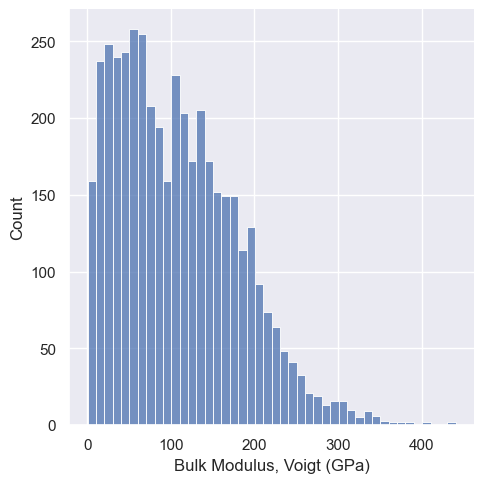

In [26]:
k = sns.displot(df, x='k_voigt', binwidth=10)
k.set(xlabel='Bulk Modulus, Voigt (GPa)')

plt.show()

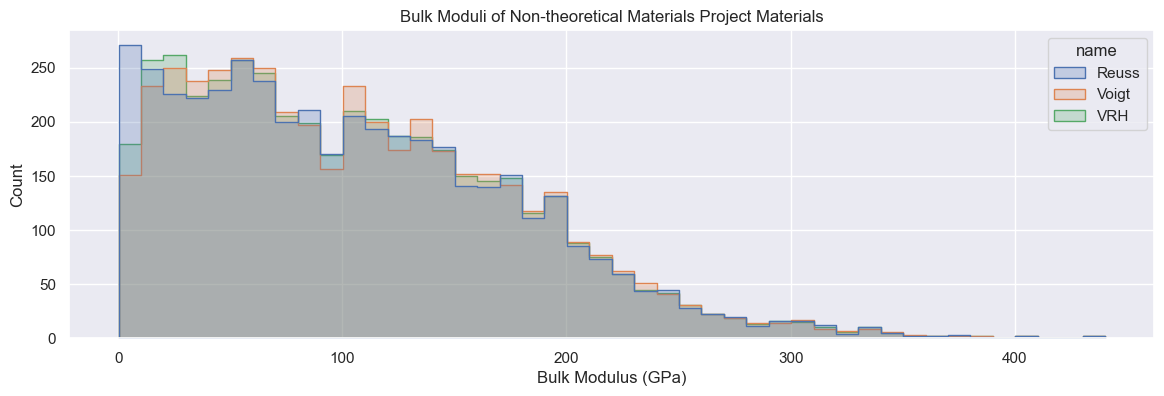

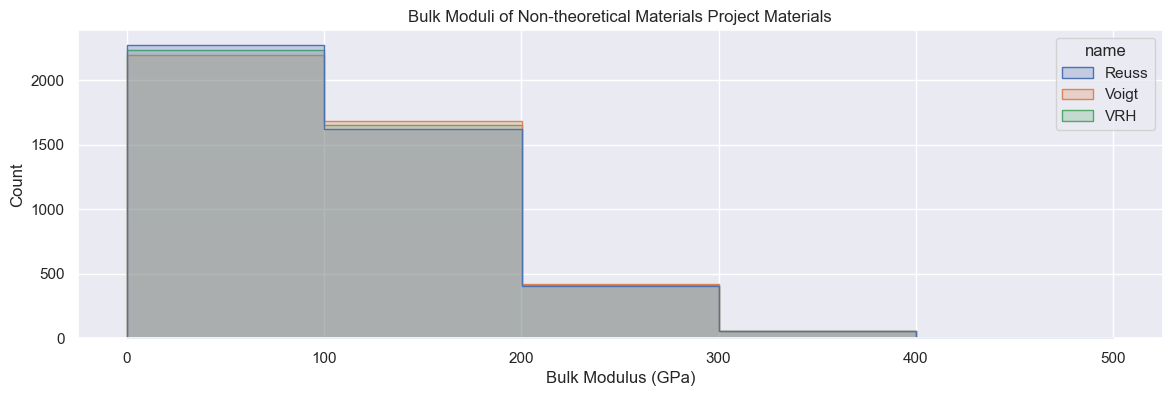

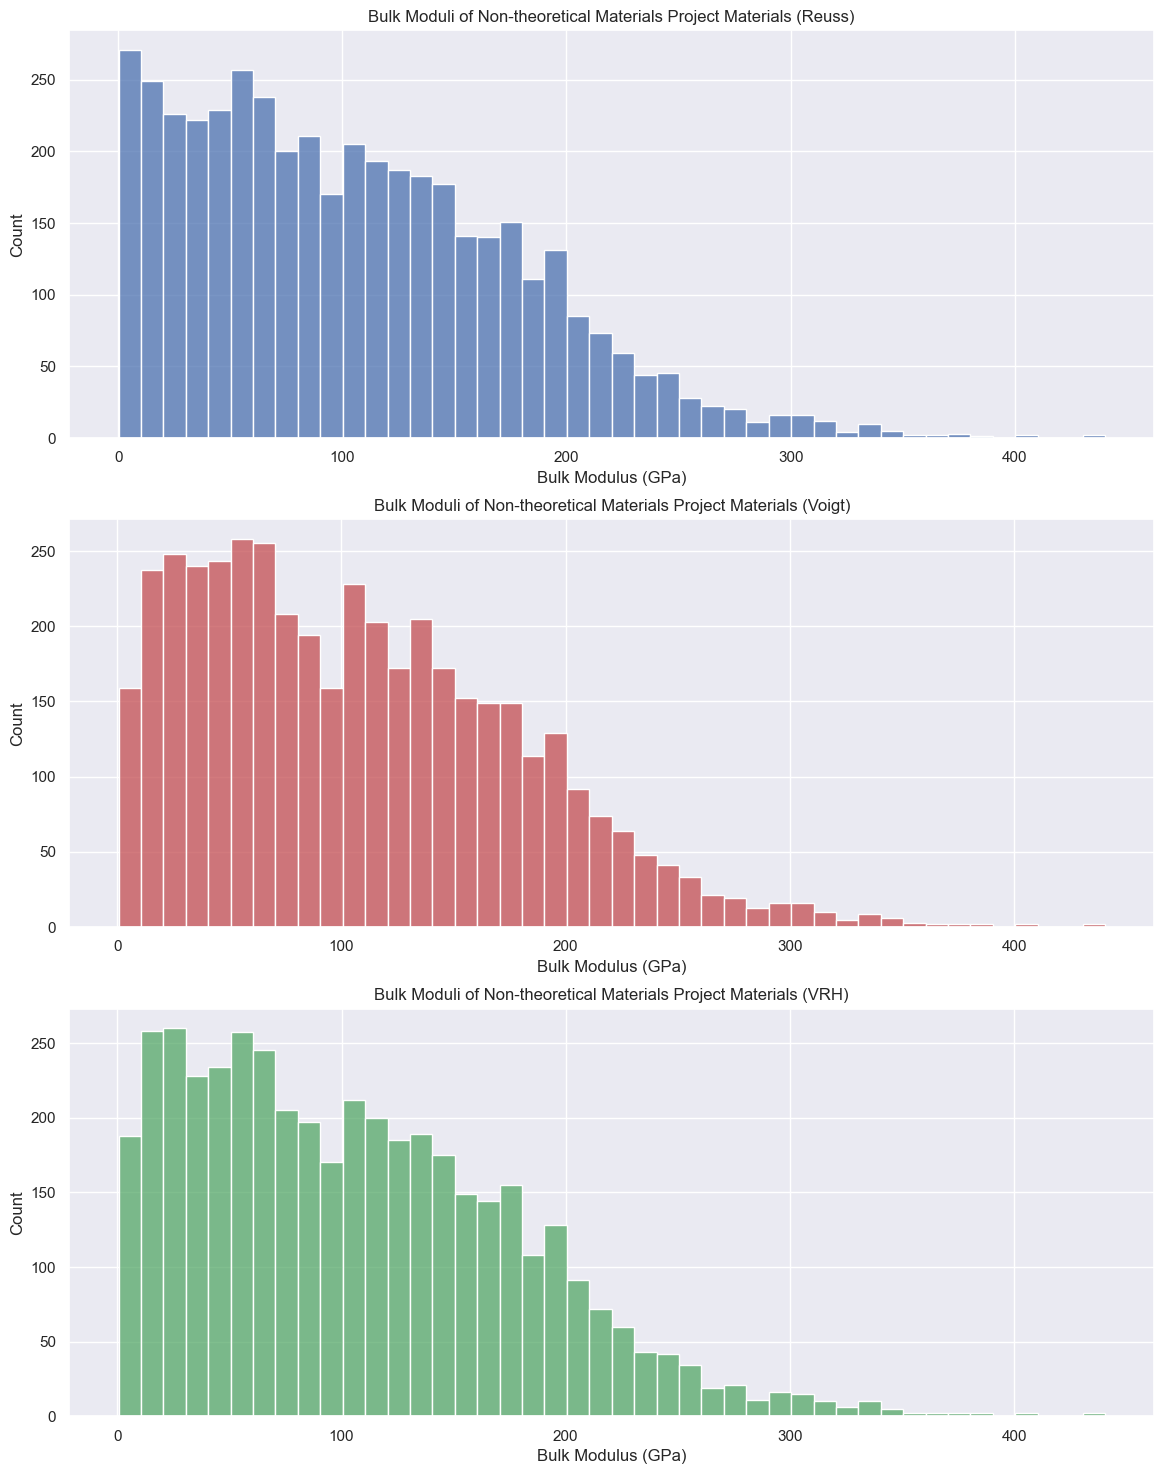

In [27]:
reuss = df[df.k_reuss < 500].k_reuss
voigt = df[df.k_voigt < 500].k_voigt
vrh = df[df.k_vrh < 500].k_vrh

bm = pd.concat(axis=0, ignore_index=True, objs=[
    pd.DataFrame.from_dict({'value': reuss, 'name': 'Reuss'}),
    pd.DataFrame.from_dict({'value': voigt, 'name': 'Voigt'}),
    pd.DataFrame.from_dict({'value': vrh, 'name': 'VRH'})
])

# binwidth 10
fig, ax = plt.subplots(figsize=(14,4))

sns.histplot(data=bm, x='value', hue='name', element='step', binwidth=10, ax=ax)

plt.title('Bulk Moduli of Non-theoretical Materials Project Materials')
plt.xlabel('Bulk Modulus (GPa)', size=12)
plt.ylabel('Count', size=12)

# binwidth 100
fig, ax = plt.subplots(figsize=(14,4))

sns.histplot(data=bm, x='value', hue='name', element='step', binwidth=100, ax=ax)

plt.title('Bulk Moduli of Non-theoretical Materials Project Materials')
plt.xlabel('Bulk Modulus (GPa)', size=12)
plt.ylabel('Count', size=12)

# exploded view
fig, axs = plt.subplots(3, 1, figsize=(14, 18))

sns.histplot(data=reuss, label='Reuss', binwidth=10, ax=axs[0], color='b').set(xlabel='Bulk Modulus (GPa)', title='Bulk Moduli of Non-theoretical Materials Project Materials (Reuss)')
sns.histplot(data=voigt, binwidth=10, ax=axs[1], color='r').set(xlabel='Bulk Modulus (GPa)', title='Bulk Moduli of Non-theoretical Materials Project Materials (Voigt)')
sns.histplot(data=vrh, binwidth=10, ax=axs[2], color='g').set(xlabel='Bulk Modulus (GPa)', title='Bulk Moduli of Non-theoretical Materials Project Materials (VRH)')

plt.show()

In [28]:
mof_data = pd.read_csv('qmof.csv', na_filter=False)
display(mof_data)

,qmof_id,name,info.formula,info.formula_reduced,info.mofid.mofid,info.mofid.mofkey,info.mofid.smiles_nodes,info.mofid.smiles_linkers,info.mofid.smiles,info.mofid.topology,...,outputs.hse06.energy_elec,outputs.hse06.net_magmom,outputs.hse06.bandgap,outputs.hse06.cbm,outputs.hse06.vbm,outputs.hse06.directgap,outputs.hse06.bandgap_spins,outputs.hse06.cbm_spins,outputs.hse06.vbm_spins,outputs.hse06.directgap_spins
0,qmof-8a95c27,ABACUF01_FSR,Ba2CuC6H14O16,Ba2CuC6H14O16,,,"['O', '[Ba]', '[Cu]']",['[O-]C=O'],O.[Ba].[Cu].[O-]C=O,,...,,,,,,,,,,
1,qmof-019ba28,ABALOF_FSR,Cu12C36H56I16N4S4,Cu3C9H14I4NS,,,,,,,...,,,,,,,,,,
2,qmof-830ed1c,ABAVIJ_FSR,Co4C48H32N8O16,CoC12H8N2O4,[Co].[O-]C(=O)c1ccncc1 MOFid-v1.rtl.cat0,Co.TWBYWOBDOCUKOW.MOFkey-v1.rtl,['[Co]'],['[O-]C(=O)c1ccncc1'],[Co].[O-]C(=O)c1ccncc1,rtl,...,,,,,,,,,,
3,qmof-5bd4a24,ABAVOP_FSR,Co4C48H32N8O16,CoC12H8N2O4,[Co].[O-]C(=O)c1ccncc1 MOFid-v1.rtl.cat0,Co.TWBYWOBDOCUKOW.MOFkey-v1.rtl,['[Co]'],['[O-]C(=O)c1ccncc1'],[Co].[O-]C(=O)c1ccncc1,rtl,...,,,,,,,,,,
4,qmof-644aab4,ABAXUZ_FSR,Zn2C50H32N6O8S4,ZnC25H16N3O4S2,,,['[Zn][Zn]'],"['[O-]C(=O)c1cccc(c1)c1nccs1', 'n1ccc(cc1)c1cc...",[O-]C(=O)c1cccc(c1)c1nccs1.[Zn][Zn].n1ccc(cc1)...,,...,-811.55385848,0.0,2.9017470000000003,2.246703,-0.655044,True,"[None, None]","[None, None]","[None, None]","[None, None]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20370,qmof-7aebbbb,tobacco_srsb_sym_3_on_2_sym_3_mc_0_L_2,Cu12C84H60N24,CuC7H5N2,N1=C[C](C=N1)C=Cc1cc(C=CC2=C[N]N=C2)cc(c1)C=CC...,Cu.IBPUNEAULYEGJU.MOFkey-v1.srs,['[Cu]'],['N1=C[C](C=N1)C=Cc1cc(C=CC2=C[N]N=C2)cc(c1)C=...,N1=C[C](C=N1)C=Cc1cc(C=CC2=C[N]N=C2)cc(c1)C=CC...,srs,...,,,,,,,,,,
20371,qmof-9a04c15,tobacco_srsb_sym_3_on_2_sym_3_mc_0_L_6,Cu12C84H48N60,CuC7H4N5,N1=C[C](C=N1)n1nnc(c1)c1cc(cc(c1)c1nnn(c1)C1=C...,Cu.JWLDCPHWRGZUAB.MOFkey-v1.srs,['[Cu]'],['N1=C[C](C=N1)n1nnc(c1)c1cc(cc(c1)c1nnn(c1)C1...,N1=C[C](C=N1)n1nnc(c1)c1cc(cc(c1)c1nnn(c1)C1=C...,srs,...,,,,,,,,,,
20372,qmof-0dce90f,tobacco_srsb_sym_3_on_2_sym_3_mc_0__,Cu12C60H36N24,CuC5H3N2,N1=C[C](C=N1)c1cc(cc(c1)C1=CN=N[CH]1)C1=C[N]N=...,Cu.PJSMFZDMZONQKK.MOFkey-v1.srs,"['[Cu]', '[Cu][Cu]']",['N1=C[C](C=N1)c1cc(cc(c1)C1=CN=N[CH]1)C1=C[N]...,N1=C[C](C=N1)c1cc(cc(c1)C1=CN=N[CH]1)C1=C[N]N=...,srs,...,,,,,,,,,,
20373,qmof-955fe88,tobacco_srsb_sym_3_on_4_sym_3_mc_0_L_2,Cu12C112H72N24,Cu3C28H18N6,N1=C[C](C=N1)C=CC1=CC2=CC(=CC3=CC(=CC(=C1)[C]2...,Cu.WCJPEIPZJUESBA.MOFkey-v1.srs,['[Cu]'],['N1=C[C](C=N1)C=CC1=CC2=CC(=CC3=CC(=CC(=C1)[C...,N1=C[C](C=N1)C=CC1=CC2=CC(=CC3=CC(=CC(=C1)[C]2...,srs,...,,,,,,,,,,


In [30]:
param = df.drop(columns=[
    'k_reuss',
    'k_voigt',
])

display(param)

,material_id,k_vrh,g_vrh,universal_anisotropy,homogeneous_poisson,crystal_system
0,mp-5784,53.187351,27.689745,0.493929,0.278188,Orthorhombic
1,mp-23004,13.405681,5.178690,6.485755,0.328882,Hexagonal
2,mp-4681,86.058148,51.428591,0.854911,0.250833,Orthorhombic
3,mp-555064,43.601175,22.561731,4.615468,0.279333,Monoclinic
4,mp-19120,64.140096,41.398371,0.356484,0.234420,Orthorhombic
...,...,...,...,...,...,...
4912,mp-13089,45.738941,19.919412,0.747586,0.309852,Orthorhombic
4913,mp-11869,122.433872,57.654809,0.179926,0.296492,Cubic
4916,mp-27545,75.017787,50.950662,0.736275,0.223098,Monoclinic
4917,mp-30536,89.304679,53.261847,0.941901,0.251249,Tetragonal


In [34]:
bm_data = param.truncate(after=50)

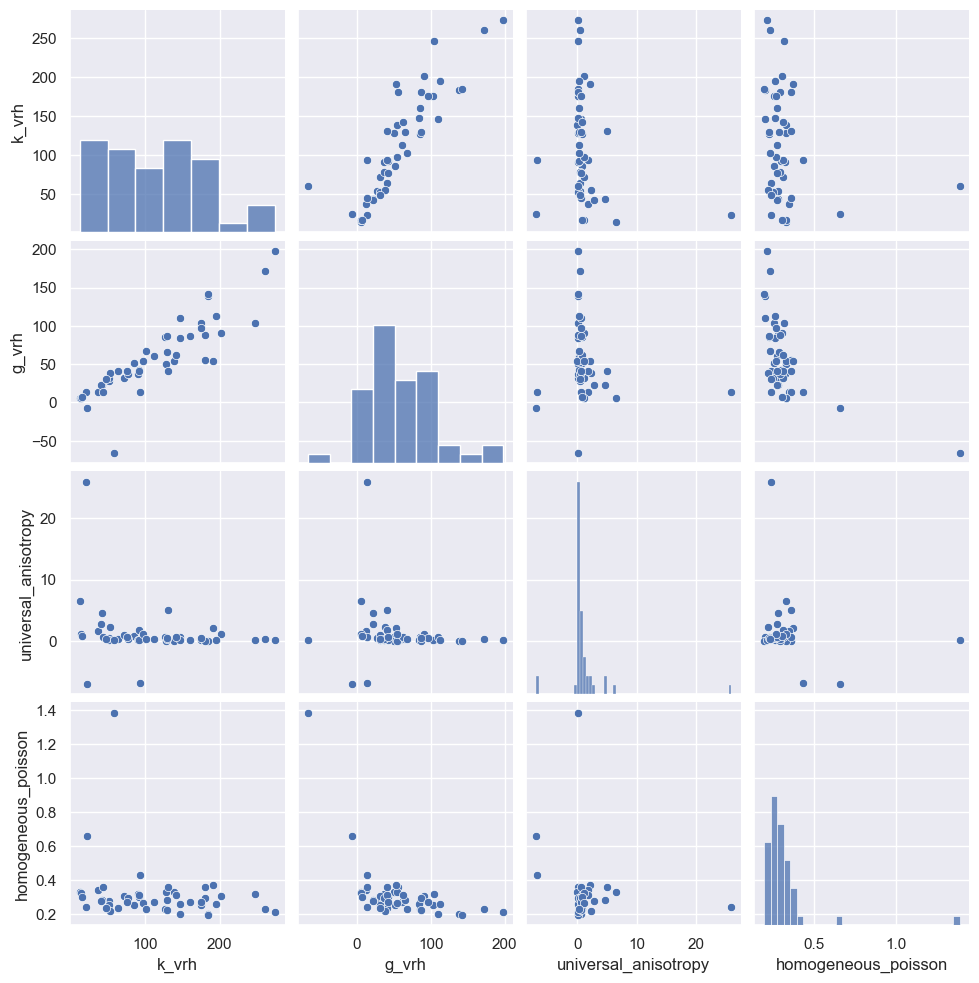

In [35]:
grid = sns.pairplot(bm_data)

In [239]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [161]:
with MPRester('oPsLWq6IqZdF9mRNMhRHH7M5gl622DXk') as mpr:
    data = mpr.summary.search(
        has_props=[HasProps.elasticity],
        fields=[
            'material_id',
            'k_vrh',
            'g_vrh',
            'energy_above_hull',
            'formation_energy_per_atom',
            'theoretical'
        ]
    )
    
bm_data = pd.DataFrame([d.dict() for d in data])

bm_data.drop(bm_data[(bm_data.theoretical == True) |
                     (bm_data.k_vrh < 0) |
                     (bm_data.k_vrh > 400) |
                     (bm_data.g_vrh < 0) |
                     (bm_data.g_vrh > 300) |
                     (bm_data.energy_above_hull > 0.5)
                    ].index, inplace=True)
bm_data.drop(bm_data[bm_data.energy_above_hull > 0.5].index, inplace=True)
bm_data.drop(columns=['fields_not_requested', 'theoretical'], inplace=True)
bm_data.dropna()
display(bm_data)

Retrieving SummaryDoc documents:   0%|          | 0/7108 [00:00<?, ?it/s]

,material_id,formation_energy_per_atom,energy_above_hull,k_vrh,g_vrh
0,mp-5784,-2.140016,0.000000,53.187351,27.689745
1,mp-23004,-2.322267,0.000000,13.405681,5.178690
2,mp-4681,-2.833432,0.012851,86.058148,51.428591
4,mp-555064,-1.567491,0.071593,43.601175,22.561731
6,mp-19120,-2.191377,0.000000,64.140096,41.398371
...,...,...,...,...,...
7101,mp-18525,-2.652150,0.000000,154.912197,77.948498
7102,mp-567713,-0.853004,0.002024,12.280688,8.384251
7104,mp-561258,-1.062192,0.000939,69.641973,33.759182
7105,mp-556927,-2.817694,0.000891,35.997507,12.737678


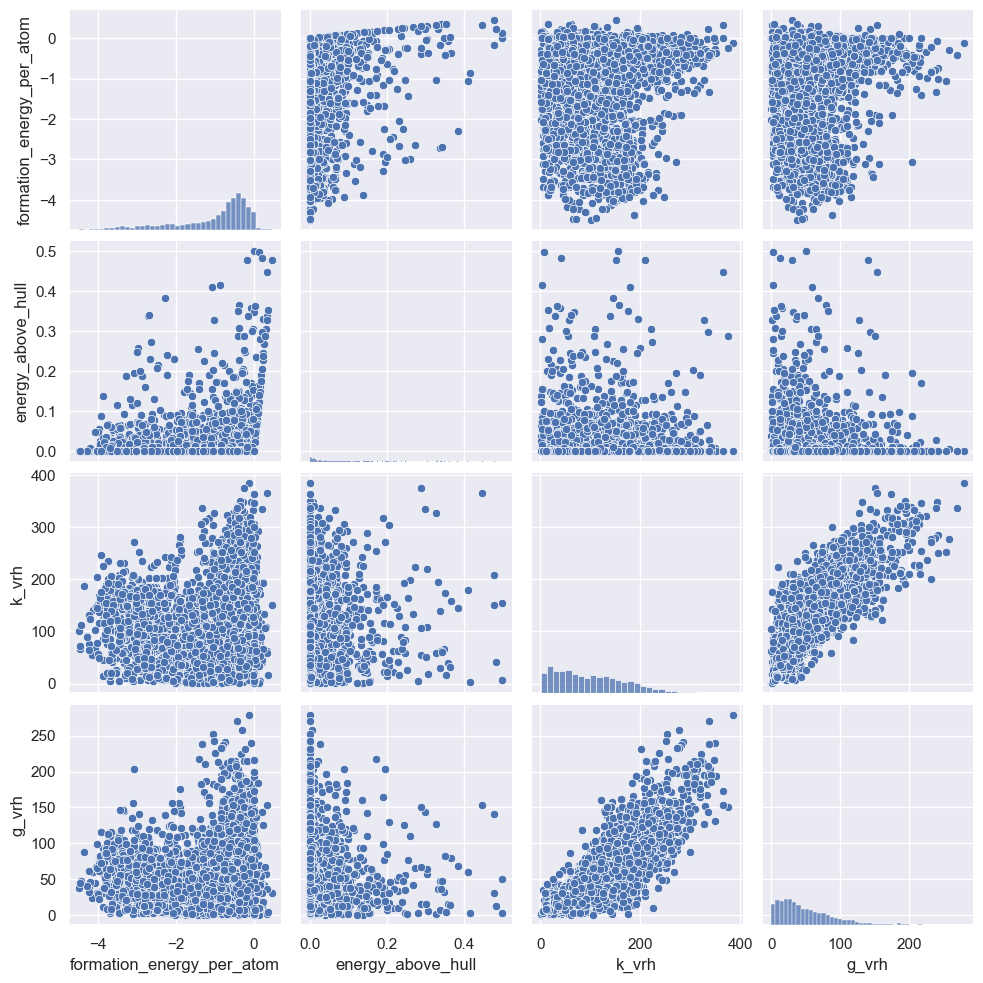

In [162]:
sns.pairplot(bm_data)
plt.show()

In [222]:
X = bm_data[['formation_energy_per_atom', 'energy_above_hull', 'g_vrh']]
y = bm_data['k_vrh']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  0.747817583085201
The rmse is:  35.92187616381844


In [249]:
X = bm_data[['formation_energy_per_atom', 'energy_above_hull', 'g_vrh']]
y = bm_data['k_vrh']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3)

model = BayesianRidge()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  0.7539950585773887
The rmse is:  35.65513571747601


In [250]:
coef = model.coef_
print(model.coef_)
intercept = model.intercept_

def predict_bulk_modulus(m_id):
    with MPRester('oPsLWq6IqZdF9mRNMhRHH7M5gl622DXk') as mpr:
        ma = mpr.summary.search(material_ids=[m_id], fields=[
            'formation_energy_per_atom',
            'energy_above_hull',
            'g_vrh'])
        
    return (ma[0].formation_energy_per_atom * coef[0]) + (ma[0].energy_above_hull * coef[1]) + (ma[0].g_vrh * coef[2]) + intercept

[  4.52243668 106.20772869   1.50882392]


In [255]:
print(predict_bulk_modulus('mp-1082'))

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

354.787957717186
